# Xilin Huang

# Table of Contents
- <b>[Section 1 Load Data](#1)</b>
- <b>[Section 2 Data Preparation](#2)</b>
  - [Null Values](#21)
  - [Create dummy variables for categorical variables](#22)
  - [Convert datetime variable to numeric](#23)
  - [Predictors and Target](#24)
  - [Train and Test Sets](#25)
- <b>[Section 3 EDA](#3)</b>
  - [Plot the distribution of X and the distribution of Y by X](#31)
  - [Business Insights](#32)
- <b>[Section 4 WOE transformation](#4)</b>
- <b>[Section 5 Decision Tree and Logistic Regression](#5)</b>
  - [After feature transformation ](#51)
  - [Before feature transformation ](#52)<p>
- <b>[Section 6 Random Forest Model](#6)</b>
  - [Base RF model](#61)
    - [Model with small sample](#611)
    - [Model with entire dataset](#612)
  - [Use Grid-search to find the optimal hyper-parameters ](#62)
  - [Under-sampling before Training a Random Forest Model](#63)
  - [Over-sampling before Training a Random Forest Model](#64)
  - [Scikit-Learn Random Forest Model ](#65)
    - [Summary plot](#651)
    - [Dependence plot](#652)
    - [Individual SHAP Value Plot for first 4 observations](#653)
- <b>[Section 7 GBM](#7)</b>
  - [Base GBM](#71)
    - [Model with small sample](#711)
    - [Model with entire dataset](#712)
  - [Tune hyper-parameters in GBM model](#72)
    - [Model with small sample](#721)
    - [Model with entire dataset](#722)
  - [Use Grid-search to find the optimal hyper-parameters ](#73)
- <b>[Section 8 Deep Learning Model](#8)</b>
  - [Base Deep Learning Model](#81)
    - [Model with small sample](#811)
    - [Model with entire dataset](#812)
  - [Use Grid-search to find the optimal hyper-parameters ](#82)<p>
- <b>[Section 9 GLM](#9)</b>
  - [Base GLM](#91)
    - [Model with small sample](#911)
    - [Model with entire dataset](#912)
  - [GLM model with regularization](#92)
    - [Model with small sample](#921)
    - [Model with entire dataset](#922)
  - [Use Grid-search to find the optimal hyper-parameters ](#93)
    - [Model with entire dataset](#931)
- <b>[Section 10 Automatic Machine Learning (AutoML)](#10)</b>
  - [Model with entire dataset](#101)<p>

# Section 1 Load data <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/celine/Desktop/columbia/23fall/5420 anomaly detection'
data = pd.read_csv(path + '/XYZloan_default_selected_vars.csv')
data.head()

Unnamed: 0.1  Unnamed: 0  id  loan_default  AP001  AP002  AP003  AP004  \
0             0           1   1             1     31      2      1     12   
1             1           2   2             0     27      1      1     12   
2             2           3   3             0     33      1      4     12   
3             3           4   4             0     34      2      4     12   
4             4           5   5             0     47      2      1     12   

            AP005    AP006  ...  CD162  CD164  CD166  CD167   CD169   CD170  \
0  2017/7/6 10:21      ios  ...   13.0   13.0    0.0    0.0  1449.0  1449.0   
1  2017/4/6 12:51       h5  ...  -99.0  -99.0  -99.0  -99.0   -99.0   -99.0   
2  2017/7/1 14:11       h5  ...    3.0    2.0   33.0    0.0    33.0     0.0   
3  2017/7/7 10:10  android  ...    0.0    0.0    0.0    0.0     0.0     0.0   
4  2017/7/6 14:37       h5  ...  -99.0  -99.0  -99.0  -99.0   -99.0   -99.0   

    CD172   CD173  MB005    MB007  
0  2249.0  2249.0    7.0  IPHONE7  
1   -99.0   -99.0    NaN      WEB  
2   143.0   110.0    8.0      WEB  
3     0.0     0.0   10.0     OPPO  
4   -99.0   -99.0    NaN      WEB  

[5 rows x 89 columns]

In [3]:
data.shape

(80000, 89)

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [5]:
data.describe()


Unnamed: 0.1    Unnamed: 0            id  loan_default         AP001  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean   39999.500000  40000.500000  40000.500000      0.193600     31.706913   
std    23094.155105  23094.155105  23094.155105      0.395121      7.075070   
min        0.000000      1.000000      1.000000      0.000000     20.000000   
25%    19999.750000  20000.750000  20000.750000      0.000000     27.000000   
50%    39999.500000  40000.500000  40000.500000      0.000000     30.000000   
75%    59999.250000  60000.250000  60000.250000      0.000000     35.000000   
max    79999.000000  80000.000000  80000.000000      1.000000     56.000000   

              AP002         AP003         AP004        AP007         AP008  \
count  80000.000000  80000.000000  80000.000000  80000.00000  80000.000000   
mean       1.321813      2.014925     11.235413      3.30130      3.117200   
std        0.467174      1.196806      2.212313      1.33655      1.306335   
min        1.000000      1.000000      3.000000      1.00000      1.000000   
25%        1.000000      1.000000     12.000000      2.00000      2.000000   
50%        1.000000      1.000000     12.000000      3.00000      3.000000   
75%        2.000000      3.000000     12.000000      5.00000      4.000000   
max        2.000000      6.000000     12.000000      5.00000      5.000000   

       ...         CD160         CD162         CD164         CD166  \
count  ...  79619.000000  79619.000000  79619.000000  79619.000000   
mean   ...      6.911956     14.271694     11.773358    909.089313   
std    ...     28.007499     38.235012     33.270641   1379.553332   
min    ...    -99.000000    -99.000000    -99.000000    -99.000000   
25%    ...      2.000000      5.000000      4.000000     84.000000   
50%    ...      7.000000     12.000000     10.000000    475.000000   
75%    ...     14.000000     23.000000     20.000000   1209.000000   
max    ...   1061.000000   2792.000000   1579.000000  48585.000000   

              CD167         CD169        CD170          CD172         CD173  \
count  79619.000000  79619.000000  79619.00000   79619.000000  79619.000000   
mean     810.786219   1732.693314   1539.33443    2513.226491   2229.606137   
std     1245.044602   2441.503517   2172.71384    3404.975112   3005.615048   
min      -99.000000    -99.000000    -99.00000     -99.000000    -99.000000   
25%       34.000000    309.000000    226.00000     539.000000    414.000000   
50%      397.000000   1023.000000    870.00000    1553.000000   1324.000000   
75%     1080.000000   2287.000000   2030.00000    3296.000000   2936.000000   
max    29664.000000  88364.000000  54651.00000  125352.000000  87312.000000   

              MB005  
count  77207.000000  
mean       5.976272  
std        3.641814  
min        0.000000  
25%        3.000000  
50%        5.000000  
75%        8.000000  
max       47.000000  

[8 rows x 86 columns]

# Sextion 2 Data Preparation <a class="anchor" id="2"></a>

## Null Values <a class="anchor" id="21"></a>

Unnamed: 0.1       0
Unnamed: 0         0
id                 0
loan_default       0
AP001              0
                ... 
CD170            381
CD172            381
CD173            381
MB005           2793
MB007              0
Length: 89, dtype: int64


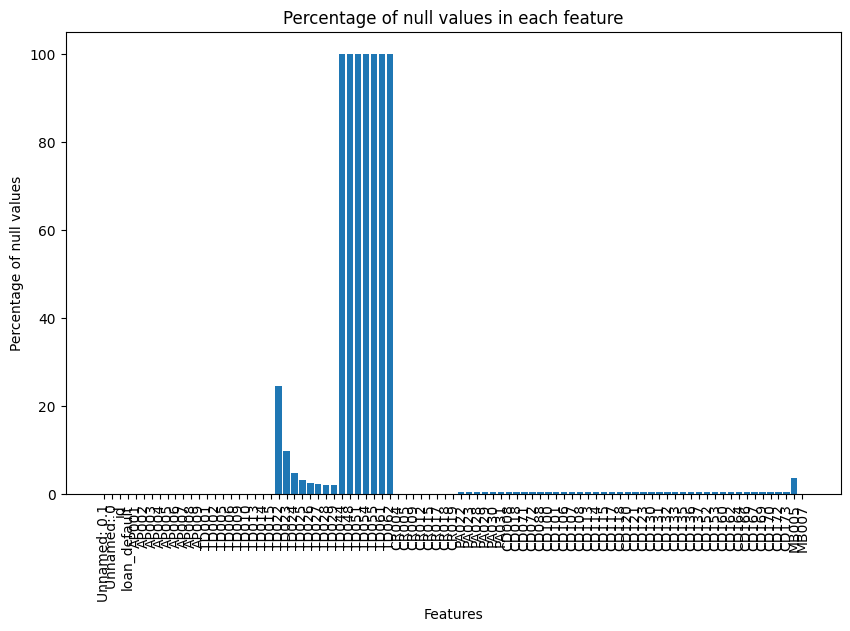

In [6]:
# check for null values
print(data.isnull().sum())

# Calculate the percentage of null values in each feature
null_percent = data.isnull().sum() / len(data) * 100

# Plot a bar chart of the percentage of null values in each feature
plt.figure(figsize=(10, 6))
plt.bar(null_percent.index, null_percent.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of null values')
plt.title('Percentage of null values in each feature')
plt.show()


In [7]:
# from the plot, we should delect feature: 'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062'
# since they did not contain any values
data = data.drop(columns=['TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062'])
print(data.shape)

(80000, 82)


In [8]:
# for other features with null values, we can fill null values with a random value from a normal distribution of each feature
def rv(data, feature):
    mean = data[feature].mean() # The mean of the non-null values of feature
    std = data[feature].std() # The standard deviation of the non-null values of feature
    size = data[feature].isnull().sum() # The number of null values in feature
    random_values = np.random.normal(mean, std, size) # Generate random values from normal distribution
    data[feature] = data[feature].fillna(pd.Series(random_values, index=data[feature].index[data[feature].isnull()])) # Fill null values with random values using index

null_columns = data.loc[:,(data.isnull().any()==True)].columns
print(null_columns)

for column in null_columns:
    rv(data, column)

print(data.isnull().sum())


Index(['TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173', 'MB005'],
      dtype='object')
Unnamed: 0.1    0
Unnamed: 0      0
id              0
loan_default    0
AP001           0
               ..
CD170           0
CD172           0
CD173           0
MB005           0
MB007           0
Length: 82, dtype: int64


## Create dummy variables for categorical variables <a class="anchor" id="22"></a>

In [9]:
# find categorical columns
data.select_dtypes('object').head()

AP005    AP006    MB007
0  2017/7/6 10:21      ios  IPHONE7
1  2017/4/6 12:51       h5      WEB
2  2017/7/1 14:11       h5      WEB
3  2017/7/7 10:10  android     OPPO
4  2017/7/6 14:37       h5      WEB

In [10]:
print(data['AP006'].value_counts())
print(data['MB007'].value_counts())

AP006
h5         44246
ios        17159
android    17140
api         1455
Name: count, dtype: int64
MB007
WEB           43850
IPHONE7        6335
IPHONE8        5186
OPPO           4313
IPHONE9        4237
              ...  
MLLED             1
HONGLAJIAO        1
VEGA              1
LINGWIN           1
HASEE             1
Name: count, Length: 112, dtype: int64


In [11]:
# there are classes with small count in MBPP7 column
# I decided to group the classes with a count less than 1% of transactions and refer to an 'other' category
other_variables = data['MB007'].value_counts()[data['MB007'].value_counts() < (0.01*data.shape[0])].index.tolist()
data['MB007'] = data['MB007'].replace(other_variables, 'Other')
data['MB007'].value_counts()

MB007
WEB        43850
IPHONE7     6335
IPHONE8     5186
OPPO        4313
IPHONE9     4237
VIVO        3673
Other       2706
HUAWEI      2458
Noinfo      2055
SAMSUNG     1646
XIAOMI      1470
HONOR       1066
IPHONE6     1005
Name: count, dtype: int64

In [12]:
# create dummy variables using get_dummies()
AP006_dummy = pd.get_dummies(data["AP006"], prefix="AP006", drop_first=True)
data_dummy = pd.concat([data, AP006_dummy], axis=1)

MB007_dummy = pd.get_dummies(data["MB007"], prefix="MB007", drop_first=True)
data_dummy = pd.concat([data_dummy, MB007_dummy], axis=1)

# drop the original columns
data_dummy = data_dummy.drop(["AP006", 'MB007'], axis=1)

In [13]:
data_dummy.head()

Unnamed: 0.1  Unnamed: 0  id  loan_default  AP001  AP002  AP003  AP004  \
0             0           1   1             1     31      2      1     12   
1             1           2   2             0     27      1      1     12   
2             2           3   3             0     33      1      4     12   
3             3           4   4             0     34      2      4     12   
4             4           5   5             0     47      2      1     12   

            AP005  AP007  ...  MB007_IPHONE7  MB007_IPHONE8  MB007_IPHONE9  \
0  2017/7/6 10:21      3  ...           True          False          False   
1  2017/4/6 12:51      5  ...          False          False          False   
2  2017/7/1 14:11      4  ...          False          False          False   
3  2017/7/7 10:10      5  ...          False          False          False   
4  2017/7/6 14:37      4  ...          False          False          False   

   MB007_Noinfo  MB007_OPPO  MB007_Other  MB007_SAMSUNG  MB007_VIVO  \
0         False       False        False          False       False   
1         False       False        False          False       False   
2         False       False        False          False       False   
3         False        True        False          False       False   
4         False       False        False          False       False   

   MB007_WEB  MB007_XIAOMI  
0      False         False  
1       True         False  
2       True         False  
3      False         False  
4       True         False  

[5 rows x 95 columns]

In [14]:
data_dummy.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002',
       'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022',
       'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'AP006_api', 'AP006_h5', 'AP006_ios', 'MB007_HUAWEI',
       'MB007_IPHONE6', 'MB007_IPHONE7', 'MB007_IPHONE8', 'MB007_IPHONE9',
       'MB007_Noinfo', 'MB007_OPPO', 'MB007_Other', 'MB007

## Convert datetime variable to numeric <a class="anchor" id="23"></a>


In [15]:
# convert AP005 to numeric
data_dummy['AP005'] = pd.to_datetime(data_dummy['AP005'])
data_dummy['AP005'] = pd.to_numeric(data_dummy['AP005'])/(10**9)
data_dummy[['AP005']]

AP005
0      1.499336e+09
1      1.491483e+09
2      1.498918e+09
3      1.499422e+09
4      1.499352e+09
...             ...
79995  1.494165e+09
79996  1.496419e+09
79997  1.499590e+09
79998  1.494325e+09
79999  1.493318e+09

[80000 rows x 1 columns]

## Predictors and Target <a class="anchor" id="24"></a>

In [16]:
# specify predictor columns and target column
var = pd.DataFrame(data_dummy.dtypes).reset_index()
var.columns = ['varname','dtype']
var['source'] = var['varname'].str[:2]
print(var['source'].value_counts())


# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])

predictors = MB_list + AP_list + TD_list + CR_list + PA_list + CD_list
target='loan_default'

source
CD    36
TD    17
MB    13
AP    11
CR     8
PA     6
Un     2
id     1
lo     1
Name: count, dtype: int64


In [17]:
# drop column: Unnamed: 0.1, Unnamed: 0, id
data_dummy = data_dummy.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

## Train and Test Sets <a class="anchor" id="25"></a>

In [18]:
# Split data into train and test sets
train, test = train_test_split(data_dummy, test_size=0.40, random_state=1234)
print(train.shape, test.shape)
print(train.columns)


(48000, 93) (32000, 93)
Index(['id', 'loan_default', 'AP001', 'AP002', 'AP003', 'AP004', 'AP005',
       'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009',
       'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'TD025',
       'TD026', 'TD027', 'TD028', 'TD029', 'CR004', 'CR005', 'CR009', 'CR012',
       'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'PA028', 'PA029',
       'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100',
       'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117',
       'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133',
       'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164',
       'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005',
       'AP006_api', 'AP006_h5', 'AP006_ios', 'MB007_HUAWEI', 'MB007_IPHONE6',
       'MB007_IPHONE7', 'MB007_IPHONE8', 'MB007_IPHONE9', 'MB007_Noinfo',
       'MB007_OPPO', 'MB007_Other', 'MB007_SAMSU

# Section 3 EDA <a class="anchor" id="3"></a>

## Plot the distribution of X and the distribution of Y by X <a class="anchor" id="31"></a>

In [19]:
# To do an exploratory data analysis, 
# creating categorical variables using qcut(for continuous variable, it also needs to split into a categorial variable)
# and then plotting the % of Y by X
# it is more efficient to build a function for every variable

def binning(df, var):
    df[var + '_bin'] = pd.qcut(df[var],10,duplicates='drop').values.add_categories("NoData")
    df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
    df[var + '_bin'].value_counts(dropna=False)

def plot_X_and_Y(df, var):

    z= df.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

  
    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    plt.plot(ind, y_mean, width, color='b')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()


In [20]:
# Do eda on selected features
features = [
        'AP001', 'AP003', 'AP008', 
        'CR009', 'CR015', 'CR019', 
        'PA022', 'PA023', 'PA029', 
        'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014'
    ]
train2 = train.copy()
train2[features]=train2[features].astype('float32')

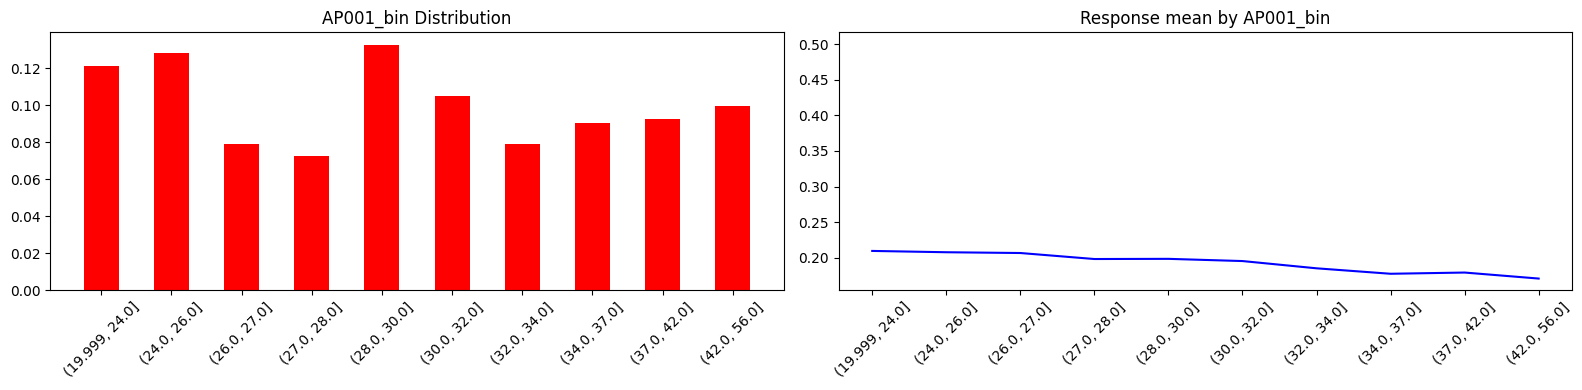

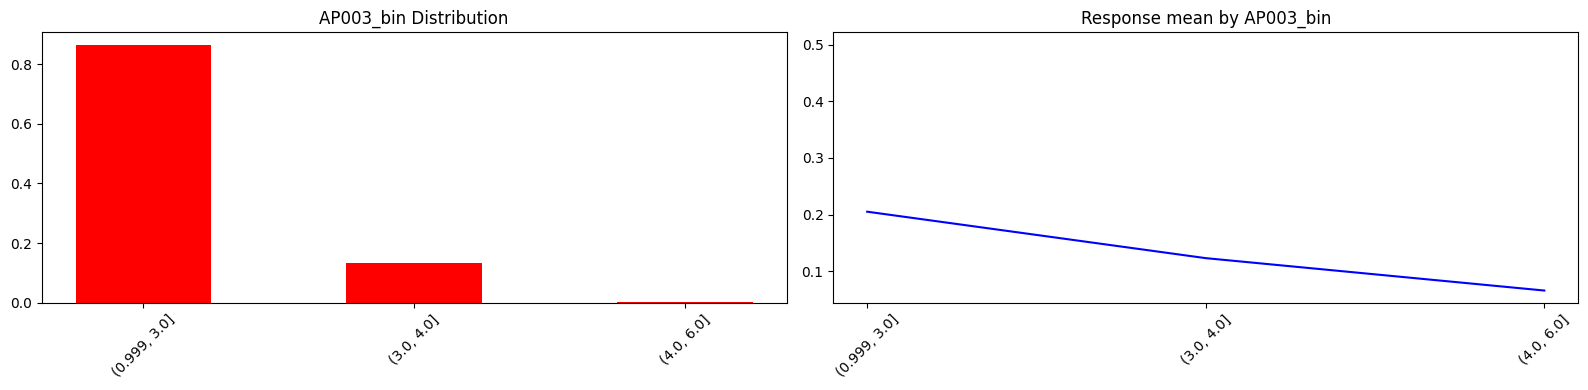

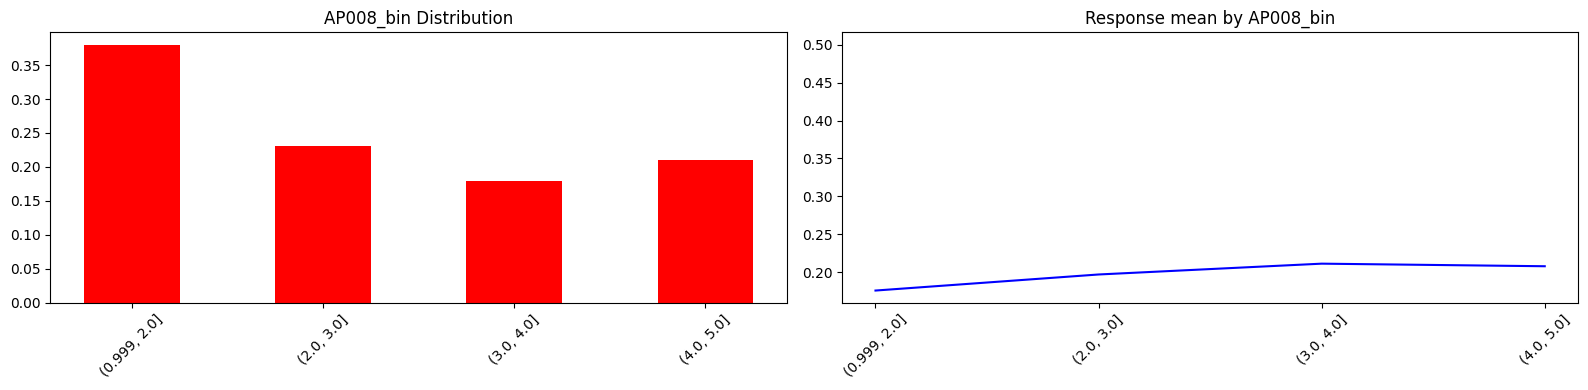

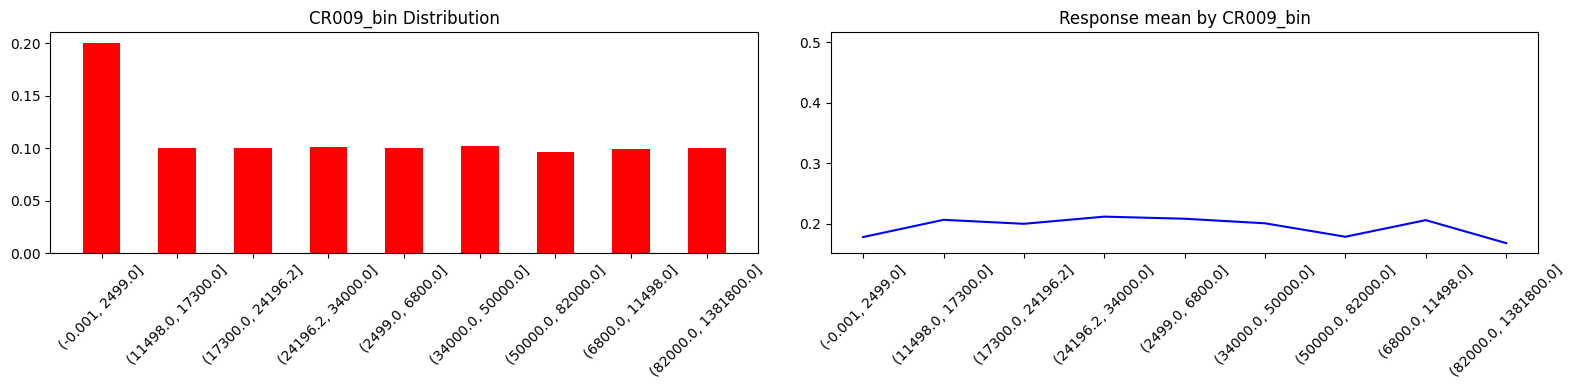

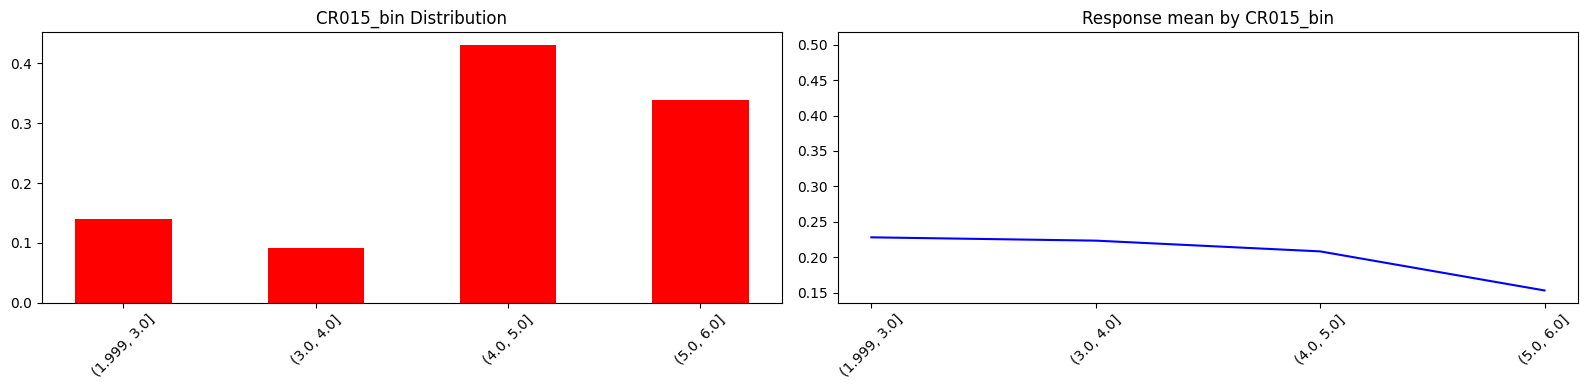

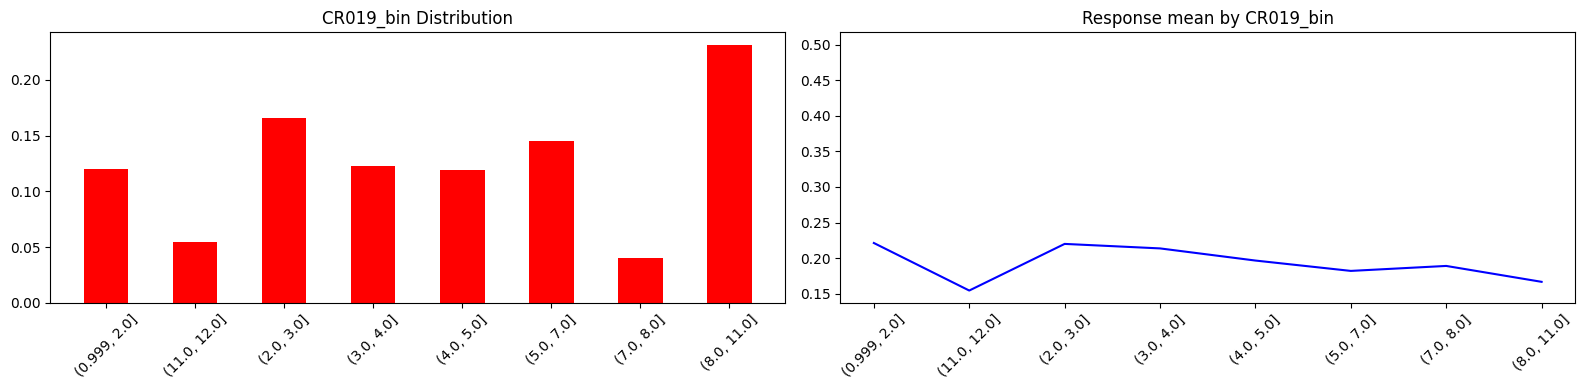

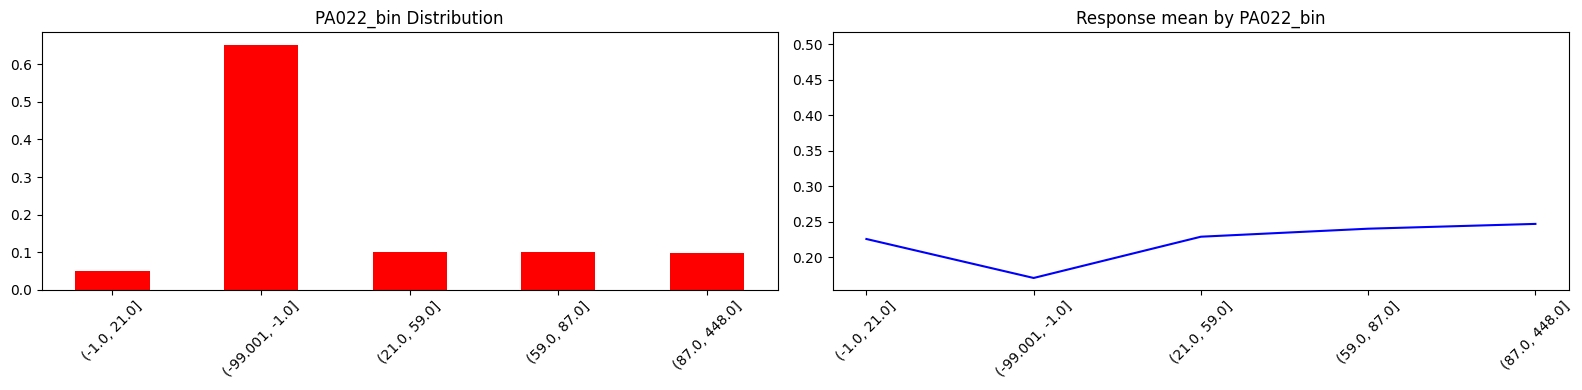

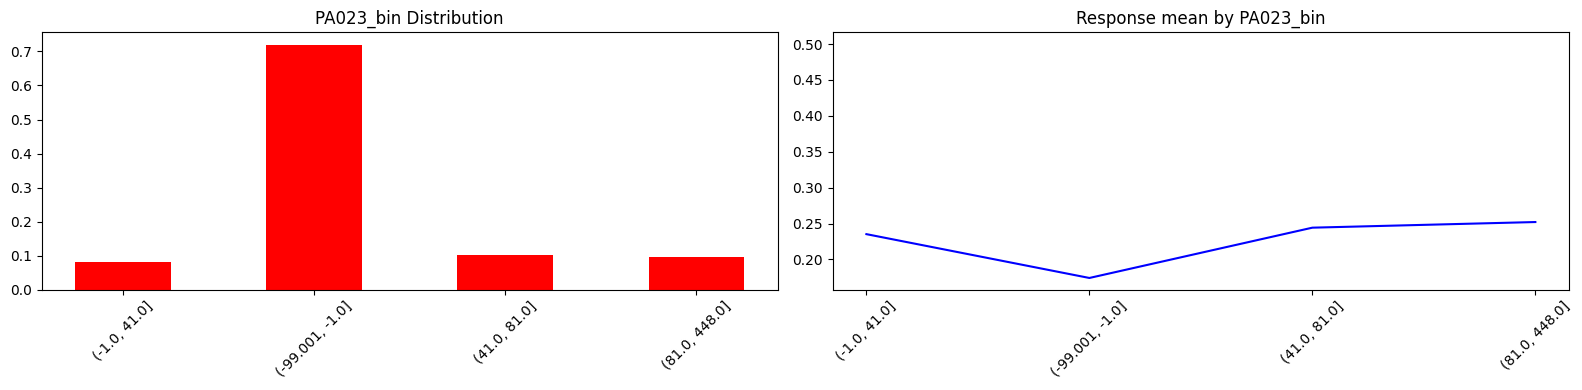

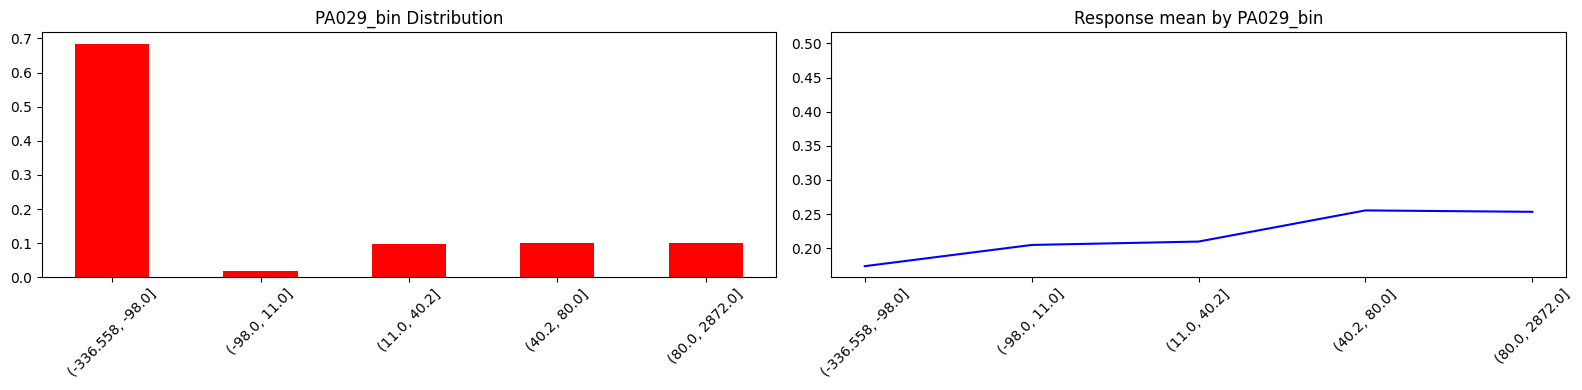

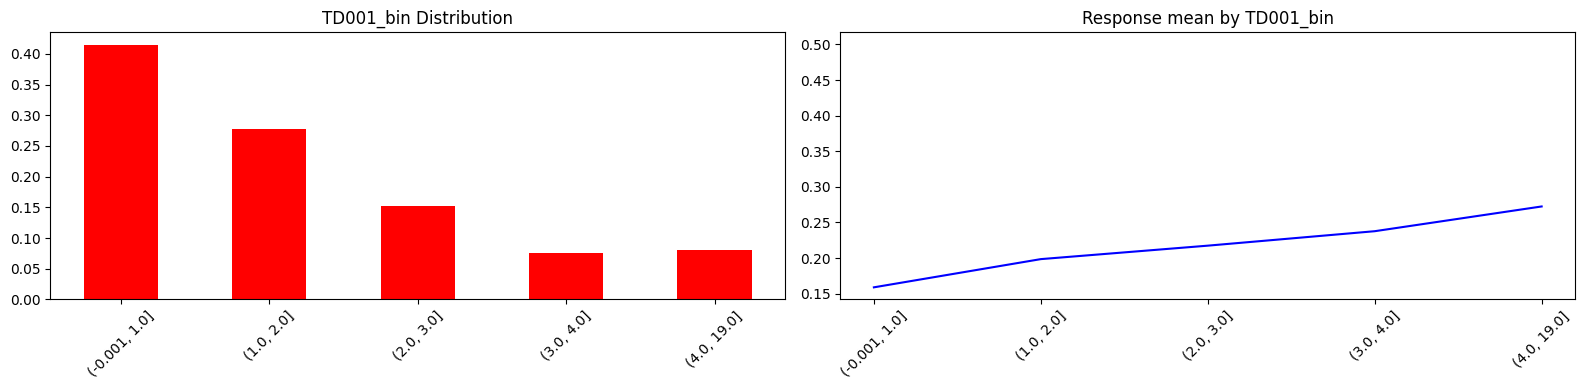

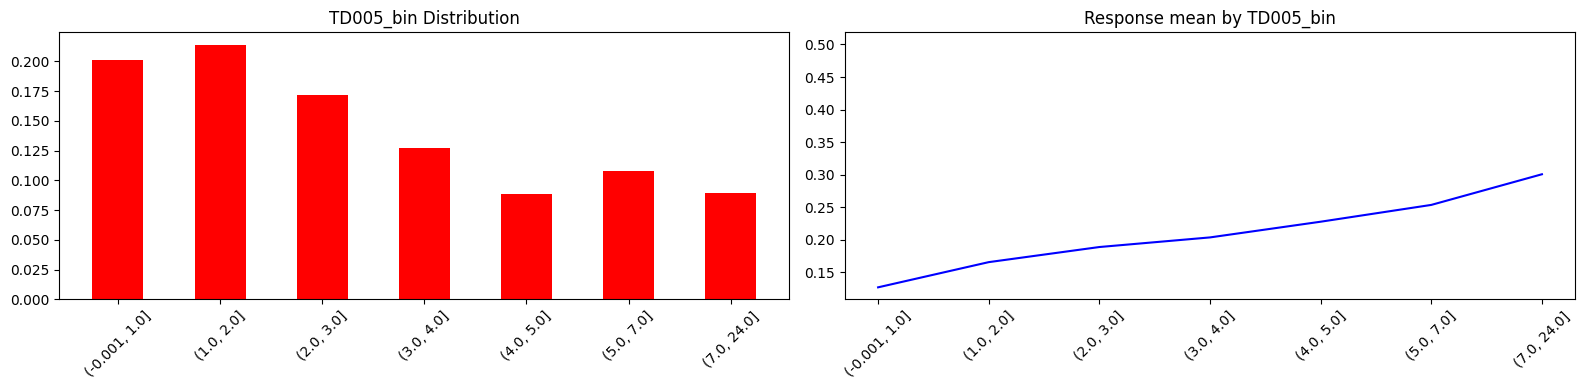

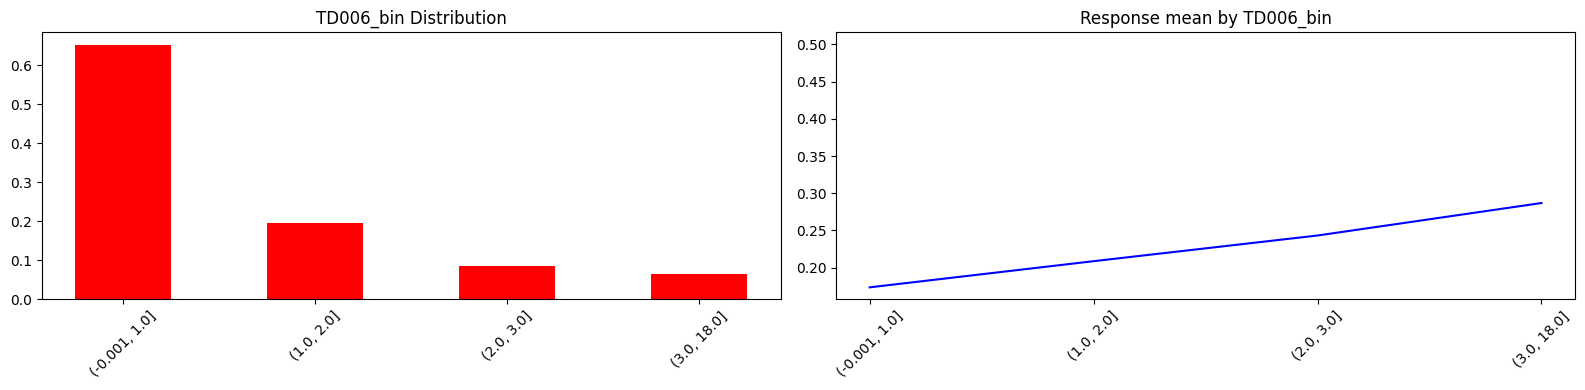

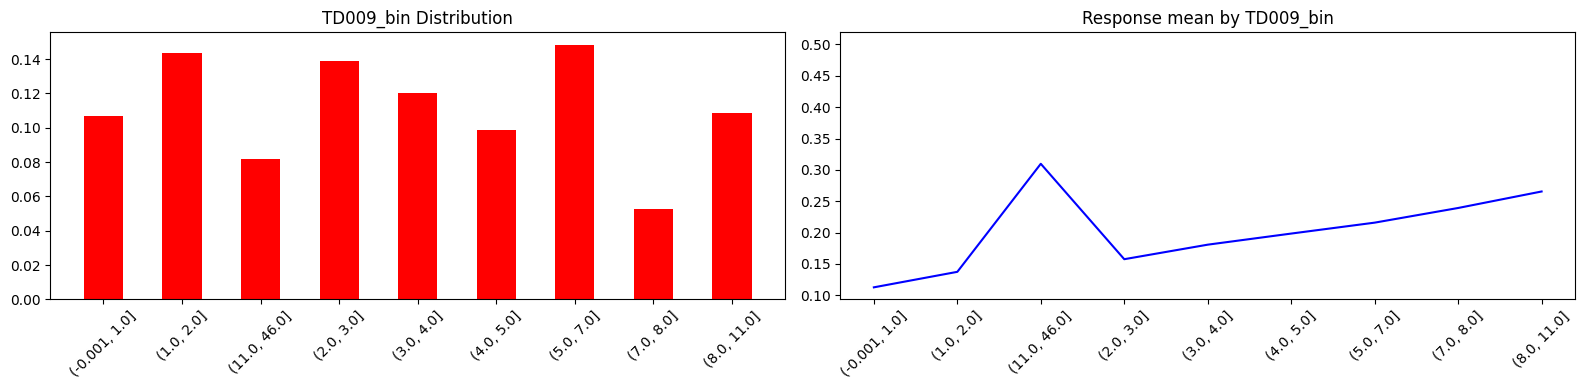

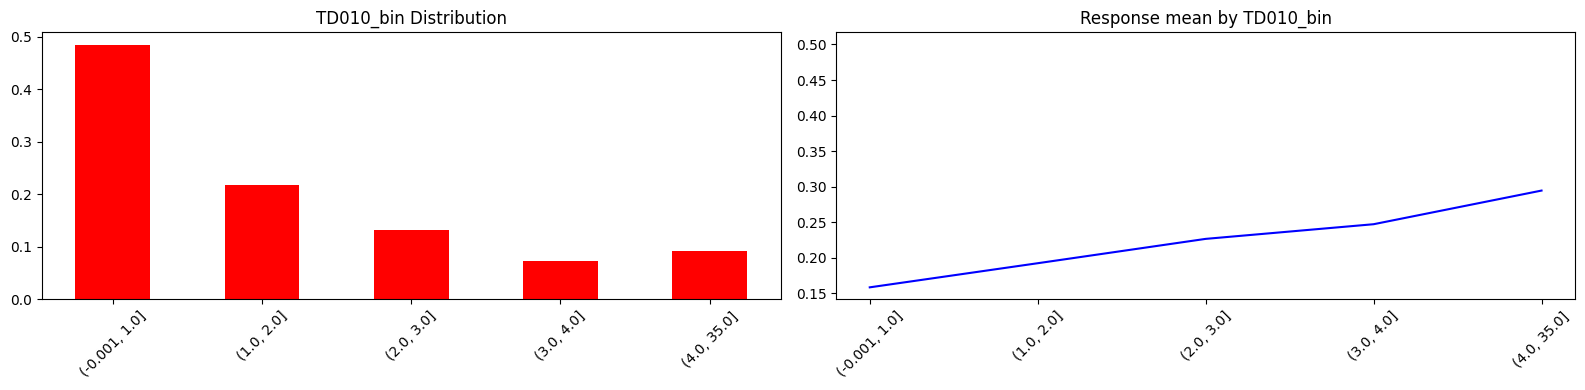

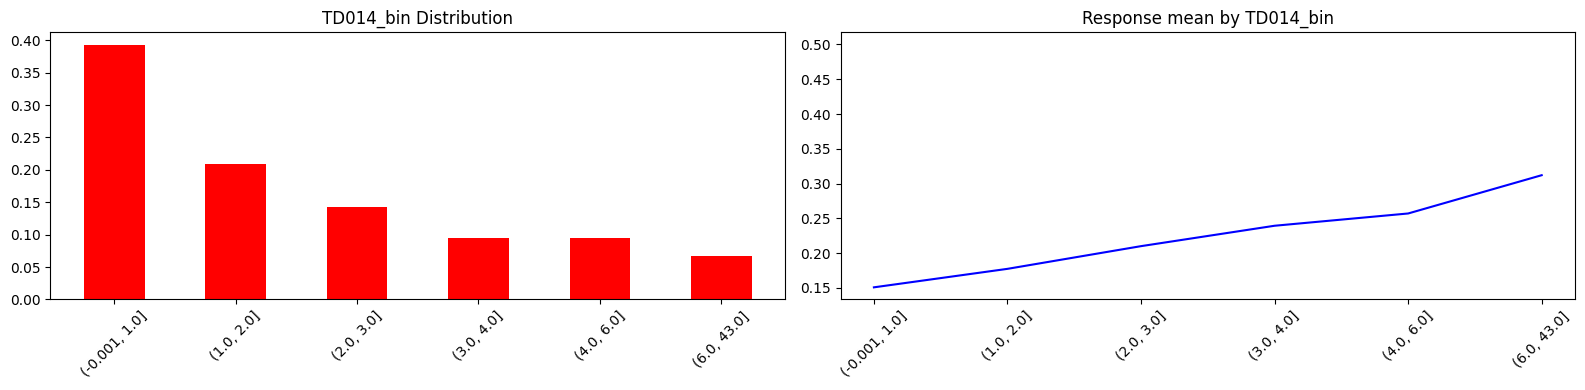

In [21]:
for i in features:
    binning(train2, i)

features_bin = [f + '_bin' for f in features]

for i in features_bin:
    plot_X_and_Y(train2, i)

### Business Insights <a class="anchor" id="22"></a>

#### First group of variables: AP001(YR_AGE), AP003(CODE_EDUCATION), AP008(LEVEL_IP_CITY)  

AP001(YR_AGE):
This variable represents the age of the applicant in years. It is a continuous variable that ranges from 20 to 56. From the plot, the mean of loan_default slightly decreases as applicant's age increases. It may because younger applicants may have lower income, less savings, and shorter credit history than older applicants, which may increase their default risk.


AP003(CODE_EDUCATION):
This variable represents the education level of the applicant. It is a categorical variable that has 5 catagories. From the plot, individuals with higher education tend to have a lower likelihood of loan default. Generally, higher education level may imply higher income, better financial management skills, and more stable employment than lower education level, which may reduce the default risk. 

AP008(LEVEL_IP_CITY):
This variable indicates the level of the city where the applicant’s IP address is located. It is a categorical variable that has 5 catagories. A possible business insight is that higher-level cities may have more economic opportunities and higher living costs, which could affect the demand and affordability of loans. From the plot, when the level of ip city is high , the likelihood of loan default is high.

#### Second group of variables: CR009(AMT_LOAN_TOTAL), CR015(MONTH_CREDIT_CARD_MOB_MAX), CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)  

CR009(AMT_LOAN_TOTAL):
This variable represents the total amount of loan that the applicant has applied for. It is a continuous variable. Higher loan amount may indicate higher financial needs and lower repayment capacity than lower loan amount, which may increase the default risk. However, higher loan amount may also imply higher creditworthiness, better financial planning, and more collateral than lower loan amount, which may reduce the default risk. From the plot, the mean of loan default rate does not vary much across different values of total amount of loan. Hence, higher loan amount may not significantly increase the default risk, ot lower may not decrease the risk.

CR015(MONTH_CREDIT_CARD_MOB_MAX):
This variable represents the maximum number of months that the applicant has used a credit card. It is a discrete variable. The business insight for this variable is that it may indicate the applicant’s credit history, credit utilization, and payment behavior. From the plot, when MONTH_CREDIT_CARD_MOB_MAX is high, Y is low, meaning that higher number of months may imply longer credit history, lower credit utilization, and better payment behavior than lower number of months, which may reduce the default risk. 

CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT):
This variable represents the score of the single debit card limit of the applicant. It is a categorical variable. From the plot, Y deceases when the score is higher. Generally, higher score may imply higher debit card usage, lower spending habits, and better cash flow than lower score, which may reduce the default risk.



#### Third group of variables: PA022(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL), PA023(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL), PA029(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS) 

PA022(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL):
This variable represents the number of days between the application date and the first collection or high risk call that the applicant received. It is a discrete variable from 0 to 448 but including 2 negative number, -99 and -1. From the plot, Y reaches the lowest value at negative number of days and then Y slightly increases when the number of days (positive) increases. Longer days may indicate lower urgency and priority for repayment, which could increase the chance of default. 

PA023(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL):
This variable represents the number of days between the application date and the first collection call that the applicant received. It is a discrete variable that ranges from 0 to 448 but including 2 negative number, -99 and -1. The business insight for this variable is similar to PA022, except that it only considers collection calls and not high risk calls. Collection calls are usually made when the applicant is late on their payments by a certain period. High risk calls are usually made when the applicant is considered to be at a high risk of defaulting based on their credit score, loan amount, or other factors.

PA029(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS):
This variable represents the average length of collection or high risk inbound calls. It is a discrete variable that ranges from 0 to 2872 but including 2 negative number, -99 and -98. From the plot, Y reaches the lowest value at negative number of days and then Y increases when the average length increases. The business insight for this variable is that it may reflect the applicant’s communication skills, cooperation level, and negotiation outcomes. A possible business insight is that longer inbound calls may indicate more difficulties in reaching an agreement with the collection or high risk agents, which may increase the default risk.



#### Forth group of variables: TD001(TD_CNT_QUERY_LAST_7Day_P2P), TD005(TD_CNT_QUERY_LAST_1MON_P2P), TD006(TD_CNT_QUERY_LAST_1MON_SMALL_LOAN), TD009(TD_CNT_QUERY_LAST_3MON_P2P), TD010(TD_CNT_QUERY_LAST_3MON_SMALL_LOAN), TD014(TD_CNT_QUERY_LAST_6MON_SMALL_LOAN)

TD001(TD_CNT_QUERY_LAST_7Day_P2P):
This variable represents the number of queries that the applicant has made to P2P lending platforms in the last 7 days. It is a discrete variable that ranges from 0 to 20. From the plot, Y is high when there is a higher number of queries. And the most applicants have made zero or one query to P2P platforms, while few have made over 4 queries in the last week. A higher number of queries may indicate higher borrowing needs, higher credit demand, and higher debt burden than lower number of queries, which may increase the default risk. 

TD005(TD_CNT_QUERY_LAST_1MON_P2P)
This variable represents the number of queries that the applicant has made to P2P lending platforms in the last 1 month. It is a discrete variable. From the plot, Y is high when there is a higher number of queries. And the most applicants have made 0 to 2 query to P2P platforms. It is similar to TD001, except that it considers a longer time period.

TD006(TD_CNT_QUERY_LAST_1MON_SMALL_LOAN)
This variable represents the number of queries that the applicant has made to small loan platforms in the last 1 month. It is a discrete variable. From the plot, Y is high when there is a higher number of queries. And the most applicants have made zero or one query to P2P platforms, while few have made over 3 queries in the last month. The business insight is similar to TD005, except that it considers a different type of lending platform. 

TD009(TD_CNT_QUERY_LAST_3MON_P2P)
This variable represents the number of queries that the applicant has made to P2P lending platforms in the last 3 months. It is a discrete variable. From the plot, Y rises when the number of queries increases. And the distribution of the number of queries fluctuates, with most applicants have made zero to seven queries to P2P platforms and very few applicants have made over 11 queries to P2P platforms in the last 3 months. 

TD010(TD_CNT_QUERY_LAST_3MON_SMALL_LOAN)
This variable represents the number of queries that the applicant has made to small loan platforms in the last 3 months. It is a discrete variable. The business insight is similar to TD006, except that it considers a longer time period.

TD014(TD_CNT_QUERY_LAST_6MON_SMALL_LOAN)
This variable represents the number of queries that the applicant has made to small loan platforms in the last 6 months. It is a discrete variable. The business insight is similar to TD006 and TD010, except that it considers a longer time period.



# Section 4 WOE transformation <a class="anchor" id="4"></a>

In [22]:
def woe(df, var):
    # Fill missing values in the variable with 'NoData'
    df[var] = df[var].fillna('NoData')

    # Group by the variable and calculate count and sum of 'loan_default'
    k = df[[var, 'loan_default']].groupby(var)['loan_default'].agg(['count', 'sum']).reset_index()

    # Rename columns for clarity
    k.columns = [var, 'Count', 'Bad']

    # Calculate 'Good' as the difference between 'Count' and 'Bad'
    k['Good'] = k['Count'] - k['Bad']

    # Calculate percentage of 'Bad' and 'Good' cases
    k['Bad %'] = (k['Bad'] / k['Bad'].sum() * 100).round(2)
    k['Good %'] = (k['Good'] / k['Good'].sum() * 100).round(2)

    # Calculate WOE for the variable
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)

    # Sort the DataFrame by WOE in ascending order
    k = k.sort_values(by=var+'_WOE')

    return k


In [23]:
# Loop through the variables and apply the WOE transformation
for var in features:
    woe_df = woe(train, var)
    print(woe_df)

    AP001  Count  Bad  Good  Bad %  Good %  AP001_WOE
1      21    377   99   278   1.06    0.72      -0.39
0      20     70   17    53   0.18    0.14      -0.25
2      22    977  223   754   2.40    1.95      -0.21
5      25   2969  643  2326   6.91    6.01      -0.14
7      27   3783  782  3001   8.40    7.76      -0.08
4      24   2573  518  2055   5.57    5.31      -0.05
27     47    508  102   406   1.10    1.05      -0.05
6      26   3186  636  2550   6.83    6.59      -0.04
3      23   1832  365  1467   3.92    3.79      -0.03
8      28   3490  692  2798   7.44    7.23      -0.03
9      29   3074  610  2464   6.55    6.37      -0.03
10     30   3298  655  2643   7.04    6.83      -0.03
11     31   2799  553  2246   5.94    5.80      -0.02
14     34   1744  336  1408   3.61    3.64       0.01
12     32   2231  430  1801   4.62    4.65       0.01
26     46    574  108   466   1.16    1.20       0.03
21     41    758  143   615   1.54    1.59       0.03
31     51    227   43   184 

In [24]:
# Create an empty dataframe to store the transformed variables
df_woe_train = train[['id', 'loan_default']]

# Loop through the variables and apply the WOE transformation
for var in features:
    # Calculate the WOE values for each variable using the function defined above
    woe_df = woe(train, var)

    # Map the WOE values to the original variable and store it in a temporary dataframe
    temp_df = pd.merge(train[['id', var]], woe_df[[var, var+'_WOE']], left_on=var, right_on=var, how='left')

    # Merge the temporary dataframe with the main dataframe by id
    df_woe_train = pd.merge(df_woe_train, temp_df[['id', var+'_WOE']], on='id', how='outer')

    # Drop the duplicated loan_default columns
    df_woe_train = df_woe_train.loc[:,~df_woe_train.columns.duplicated()]

df_woe_train.head()

    

id  loan_default  AP001_WOE  AP003_WOE  AP008_WOE  CR009_WOE  CR015_WOE  \
0  72857             1      -0.04       0.12      -0.09       -inf      -0.09   
1   7973             0      -0.08       0.12      -0.09       0.15      -0.18   
2   7085             0       0.01      -0.16       0.11       0.00      -0.18   
3  76491             0      -0.14       0.12      -0.09       -inf      -0.09   
4  76585             0      -0.02       0.12      -0.09        inf      -0.09   

   CR019_WOE  PA022_WOE  PA023_WOE  PA029_WOE  TD001_WOE  TD005_WOE  \
0      -0.17      -0.58      -0.75      -0.69       0.27       0.19   
1      -0.16       0.15       0.13       0.13      -0.03       0.19   
2      -0.16      -0.66      -0.75        NaN      -0.03       0.19   
3       0.21       0.15       0.13       0.13      -0.14      -0.06   
4      -0.02       0.15       0.13       0.13      -0.14      -0.06   

   TD006_WOE  TD009_WOE  TD010_WOE  TD014_WOE  
0       0.18       0.09      -0.20      -0.10  
1       0.10       0.09       0.01       0.11  
2      -0.09       0.41       0.01      -0.10  
3      -0.09      -0.18      -0.20      -0.10  
4      -0.09      -0.18       0.01       0.11

In [25]:
# Create an empty dataframe to store the transformed variables
test2 = test.copy()
df_woe_test = test[['id', 'loan_default']]

# Loop through the variables and apply the WOE transformation
for var in features:
    # Calculate the WOE values for each variable using the function defined above
    woe_df = woe(test, var)

    # Map the WOE values to the original variable and store it in a temporary dataframe
    temp_df = pd.merge(test[['id', var]], woe_df[[var, var+'_WOE']], left_on=var, right_on=var, how='left')

    # Merge the temporary dataframe with the main dataframe by id
    df_woe_test = pd.merge(df_woe_test, temp_df[['id', var+'_WOE']], on='id', how='outer')

    # Drop the duplicated loan_default columns
    df_woe_test = df_woe_test.loc[:,~df_woe_test.columns.duplicated()]

df_woe_test.head()

    

id  loan_default  AP001_WOE  AP003_WOE  AP008_WOE  CR009_WOE  CR015_WOE  \
0  68822             0      -0.06      -0.17      -0.00        NaN      -0.07   
1  14324             0      -0.01      -0.17      -0.11        NaN       0.25   
2  23037             0       0.08      -0.17      -0.08        NaN       0.25   
3  28533             0       0.04      -0.17      -0.08       -inf      -0.37   
4  62049             0       0.10       0.48      -0.11        NaN       0.25   

   CR019_WOE  PA022_WOE  PA023_WOE  PA029_WOE  TD001_WOE  TD005_WOE  \
0      -0.02      -0.64      -0.42      -0.69      -0.01       0.23   
1       0.13      -0.05      -0.09      -0.25      -0.01      -0.04   
2       0.17       0.15       0.11       0.13       0.23       0.23   
3       0.17      -0.35      -0.24      -0.41      -0.01       0.23   
4       0.17       0.08       0.05        inf      -0.84      -0.36   

   TD006_WOE  TD009_WOE  TD010_WOE  TD014_WOE  
0       0.14       0.35      -0.16      -0.03  
1       0.14       0.15       0.21       0.06  
2       0.15      -0.41      -0.61      -0.65  
3       0.14       0.35       0.21       0.28  
4      -0.08      -0.73      -0.33      -0.38

# Section 5 Decision Tree and Logistic Regression <a class="anchor" id="5"></a>

## After feature transformation <a class="anchor" id="51"></a>

In [26]:
# since df_woe_train contains NaN and DecisionTreeClassifier does not accept missing values encoded as NaN natively,
# we have to drop NaN at first
# and we have to drop the rows contain infinity
df_woe_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_woe_train_drop = df_woe_train.dropna()

df_woe_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_woe_test_drop = df_woe_test.dropna()


In [27]:
df_woe_train_drop_feature = df_woe_train_drop.iloc[:,2:].astype('float32')
df_woe_train_drop_target = df_woe_train_drop[['loan_default']]

df_woe_test_drop_feature = df_woe_test_drop.iloc[:,2:].astype('float32')
df_woe_test_drop_target = df_woe_test_drop[['loan_default']]


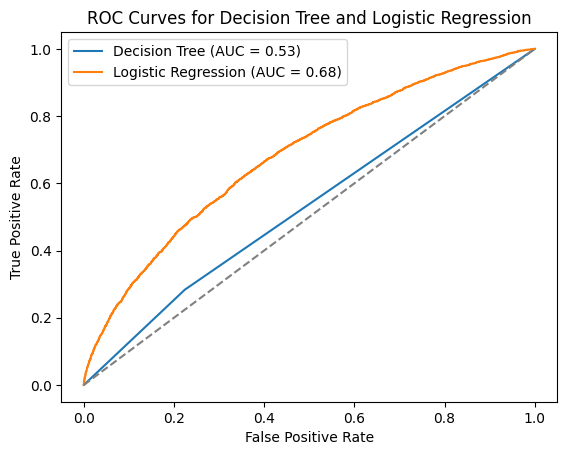

In [28]:
# build decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X = df_woe_train_drop_feature, y = df_woe_train_drop_target)

# predict probabilities on test set
y_pred_dt = dt.predict_proba(df_woe_test_drop_feature)[:,1]

# Calculate ROC curve and AUC score
fpr_dt, tpr_dt, thresholds_dt = roc_curve(df_woe_test_drop_target, y_pred_dt) 
auc_dt = roc_auc_score(df_woe_test_drop_target, y_pred_dt)

# Build logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(df_woe_train_drop_feature, df_woe_train_drop_target) # fit on train set
y_pred_lr = lr.predict_proba(df_woe_test_drop_feature)[:, 1] # predict probabilities on test set

fpr_lr, tpr_lr, thresholds_lr = roc_curve(df_woe_test_drop_target, y_pred_lr) # logistic regression
auc_lr = roc_auc_score(df_woe_test_drop_target, y_pred_lr)

# Plot ROC curves and compare AUC scores for both models
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(auc_dt))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(auc_lr))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Decision Tree and Logistic Regression")
plt.legend()
plt.show()

## Before feature transformation <a class="anchor" id="52"></a>

In [29]:
selected_columns = ["loan_default"] + features
train3 = train2[selected_columns]
test3 = test2[selected_columns]

train3.replace([np.inf, -np.inf], np.nan, inplace=True)
train3_drop = train3.dropna()

test3.replace([np.inf, -np.inf], np.nan, inplace=True)
test3_drop = test3.dropna()


In [30]:
train3_drop_feature = train3_drop.iloc[:,1:]
train3_drop_target = train3_drop[['loan_default']]

test3_drop_feature = test3_drop.iloc[:,1:]
test3_drop_target = test3_drop[['loan_default']]

test3_drop_feature = test3_drop_feature.astype('float32')


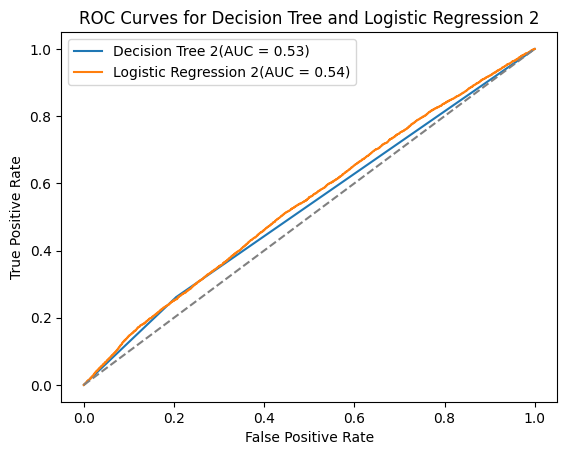

In [31]:
# build decision tree
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X = train3_drop_feature, y = train3_drop_target)

# predict probabilities on test set
y_pred_dt2= dt2.predict_proba(test3_drop_feature)[:,1]

# Calculate ROC curve and AUC score
fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(test3_drop_target, y_pred_dt2) 
auc_dt2 = roc_auc_score(test3_drop_target, y_pred_dt2)

# Build logistic regression model
lr2 = LogisticRegression(random_state=42)
lr2.fit(train3_drop_feature, train3_drop_target) # fit on train set
y_pred_lr2 = lr2.predict_proba(test3_drop_feature)[:, 1] # predict probabilities on test set

fpr_lr2, tpr_lr2, thresholds_lr2 = roc_curve(test3_drop_target, y_pred_lr2) 
auc_lr2= roc_auc_score(test3_drop_target, y_pred_lr2)

# Plot ROC curves and compare AUC scores for both models
plt.plot(fpr_dt2, tpr_dt2, label="Decision Tree 2(AUC = {:.2f})".format(auc_dt2))
plt.plot(fpr_lr2, tpr_lr2, label="Logistic Regression 2(AUC = {:.2f})".format(auc_lr2))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Decision Tree and Logistic Regression 2")
plt.legend()
plt.show()

The plots show that:

The decision tree model has a lower AUC score than the logistic regression model, meaning that it has a worse performance in distinguishing between default and non-default cases.
The decision tree model has a flatter ROC curve than the logistic regression model, meaning that it has a lower true positive rate and a higher false positive rate at different thresholds.
 

Compared the two plots, the first plot has a higher AUC score and stepper ROC curve in both models than the second plot. Hence, the feature transformation enhanced the model because it converted the categorical variables into continuous variables that measure the log odds of being in the default group or not for each category. This made the variables more informative and predictive of the target variable, and also reduced the dimensionality and complexity of the data. 

# Section 6 Random Forest Model <a class="anchor" id="6"></a>


## Base RF model <a class="anchor" id="61"></a>
use all the default values for the hyperpamaters

### Model with small sample <a class="anchor" id="611"></a>

In [32]:
# !pip3 install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.1" 2023-10-17; OpenJDK Runtime Environment Homebrew (build 21.0.1); OpenJDK 64-Bit Server VM Homebrew (build 21.0.1, mixed mode, sharing)
  Starting server from /opt/homebrew/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5c/w71hhy094y39nl297dxbgtj00000gn/T/tmp36e01x2p
  JVM stdout: /var/folders/5c/w71hhy094y39nl297dxbgtj00000gn/T/tmp36e01x2p/h2o_celine_started_from_python.out
  JVM stderr: /var/folders/5c/w71hhy094y39nl297dxbgtj00000gn/T/tmp36e01x2p/h2o_celine_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month and 6 days
H2O_cluster_name:           H2O_from_python_celine_hecvch
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.984 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.6 final
--------------------------  -----------------------------

In [33]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf1 = H2ORandomForestEstimator(
        model_id = 'rf1',
        seed=1234)
# train the model on the train_hex
rf1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          303037                 20           20           20            398           506           475.12

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.16267839303757625
RMSE: 0.4033340960513706
MAE: 0.3110119409373218
RMSLE: 0.287178523701173
Mean Residual Deviance: 0.16267839303757625

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-14 23:54:50  0.110 sec   0.0                nan                  nan                  nan
     2023-12-14 23:54:50  0.304 sec   1.0                0.532161690725343    0.30869184371160263  0.28319606507565565
     2023-12-14 23:54:50  0.365 sec   2.0                0.5219164984273768   0.30857110145742717  0.2723968313306939
     2023-12-14 23:54:50  0.413 sec   3.0                0.5095261989035336   0.30702964581026304  0.25961694736908325
     2023-12-14 23:54:50  0.481 sec   4.0                0.4995231955163012   0.3064643078657171   0.2495234228588169
     2023-12-14 23:54:50  0.512 sec   5.0                0.48719778364108923  0.30675244612197783  0.23736168038478958
     2023-12-14 23:54:50  0.537 sec   6.0                0.4783424768878887   0.30760244131929704  0.22881152519524037
     2023-12-14 23:54:50  0.566 sec   7.0                0.46723242882938615  0.305482792997917    0.21830614254980737
     2023-12-14 23:54:50  0.591 sec   8.0                0.45935791022679545  0.3068094028399075   0.21100968968792866
     2023-12-14 23:54:50  0.617 sec   9.0                0.4536784294435355   0.30642870378567955  0.20582411734235298
---  ---                  ---         ---                ---                  ---                  ---
     2023-12-14 23:54:51  1.360 sec   41.0               0.40519548510133707  0.31019483315869517  0.16418338114650785
     2023-12-14 23:54:51  1.380 sec   42.0               0.40484296725144636  0.31014724479678124  0.16389782813295567
     2023-12-14 23:54:51  1.398 sec   43.0               0.4051562921324965   0.31080859402472333  0.16415162105455283
     2023-12-14 23:54:51  1.415 sec   44.0               0.40510126968244836  0.311254450758164    0.16410703869833176
     2023-12-14 23:54:51  1.435 sec   45.0               0.404642359183928    0.3112026589049849   0.16373543884593497
     2023-12-14 23:54:51  1.452 sec   46.0               0.40424700530722246  0.3111380674967675   0.16341564129985753
     2023-12-14 23:54:51  1.469 sec   47.0               0.4040403273792886   0.31103833786161594  0.1632485861487627
     2023-12-14 23:54:51  1.493 sec   48.0               0.40378654437187594  0.3110272880633565   0.16304357341578093
     2023-12-14 23:54:51  1.512 sec   49.0               0.4034187348995921   0.3107860506829482   0.1627466756679874
     2023-12-14 23:54:51  1.532 sec   50.0               0.4033340960513706   0.3110119409373218   0.16267839303757625
[51 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance     percentage
-------------  ---------------------  --------------------  ---------------------
TD009          751.1357421875         1.0                   0.0323920350820678
MB005          621.27783203125        0.8271179190886717    0.02679203265212717
TD013          614.8014526367188      0.8184958032302646    0.02651274477275999
AP001          598.912109375          0.797342045834238     0.02582

In [35]:
# Make predictions on test_hex
predictions = rf1.predict(test_hex)
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.162637
1             0  0.094117
2             0  0.240920
3             0  0.440000
4             0  0.320000

In [36]:
# show the importance of features
def VarImp(model_name):

    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()

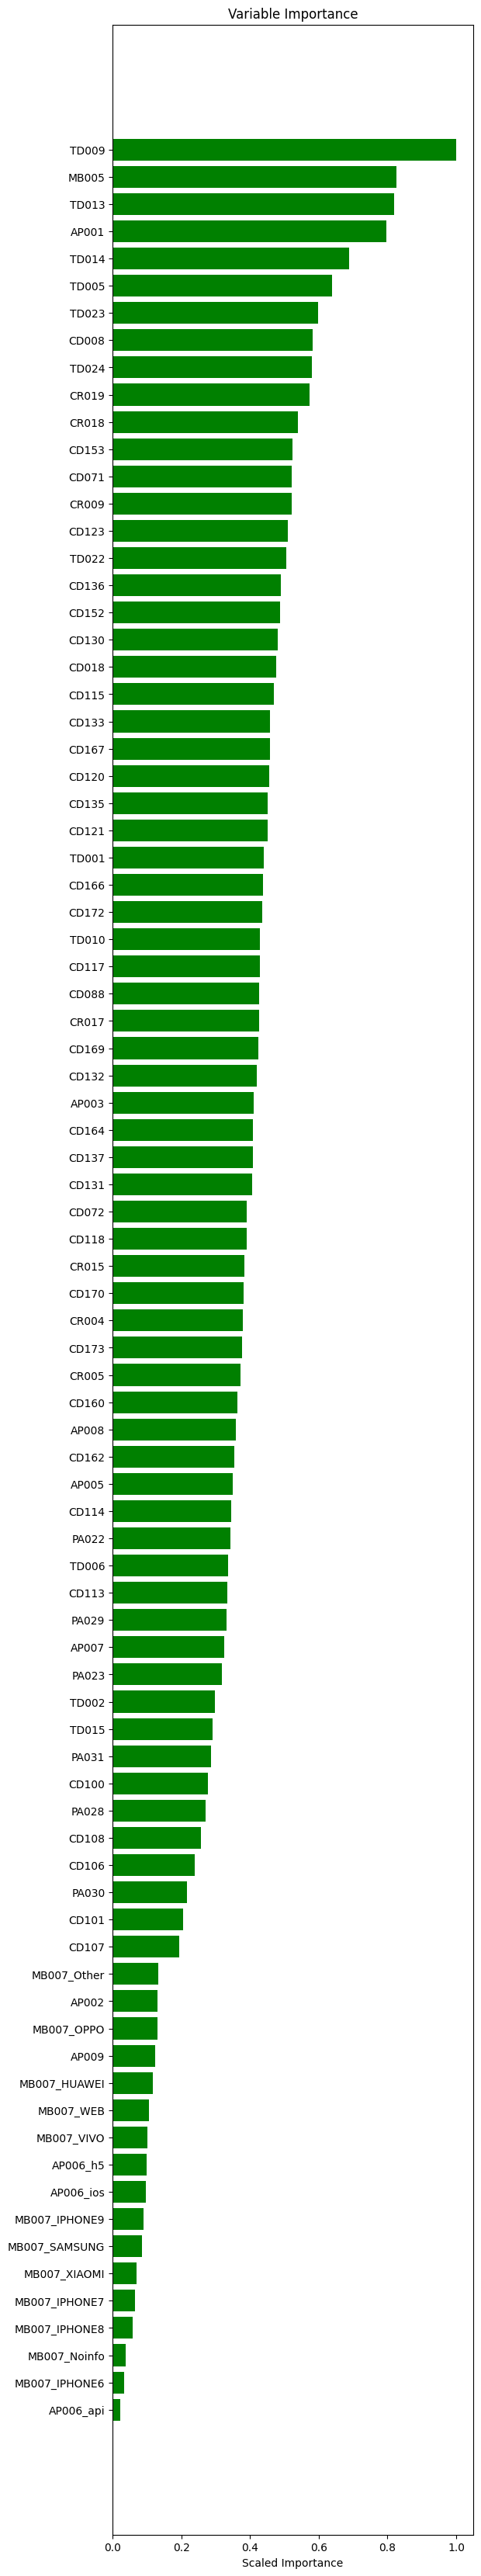

In [37]:
VarImp(rf1)

In [38]:
# evaluate the model using ROC_AUC and Precision-Recall
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



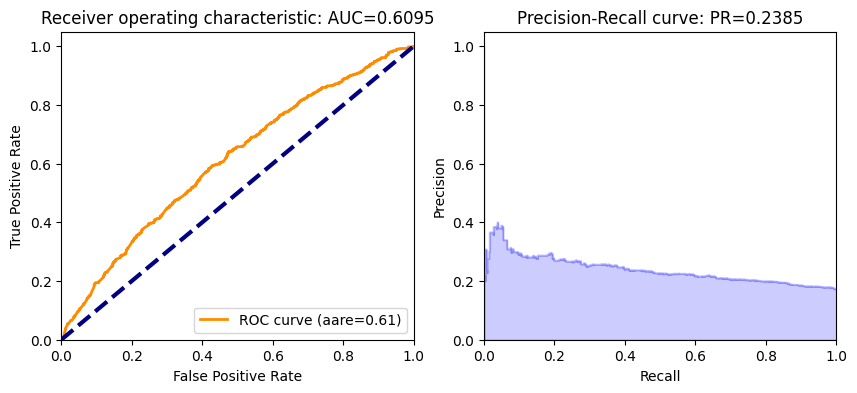

In [39]:
ROC_AUC(rf1,test_hex,'loan_default')

### Model with entire dataset <a class="anchor" id="612"></a>

In [40]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

rf2 = H2ORandomForestEstimator(
        model_id = 'rf2',
        seed=1234)

rf2.train(predictors,target,training_frame=train_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          2.4363e+06             20           20           20            3478          4165          3855.36

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.15528484639717954
RMSE: 0.3940619829381915
MAE: 0.3014573745632565
RMSLE: 0.27979451962402746
Mean Residual Deviance: 0.15528484639717954

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-14 23:54:55  0.067 sec   0.0                nan                  nan                  nan
     2023-12-14 23:54:55  0.215 sec   1.0                0.5211927808415948   0.30083749701681795  0.27164191480139466
     2023-12-14 23:54:55  0.339 sec   2.0                0.508527164342584    0.30211082286914687  0.25859987687430946
     2023-12-14 23:54:56  0.456 sec   3.0                0.49447023961616954  0.3005280997621612   0.2445008178660721
     2023-12-14 23:54:56  0.579 sec   4.0                0.4817375279687636   0.29934399246745175  0.23207104585345534
     2023-12-14 23:54:56  0.691 sec   5.0                0.4720230937827132   0.3006144778278762   0.22280580106420403
     2023-12-14 23:54:56  0.805 sec   6.0                0.46196250100293323  0.2999244625196536   0.2134093523328851
     2023-12-14 23:54:56  0.920 sec   7.0                0.4546941166537338   0.3002669477278306   0.2067467397195193
     2023-12-14 23:54:56  1.042 sec   8.0                0.4464284722983404   0.300145024785101    0.19929838087863008
     2023-12-14 23:54:56  1.168 sec   9.0                0.44039092640679167  0.30101837692887595  0.1939441680614322
---  ---                  ---         ---                ---                  ---                  ---
     2023-12-14 23:54:58  2.866 sec   24.0               0.4049234031970567   0.30182907122044184  0.16396296245668618
     2023-12-14 23:54:58  2.972 sec   25.0               0.4039352732916561   0.30176947195820464  0.16316370500920493
     2023-12-14 23:54:58  3.085 sec   26.0               0.40331614896515805  0.3018229074295528   0.16266391601608557
     2023-12-14 23:54:58  3.200 sec   27.0               0.40246786837619575  0.30164364522047604  0.16198038507527884
     2023-12-14 23:54:58  3.312 sec   28.0               0.4018262311923383   0.3016710445353661   0.1614643200742385
     2023-12-14 23:54:59  3.420 sec   29.0               0.40113932611585995  0.30155560589299457  0.16091275895668622
     2023-12-14 23:54:59  3.533 sec   30.0               0.40051072083281186  0.3014350791184183   0.16040883750201856
     2023-12-14 23:54:59  3.659 sec   31.0               0.39989803377514727  0.30148300397136774  0.1599184374172288
     2023-12-14 23:54:59  4.056 sec   32.0               0.3992548543599486   0.30131260352168227  0.15940443872998378
     2023-12-14 23:55:02  6.362 sec   50.0               0.3940619829381915   0.3014573745632565   0.15528484639717954
[34 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance     percentage
-------------  ---------------------  --------------------  ---------------------
TD013          5957.40966796875       1.0                   0.030409085649529134
TD009          5412.7041015625        0.9085667099016251    0.02762868289970941
MB005          5344.33837890625       0.8970909634838771    0.027279715943999833
AP001          5277.8994140625        0.8859386391438249    0.0

In [41]:
# Make predictions on test_h2o
predictions2 = rf2.predict(test_h2o)
test_scores2 = test_h2o['loan_default'].cbind(predictions2).as_data_frame()
test_scores2.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.216241
1             0  0.065330
2             0  0.485989
3             0  0.226714
4             0  0.327240

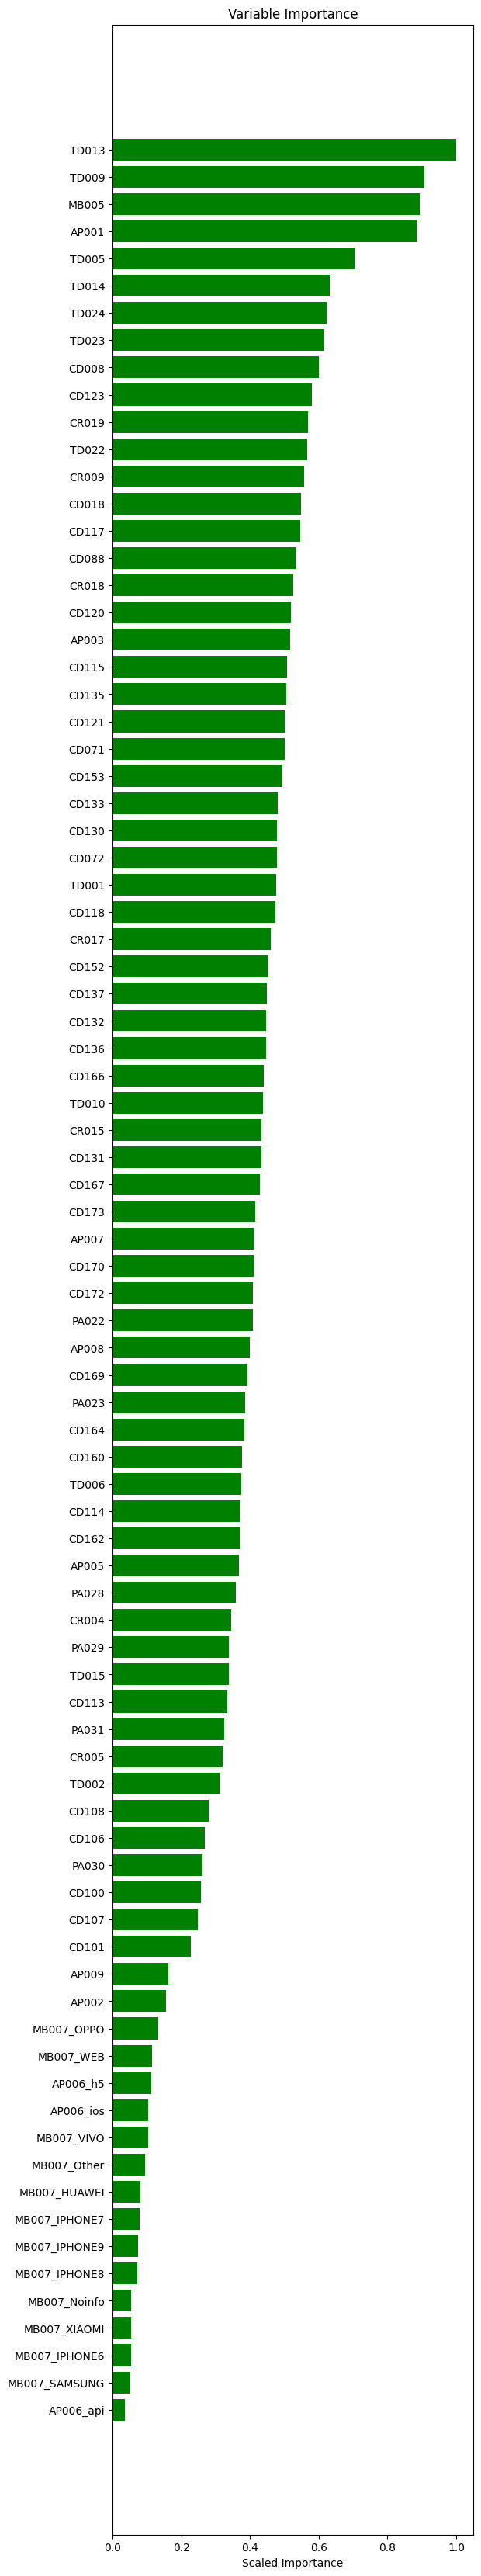

In [42]:
VarImp(rf2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



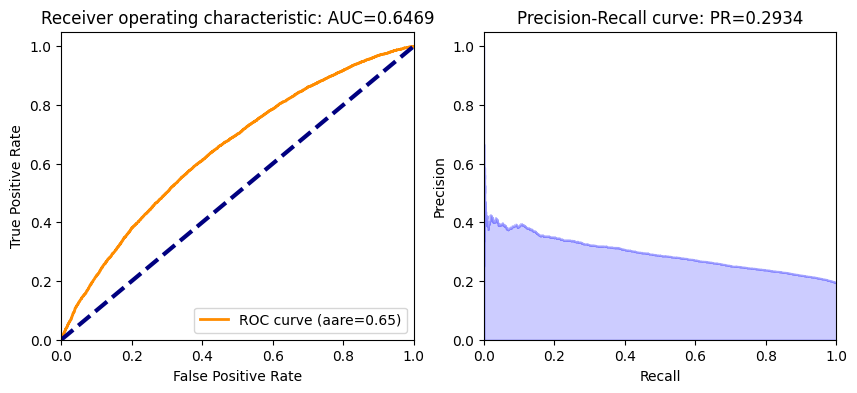

In [43]:
ROC_AUC(rf2, test_h2o,'loan_default')

## Use Grid-search to find the optimal hyper-parameters <a class="anchor" id="62"></a>

In [44]:
from h2o.grid.grid_search import H2OGridSearch
# Define the hyperparameter grid for grid search
rf_hyper_params = {
    'ntrees': [50, 150, 300],
    'max_depth': [10, 20, 30],
    'min_rows': [50, 100, 200]}

# Create the grid search object with the GBM model and the hyperparameter grid
grid = H2OGridSearch(model=rf2, hyper_params=rf_hyper_params)

# Train the grid search on the training data
grid.train(x=predictors, y=target, training_frame=train_h2o)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     max_depth    min_rows    ntrees    model_ids                                                                                              residual_deviance
---  -----------  ----------  --------  -----------------------------------------------------------------------------------------------------  -------------------
     30.0         50.0        300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_21  0.14718504504919008
     20.0         50.0        300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_20  0.14718510104693036
     30.0         50.0        150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_12  0.14727851204096046
     20.0         50.0        150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_11  0.1472792627722318
     10.0         50.0        300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_19  0.14736490803185354
     10.0         50.0        150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_10  0.14742842200951356
     20.0         100.0       300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_23  0.14751801602285738
     30.0         100.0       300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_24  0.14751801602285738
     20.0         100.0       150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_14  0.14754473131261234
     30.0         100.0       150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_15  0.14754473131261234
---  ---          ---         ---       ---                                                                                                    ---
     10.0         50.0        50.0      Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_1   0.1476934843376959
     20.0         200.0       300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_26  0.1479174331592285
     30.0         200.0       300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_27  0.1479174331592285
     20.0         200.0       150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_17  0.14792370870560095
     30.0         200.0       150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_18  0.14792370870560095
     10.0         200.0       300.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_25  0.14793300695644254
     10.0         200.0       150.0     Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_16  0.14794384638109806
     20.0         200.0       50.0      Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_8   0.14800123452157393
     30.0         200.0       50.0      Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_9   0.14800123452157393
     10.0         200.0       50.0      Grid_DRF_Key_Frame__upload_aa7b090798f9cb3b32979350d14f4527.hex_model_python_1702616085898_1_model_7   0.14802007176459844
[27 rows x 6 columns]

In [45]:
# Get the best model from grid search
best_model_rf = grid.get_grid()[0]
print(best_model_rf.summary())


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         1.72804e+06            14           23           17.5633       433           466           452.017


In [46]:
predictions3 = best_model_rf.predict(test_h2o)
test_scores3 = test_h2o['loan_default'].cbind(predictions3).as_data_frame()
test_scores3.head()


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.230157
1             0  0.207284
2             0  0.268065
3             0  0.216202
4             0  0.267670

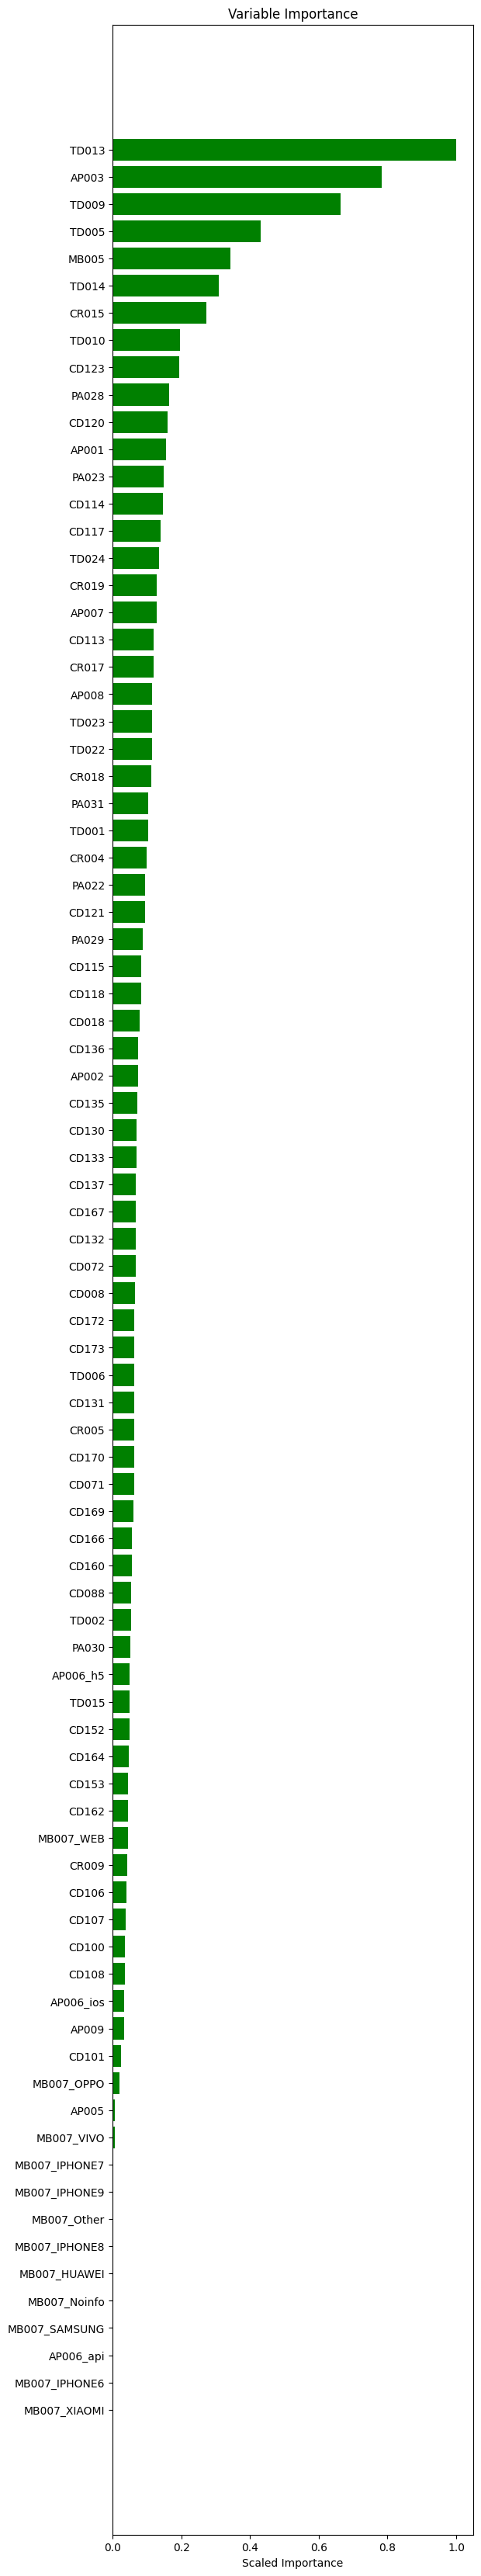

In [47]:
VarImp(best_model_rf)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



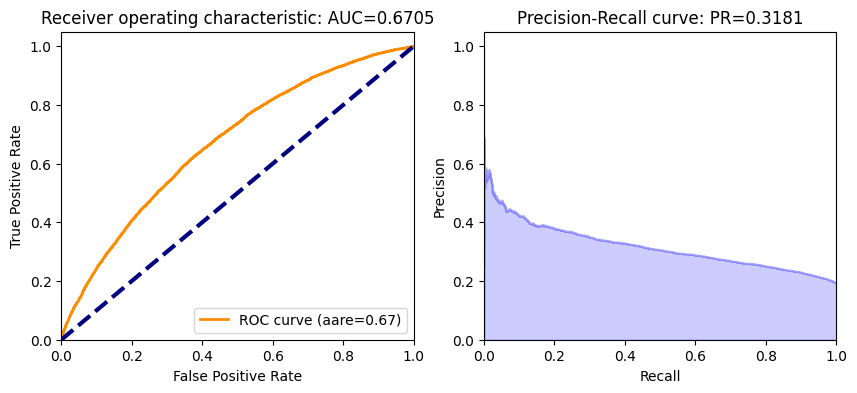

In [48]:
ROC_AUC(best_model_rf, test_h2o, 'loan_default')

The variable importance plot of glm_4's top 10 variables closely resembles that of the base model (glm_2). Morever, best model exhibits slightly imporved performance with higher AUC and PR scores compared to rf2.


## Under-sampling before Training a Random Forest Model <a class="anchor" id="63"></a>

In [49]:
from imblearn.under_sampling import RandomUnderSampler
X_train = train.iloc[:,1:]
X_test  = test.iloc[:,1:]
y_train = train['loan_default']
y_test = test['loan_default']

rus = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = rus.fit_resample(X_train,y_train)

X_under = pd.DataFrame(X_under)
y_under = pd.DataFrame(y_under)
y_under = data_dummy[data_dummy[target]==1]
X_under = data_dummy[data_dummy[target]==0].sample(n= (data_dummy[target].sum()) * 2)
smpl = pd.concat([X_under,y_under])
smpl_hex = h2o.H2OFrame(smpl)

# use the parameters in best_model
rf4 = H2ORandomForestEstimator(
        model_id = 'rf4',
        ntrees = 300,
        max_depth=20,
        min_rows=50,
        seed=1234)

rf4.train(predictors,target,training_frame=smpl_hex)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         1.68374e+06            14           20           16.71         426           455           440.55

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.20485172767501886
RMSE: 0.45260548789759375
MAE: 0.41388381395779383
RMSLE: 0.3179870056188172
Mean Residual Deviance: 0.20485172767501886

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-14 23:57:31  0.043 sec   0.0                nan                  nan                  nan
     2023-12-14 23:57:31  0.088 sec   1.0                0.4697933461603331   0.4136980941117502   0.22070578809652255
     2023-12-14 23:57:31  0.129 sec   2.0                0.4682219973327557   0.4144481087680059   0.2192318387862751
     2023-12-14 23:57:31  0.169 sec   3.0                0.46653064139653816  0.41432036187903143  0.21765083936186527
     2023-12-14 23:57:31  0.208 sec   4.0                0.4652388650279361   0.41446263318089216  0.21644720153248212
     2023-12-14 23:57:31  0.258 sec   5.0                0.46389417541115563  0.41449438954626705  0.215197805980396
     2023-12-14 23:57:31  0.298 sec   6.0                0.46262421223156325  0.4145194306197657   0.2140211617428745
     2023-12-14 23:57:31  0.338 sec   7.0                0.46112962001379015  0.4145503341558371   0.21264052645406248
     2023-12-14 23:57:31  0.393 sec   8.0                0.4601517210370468   0.4145506145860938   0.21173960637335618
     2023-12-14 23:57:31  0.452 sec   9.0                0.459168033083554    0.41428235657150836  0.21083528260581974
---  ---                  ---         ---                ---                  ---                  ---
     2023-12-14 23:57:35  3.778 sec   88.0               0.45309207637955723  0.4140133808172334   0.20529242967793854
     2023-12-14 23:57:35  3.819 sec   89.0               0.4530937063756522   0.41402315123484823  0.20529390675722572
     2023-12-14 23:57:35  3.861 sec   90.0               0.4530773411142877   0.41400813194233654  0.2052790770311926
     2023-12-14 23:57:35  3.905 sec   91.0               0.4530636616859683   0.41398661167842044  0.20526668154029754
     2023-12-14 23:57:35  3.944 sec   92.0               0.45305083310163163  0.413969132815447    0.2052550573740825
     2023-12-14 23:57:35  3.993 sec   93.0               0.45306471490723743  0.4140065098686674   0.20526763589397634
     2023-12-14 23:57:35  4.033 sec   94.0               0.4530715324891926   0.41400693602179467  0.2052738135521055
     2023-12-14 23:57:39  8.033 sec   194.0              0.4527333417023033   0.4138959329473875   0.2049674786889345
     2023-12-14 23:57:43  12.050 sec  296.0              0.452607051048042    0.4138941629926565   0.20485314265840487
     2023-12-14 23:57:43  12.206 sec  300.0              0.45260548789759375  0.41388381395779383  0.20485172767501886
[98 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance      percentage
-------------  ---------------------  ---------------------  ----------------------
TD013          35705.390625           1.0                    0.12651486123435327
AP003          27182.48828125         0.7612992829776666     0.09631567314373213
TD009          22736.046875           0.6367679075069634     0.08056060345673298
TD005          14820.94921875         0.4150899614685283     

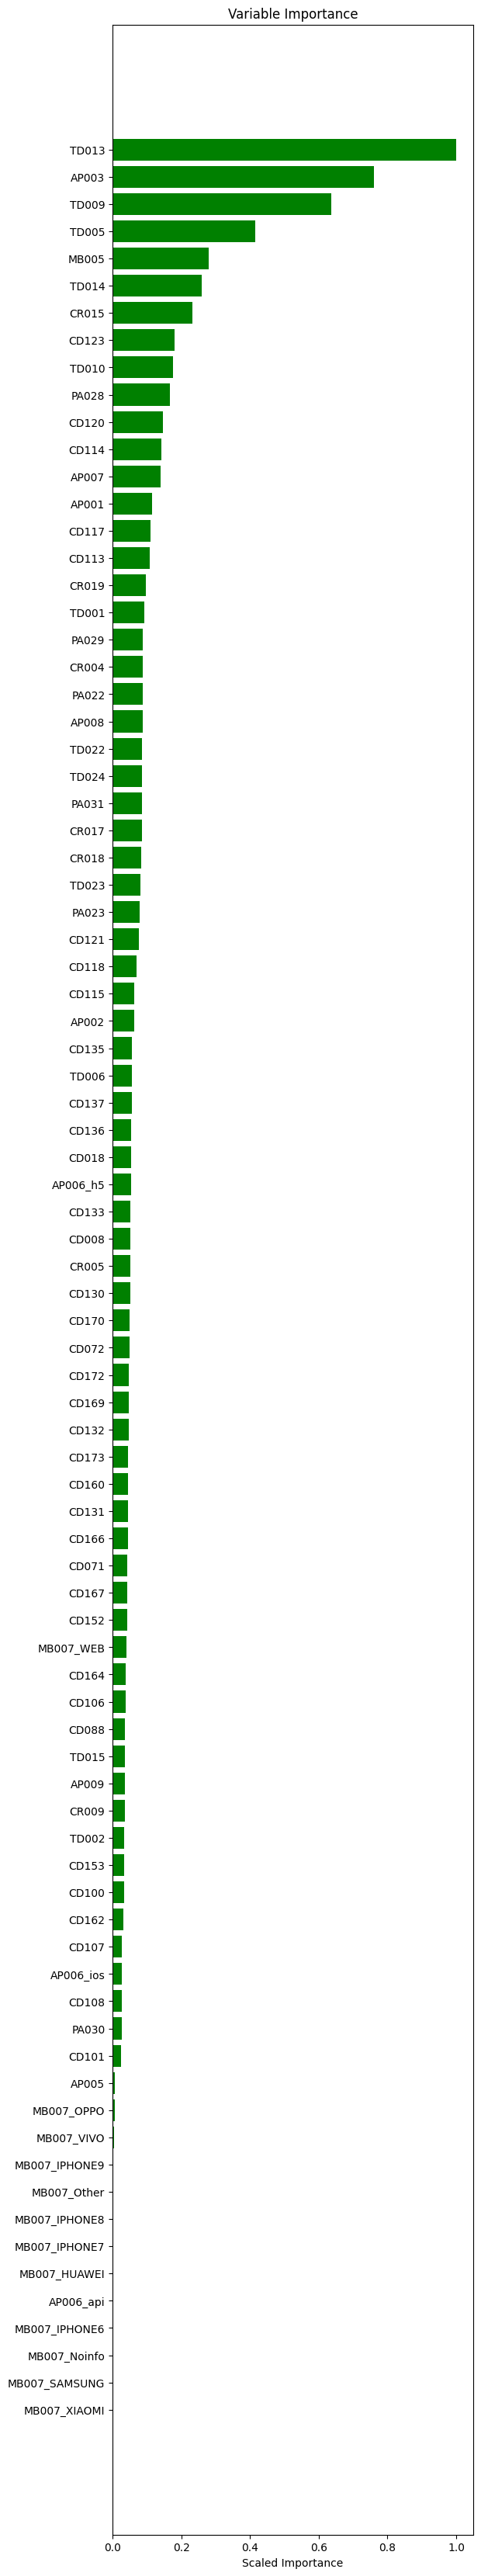

In [50]:
VarImp(rf4)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



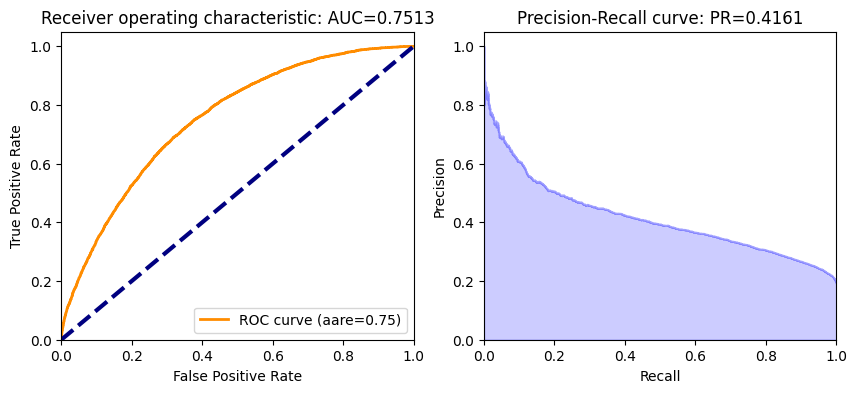

In [51]:
ROC_AUC(rf4,test_h2o,'loan_default')

## Over-sampling before Training a Random Forest Model <a class="anchor" id="64"></a>

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = ros.fit_resample(X_train, y_train)


X_over = pd.DataFrame(X_over)
y_over = pd.DataFrame(y_over)
y_over = data_dummy[data_dummy[target]==1]
X_over = data_dummy[data_dummy[target]==0].sample(n=(data_dummy[target].sum()) * 2)
smpl = pd.concat([X_over,y_over])
smpl_hex = h2o.H2OFrame(smpl)

rf5 = H2ORandomForestEstimator(
        model_id = 'rf5',
        ntrees = 300,
        max_depth = 200,
        min_rows=50,
        seed=1234)
rf5.train(predictors,target,training_frame=smpl_hex)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf5


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         1.68434e+06            14           21           16.6767       423           451           440.507

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.20503354376705304
RMSE: 0.4528062982855396
MAE: 0.41408852028847254
RMSLE: 0.3181044815748309
Mean Residual Deviance: 0.20503354376705304

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-14 23:57:46  0.033 sec   0.0                nan                  nan                  nan
     2023-12-14 23:57:46  0.079 sec   1.0                0.47284056781807293  0.41575762389952325  0.2235782025745176
     2023-12-14 23:57:46  0.121 sec   2.0                0.46993008513775075  0.41575640888175497  0.22083428491757368
     2023-12-14 23:57:46  0.167 sec   3.0                0.4674170618451736   0.41487565642981256  0.21847870970397487
     2023-12-14 23:57:46  0.208 sec   4.0                0.46605065887658986  0.4149786946352963   0.21720321663930353
     2023-12-14 23:57:46  0.252 sec   5.0                0.46385812331826076  0.41429649624573944  0.2151643585683388
     2023-12-14 23:57:46  0.321 sec   6.0                0.4624897881251252   0.41415344310580054  0.2138968041200232
     2023-12-14 23:57:46  0.361 sec   7.0                0.461418111150211    0.414374488916506    0.21290667329742846
     2023-12-14 23:57:46  0.402 sec   8.0                0.4603641366656642   0.41425268072527904  0.21193513832792235
     2023-12-14 23:57:46  0.444 sec   9.0                0.45957133203793504  0.4141501322388589   0.21120580923112192
---  ---                  ---         ---                ---                  ---                  ---
     2023-12-14 23:57:50  3.737 sec   84.0               0.4530535337568477   0.41392971513951843  0.20525750444956714
     2023-12-14 23:57:50  3.782 sec   85.0               0.45304630173047133  0.41392908676759577  0.20525095151165726
     2023-12-14 23:57:50  3.826 sec   86.0               0.4530661266756683   0.4139633675446278   0.2052689151408927
     2023-12-14 23:57:50  3.873 sec   87.0               0.4530728368772022   0.4139843467104859   0.20527499551595588
     2023-12-14 23:57:50  3.921 sec   88.0               0.45307271879426264  0.4139894083491749   0.20527488851562498
     2023-12-14 23:57:50  3.987 sec   89.0               0.45306696990816403  0.4139813348187694   0.20526967922176523
     2023-12-14 23:57:50  4.033 sec   90.0               0.45307779415971344  0.4139893844631984   0.20527948756063166
     2023-12-14 23:57:54  8.044 sec   177.0              0.4529221810423727   0.41411936589879333  0.20513850208017984
     2023-12-14 23:57:58  12.052 sec  274.0              0.4528386531446615   0.414106768029287    0.20506284578187103
     2023-12-14 23:57:59  13.152 sec  300.0              0.4528062982855396   0.41408852028847254  0.20503354376705304
[94 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance       percentage
-------------  ---------------------  ----------------------  ----------------------
TD013          34277.94140625         1.0                     0.12176549518767776
AP003          26565.357421875        0.7749986239556165      0.09436809121572451
TD009          22511.029296875        0.6567205722794804      0.07996590568354607
TD005          14945.1455078125       0.435998922184

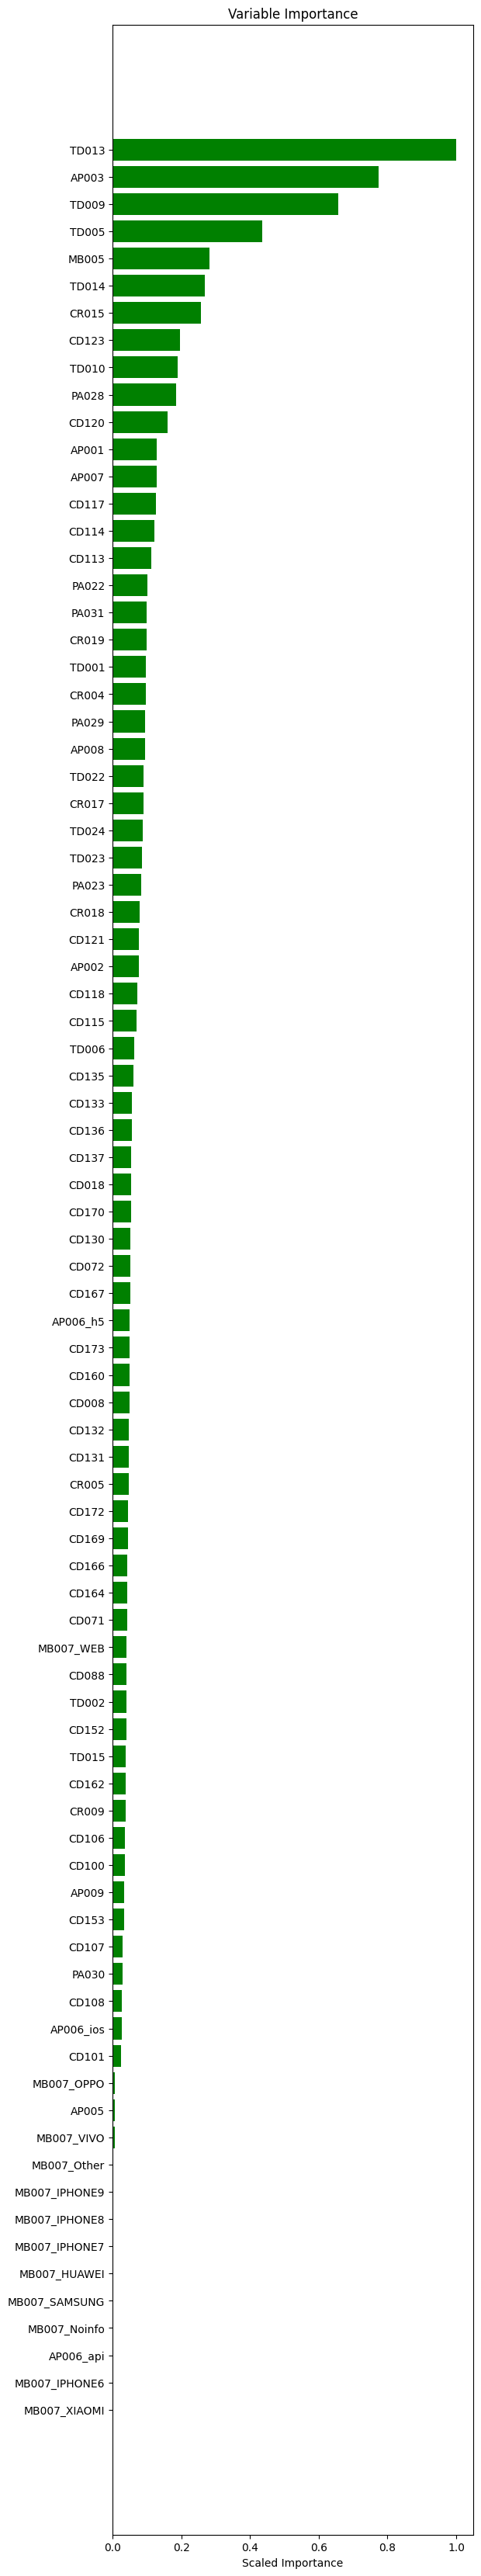

In [53]:
VarImp(rf5)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



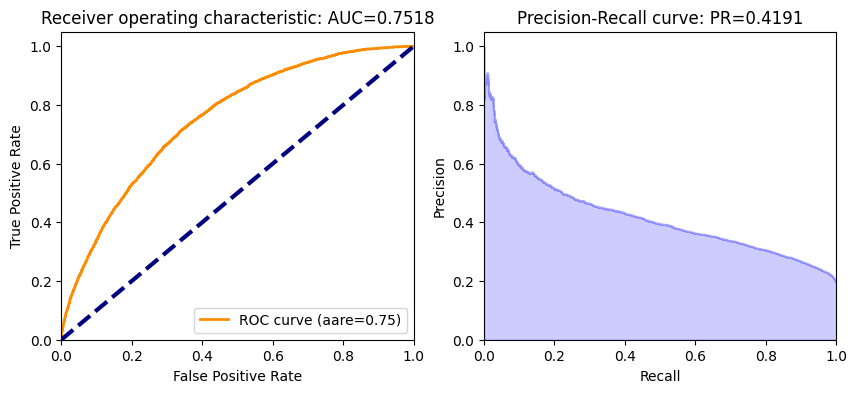

In [54]:
ROC_AUC(rf5,test_h2o,'loan_default')

Overall, rf4 perform best with the highest AUC score and PR score among all the rf models.

Now, let's switch to scikit-learn to further analyze the top variables from rf5, create specific plots, and handle categorical variables appropriately.

## Scikit-Learn Random Forest Model <a class="anchor" id="65"></a>

In [55]:
# Extract Top 20 Variables from rf5
varimp  = rf4._model_json['output']['variable_importances']['variable']
top_20_var = varimp[:20]

# Prepare data for Scikit-Learn model and take 10% sample
X_train_smpl = train_smpl[top_20_var].copy()
X_test_smpl = test_smpl[top_20_var].copy()
y_train_smpl = train_smpl['loan_default']
y_test_smpl = test_smpl['loan_default']


print(X_train_smpl.shape, X_test_smpl.shape)

(4800, 20) (3200, 20)


In [56]:
X_train_smpl.head()

TD013  AP003  TD009  TD005  MB005  TD014  CR015  CD123  TD010  PA028  \
6432       5      1      6      5    1.0      3      5   66.0      3  -98.0   
2725       6      1      5      5    1.0      3      6  -99.0      2  -98.0   
3290      16      4     14      5   10.0      5      6  265.0      5   99.0   
56231      3      1      2      2   19.0      1      6  208.0      1  -98.0   
69093     12      1      9      5   11.0      3      5  128.0      1  -98.0   

       CD120  CD114  AP007  AP001  CD117  CD113  CR019  TD001  PA029  CR004  
6432    59.0    1.0      3     25   33.0    0.0      9      3  -98.0      4  
2725   -99.0  -99.0      5     25  -99.0  -99.0      3      2  -98.0      4  
3290   190.0   11.0      1     31   84.0    7.0     12      4   99.0      2  
56231  150.0    0.0      1     46   70.0    0.0     10      2  -98.0      2  
69093   87.0    1.0      5     36   52.0    1.0     11      2  -98.0      2

In [57]:
# Train a Scikit-Learn Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf6 = RandomForestClassifier(n_estimators=300, max_depth=200, random_state=1234)
rf6.fit(X_train_smpl, y_train_smpl)


RandomForestClassifier(max_depth=200, n_estimators=300, random_state=1234)

### Summary plot<a class="anchor" id="651"></a>

In [58]:
# !pip3 install shap
import shap

In [59]:
explainer = shap.TreeExplainer(rf6)
shap_values = explainer.shap_values(X_train_smpl)

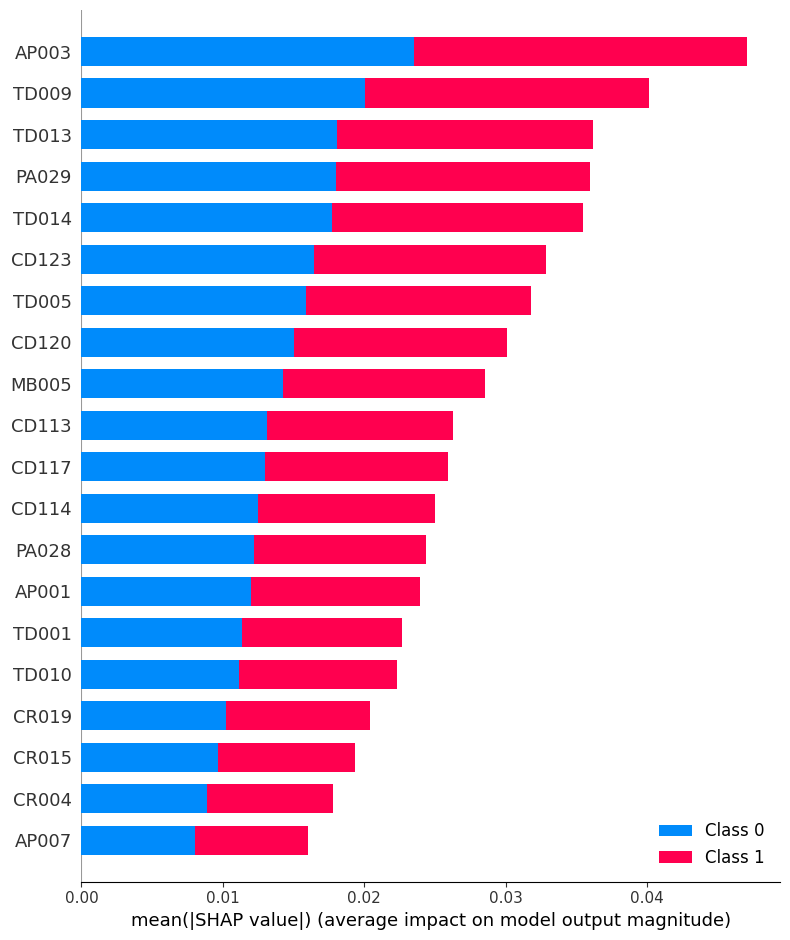

In [60]:
shap.summary_plot(shap_values, X_train_smpl, plot_type="bar")


As you can see, the TOP 10 important feature is AP003, followed by TD009, TD014, TD013, CD123, PA029, TD005, MB005, CD120 and CD117.

 the most important feature for class 0 (no default) is AP003, which is the borrowers' education. The higher the value of AP003, the lower the SHAP value, meaning that customers with a higher education are less likely to default. The most important feature for class 1 (default) is also AP003, but with the opposite effect. The higher the value of AP003, the higher the SHAP value, meaning that customers with less education are more likely to default.

### Dependence plot<a class="anchor" id="652"></a>

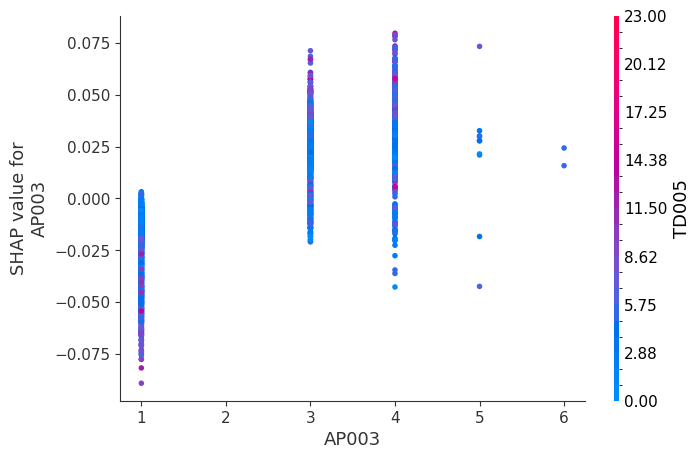

In [61]:
shap.dependence_plot("AP003", shap_values[0], X_train_smpl)


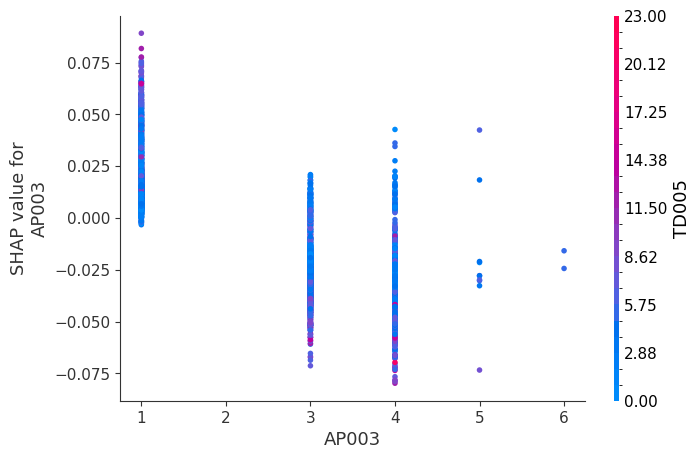

In [62]:
shap.dependence_plot("AP003", shap_values[1], X_train_smpl)


As you can see, there is not a linear relationship between AP003 and the SHAP value or the target 'loan_default'.

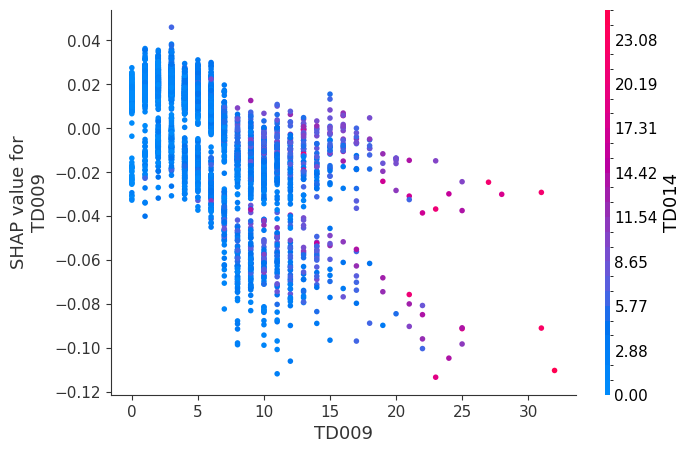

In [63]:
shap.dependence_plot("TD009", shap_values[0], X_train_smpl)


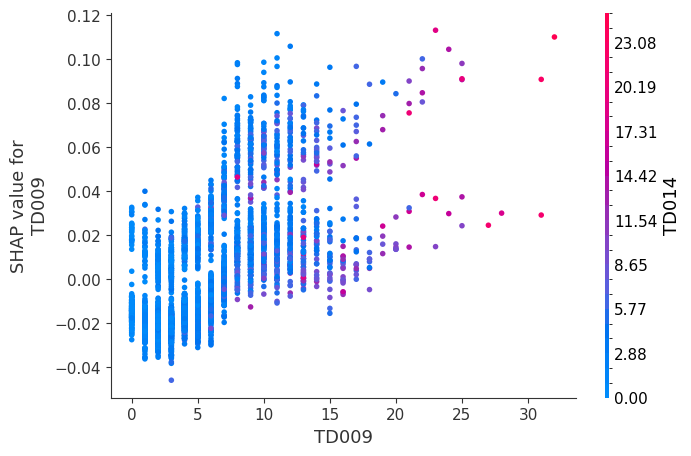

In [64]:
shap.dependence_plot("TD009", shap_values[1], X_train_smpl)


there is a negative trend between TD009 and class 0 while a positive trend between TD009 and class 1. You can also see that there is an interaction effect with CD012.

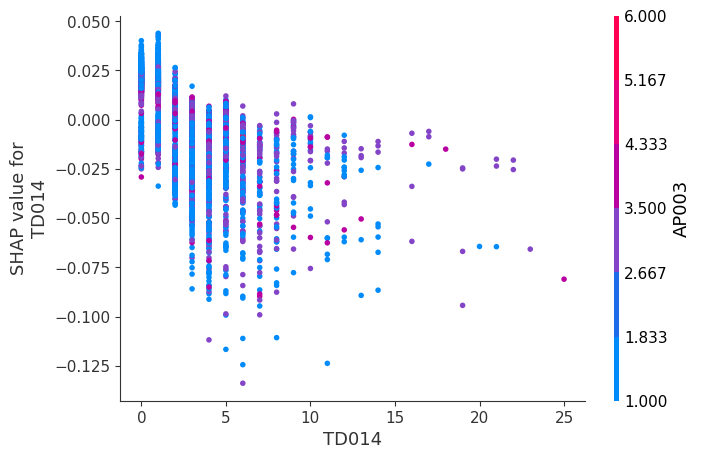

In [65]:
shap.dependence_plot("TD014", shap_values[0], X_train_smpl)


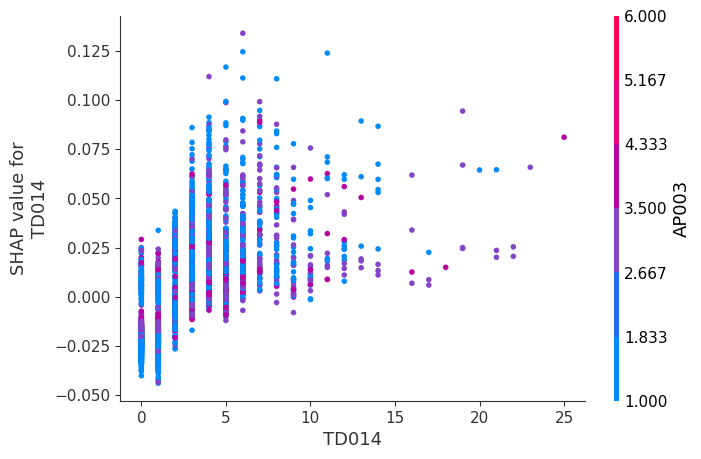

In [66]:
shap.dependence_plot("TD014", shap_values[1], X_train_smpl)


there is a relationship between TD014 and the target variable, but it is not clear whether positive or negative. there is also an interaction effect with AP003.

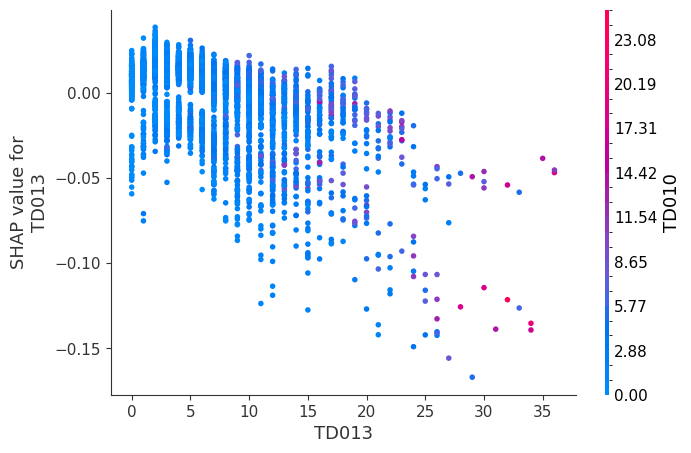

In [67]:
shap.dependence_plot("TD013", shap_values[0], X_train_smpl)


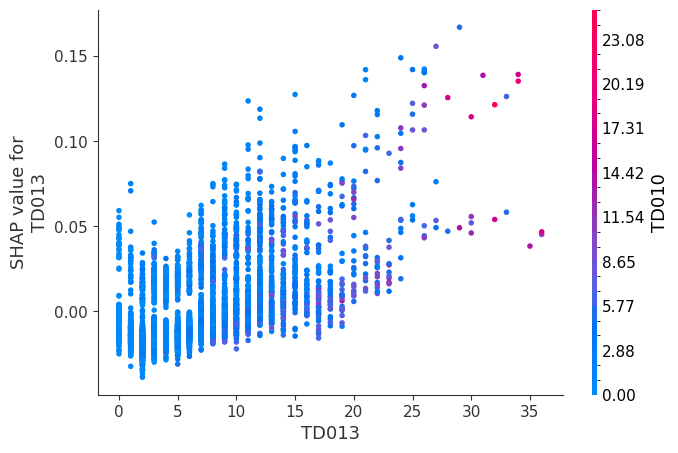

In [68]:
shap.dependence_plot("TD013", shap_values[1], X_train_smpl)


there is a negative trend between TD013 and class 0 while a positive trend between TD013 and class 1. You can also see that there is an interaction effect with TD010.

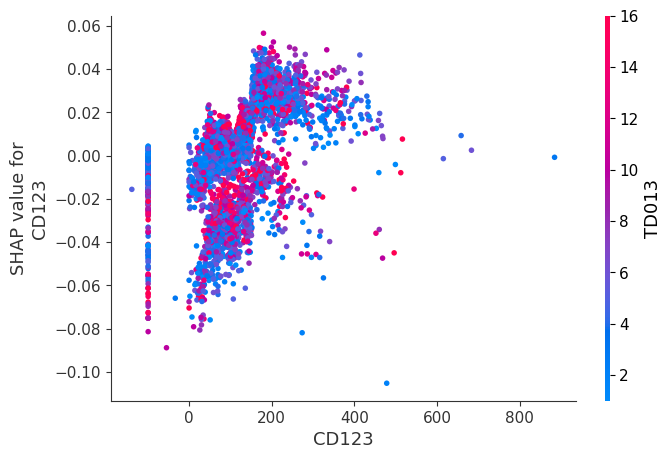

In [69]:
shap.dependence_plot("CD123", shap_values[0], X_train_smpl)


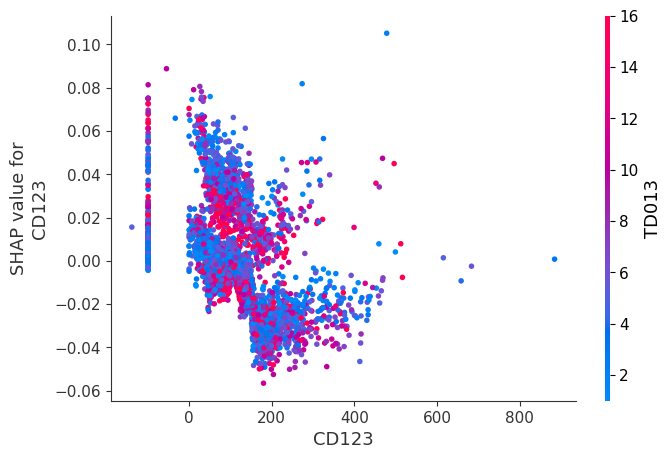

In [70]:
shap.dependence_plot("CD123", shap_values[1], X_train_smpl)


It exists a relationship between CD123 and the target variable, but not linear relationship. And CD123 interacts with TD009 frequently.

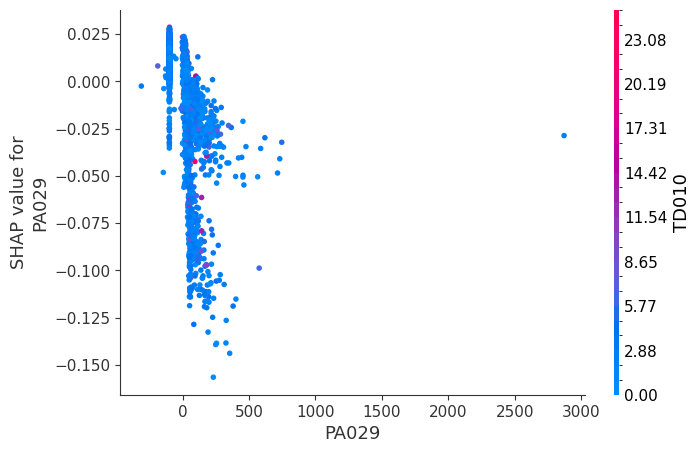

In [71]:
shap.dependence_plot("PA029", shap_values[0], X_train_smpl)


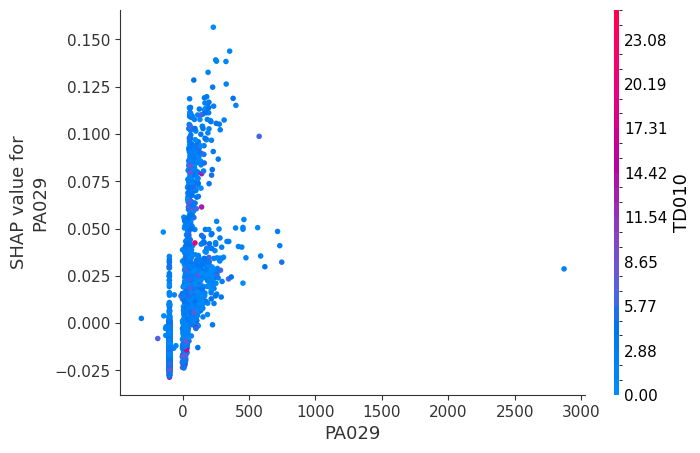

In [72]:
shap.dependence_plot("PA029", shap_values[1], X_train_smpl)


It exists a relationship between PA029 and the target variable, but not linear relationship. And CD113 interacts with TD010 frequently.

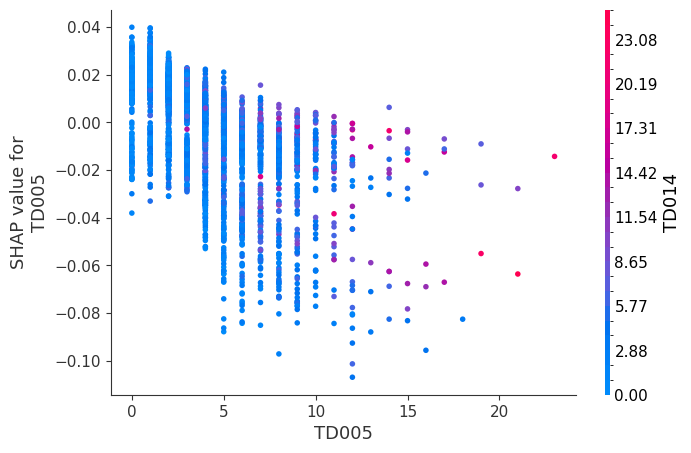

In [73]:
shap.dependence_plot("TD005", shap_values[0], X_train_smpl)


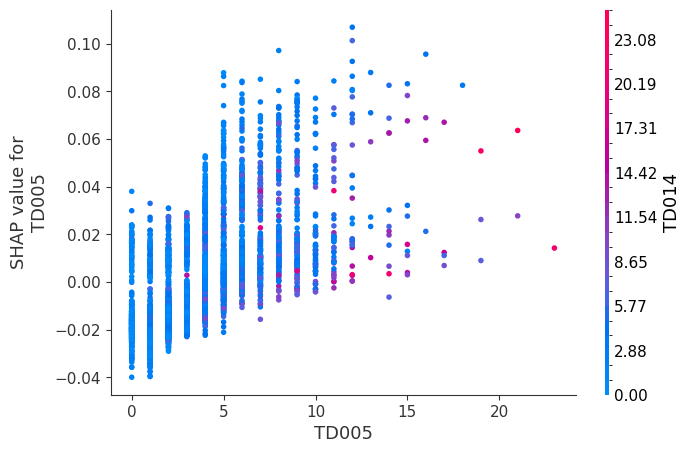

In [74]:
shap.dependence_plot("TD005", shap_values[1], X_train_smpl)


there is a negative trend between TD005 and class 0 while a positive trend between TD005 and class 1. You can also see that there is an interaction effect with TD013.

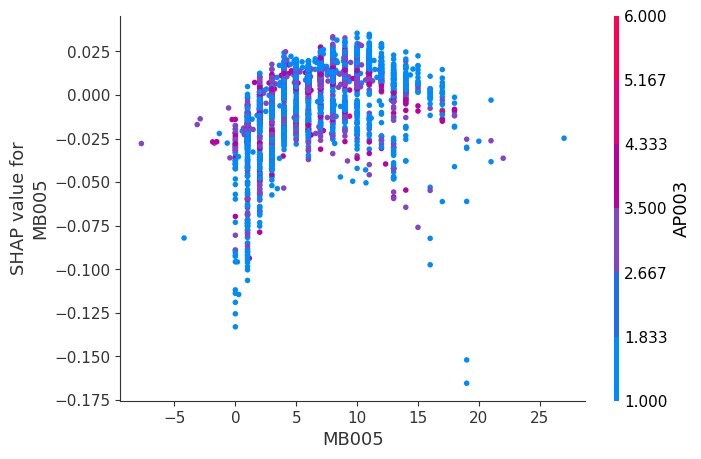

In [75]:
shap.dependence_plot("MB005", shap_values[0], X_train_smpl)


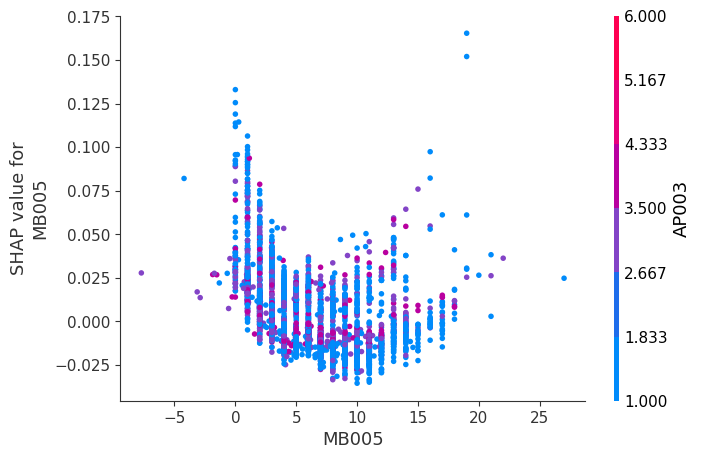

In [76]:
shap.dependence_plot("MB005", shap_values[1], X_train_smpl)


It looks like there is a down "U" relationship between MB005 and the target variable of class 0 while an up "U" relationship between MB005 and the target variable of class 1. And it interacts with AP003 frequently.

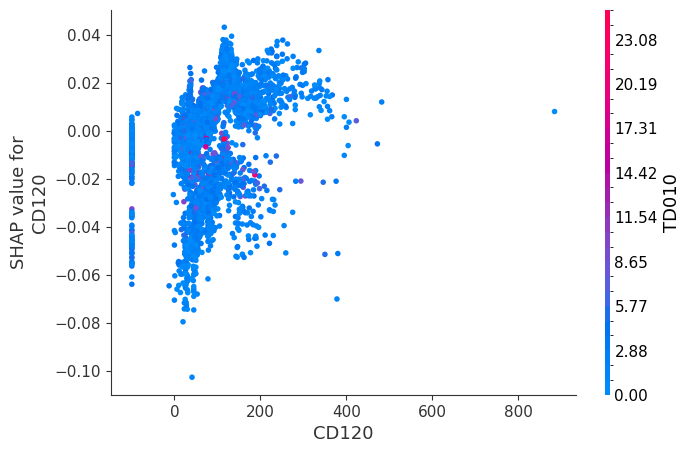

In [77]:
shap.dependence_plot("CD120", shap_values[0], X_train_smpl)


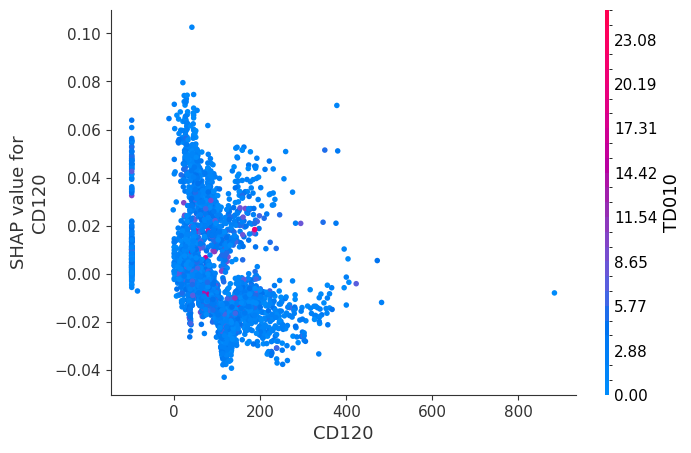

In [78]:
shap.dependence_plot("CD120", shap_values[1], X_train_smpl)


It looks like there is a relationship between CD120 and the target variable. And it interacts with TD014 frequently.

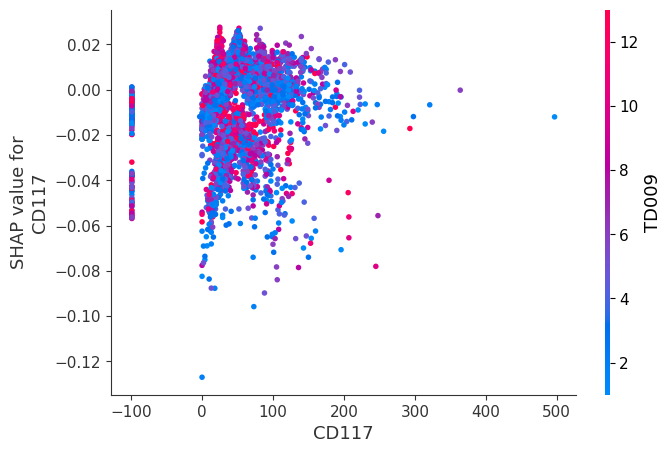

In [79]:
shap.dependence_plot("CD117", shap_values[0], X_train_smpl)


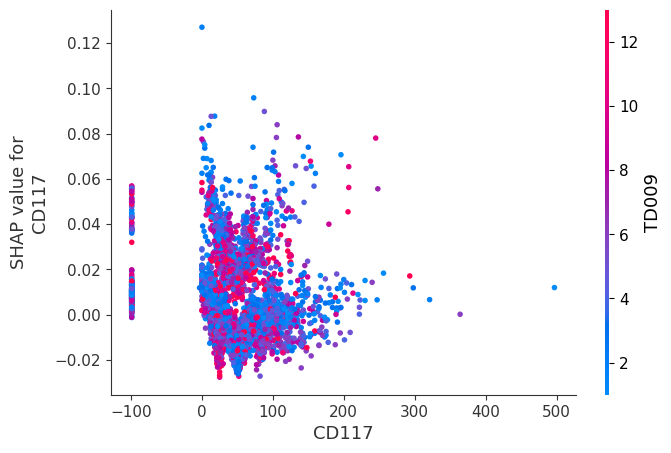

In [80]:
shap.dependence_plot("CD117", shap_values[1], X_train_smpl)


It looks like there is a relationship between CD117 and the target variable. And it interacts with TD010 frequently.

### Individual SHAP Value Plot for first 4 observations<a class="anchor" id="653"></a>

In [81]:
X_train_smpl.mean()

TD013      6.710417
AP003      1.983750
TD009      5.335833
TD005      3.608750
MB005      5.982285
TD014      2.568958
CR015      4.915000
CD123    112.115562
TD010      1.999167
PA028    -37.954143
CD120     83.167662
CD114      0.752917
AP007      3.315417
AP001     31.659792
CD117     47.772390
CD113     -1.010578
CR019      6.177708
TD001      2.016042
PA029    -44.296973
CR004      2.512292
dtype: float64

In [82]:
y_test_smpl.mean()

0.171875

In [83]:
import shap

In [84]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train_smpl.iloc[0,:])


the prediction for this observation is 0.90. The features that push the prediction higher are shown in red, and those that push it lower are shown in blue. AP003 has a positive impact on loan_default. A lower than the average AP003 drives the prediction to the left. TD013 has a negative impact on loan_default. A lower than the average drives the prediction to the right.

In [85]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train_smpl.iloc[1,:])


the prediction for this observation is 0.90. AP003 has a positive impact on loan_default. A lower than the average AP003 drives the prediction to the left. TD013 has a negative impact on loan_default. A lower than the average drives the prediction to the right.

In [86]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train_smpl.iloc[2,:])


the prediction for this observation is 0.90. AP003 has a negative impact on loan_default. A higher than the average AP003 drives the prediction to the left. TD013 has a positive impact on loan_default. A higher than the average drives the prediction to the right.

In [87]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train_smpl.iloc[3,:])


the prediction for this observation is 0.90. AP003 has a positive impact on loan_default. A lower than the average AP003 drives the prediction to the left. TD013 has a negative impact on loan_default. A lower than the average drives the prediction to the right.

# Section 7 GBM <a class="anchor" id="7"></a>

## Base GBM model <a class="anchor" id="71"></a>
use all the default values for the hyperpamaters

### Model with small sample <a class="anchor" id="711"></a>

In [88]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [89]:
from h2o.estimators import H2OGradientBoostingEstimator
gbm_v1 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        seed=1234)
gbm_v1.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          17171                  5            5            5             8             32            22.62

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.10778084294142473
RMSE: 0.32829992832991106
MAE: 0.2509065604034307
RMSLE: 0.2267732635906097
Mean Residual Deviance: 0.10778084294142473

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-15 00:03:29  0.026 sec   0.0                0.3982709483051578   0.31723949652777744  0.1586197482638897
     2023-12-15 00:03:29  0.161 sec   1.0                0.3948330578702386   0.3143693873162071   0.15589314358716316
     2023-12-15 00:03:29  0.183 sec   2.0                0.3915038640461642   0.31148549006320536  0.15327527556307743
     2023-12-15 00:03:29  0.202 sec   3.0                0.3884121876051725   0.30872064947771527  0.15086402748023572
     2023-12-15 00:03:29  0.229 sec   4.0                0.3859474246004619   0.30637440825502077  0.1489554145557292
     2023-12-15 00:03:29  0.252 sec   5.0                0.3832834403746253   0.3038974000203113   0.14690619566540894
     2023-12-15 00:03:29  0.265 sec   6.0                0.3806391786900595   0.30146301961193483  0.144886184353843
     2023-12-15 00:03:29  0.283 sec   7.0                0.3784224091709509   0.29932854054650915  0.14320351976274656
     2023-12-15 00:03:29  0.312 sec   8.0                0.3761717256838891   0.29717216685103875  0.14150516720399514
     2023-12-15 00:03:29  0.335 sec   9.0                0.37460362474812015  0.29559996371933567  0.1403278756744304
---  ---                  ---         ---                ---                  ---                  ---
     2023-12-15 00:03:29  0.651 sec   41.0               0.3349621758305373   0.25690704595142355  0.11219965923712777
     2023-12-15 00:03:29  0.658 sec   42.0               0.3348090302423695   0.256767406790071    0.1120970867318359
     2023-12-15 00:03:29  0.672 sec   43.0               0.3341074074922589   0.2561559951046729   0.11162775974119835
     2023-12-15 00:03:29  0.681 sec   44.0               0.3336882878384832   0.2556731784142054   0.11134787344057841
     2023-12-15 00:03:29  0.689 sec   45.0               0.3328935637677032   0.25495539113378984  0.11081812479796187
     2023-12-15 00:03:29  0.700 sec   46.0               0.3324673280105448   0.2546409698246407   0.11053452419447117
     2023-12-15 00:03:29  0.708 sec   47.0               0.3312438110962781   0.25359690863898626  0.10972246238958676
     2023-12-15 00:03:29  0.715 sec   48.0               0.3308506125812769   0.2531847931929466   0.1094621278454062
     2023-12-15 00:03:29  0.724 sec   49.0               0.32917569631650806  0.2516218588057563   0.10835663904545792
     2023-12-15 00:03:29  0.736 sec   50.0               0.32829992832991106  0.2509065604034307   0.10778084294142473
[51 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance     percentage
-------------  ---------------------  --------------------  ----------------------
TD009          58.94766616821289      1.0                   0.04588346594018491
AP005          55.21927261352539      0.9367507859590545    0.042981372781993724
MB005          52.241546630859375     0.8862360467636334    0.0406635814666433
AP003          47.29359436035156      0.8022

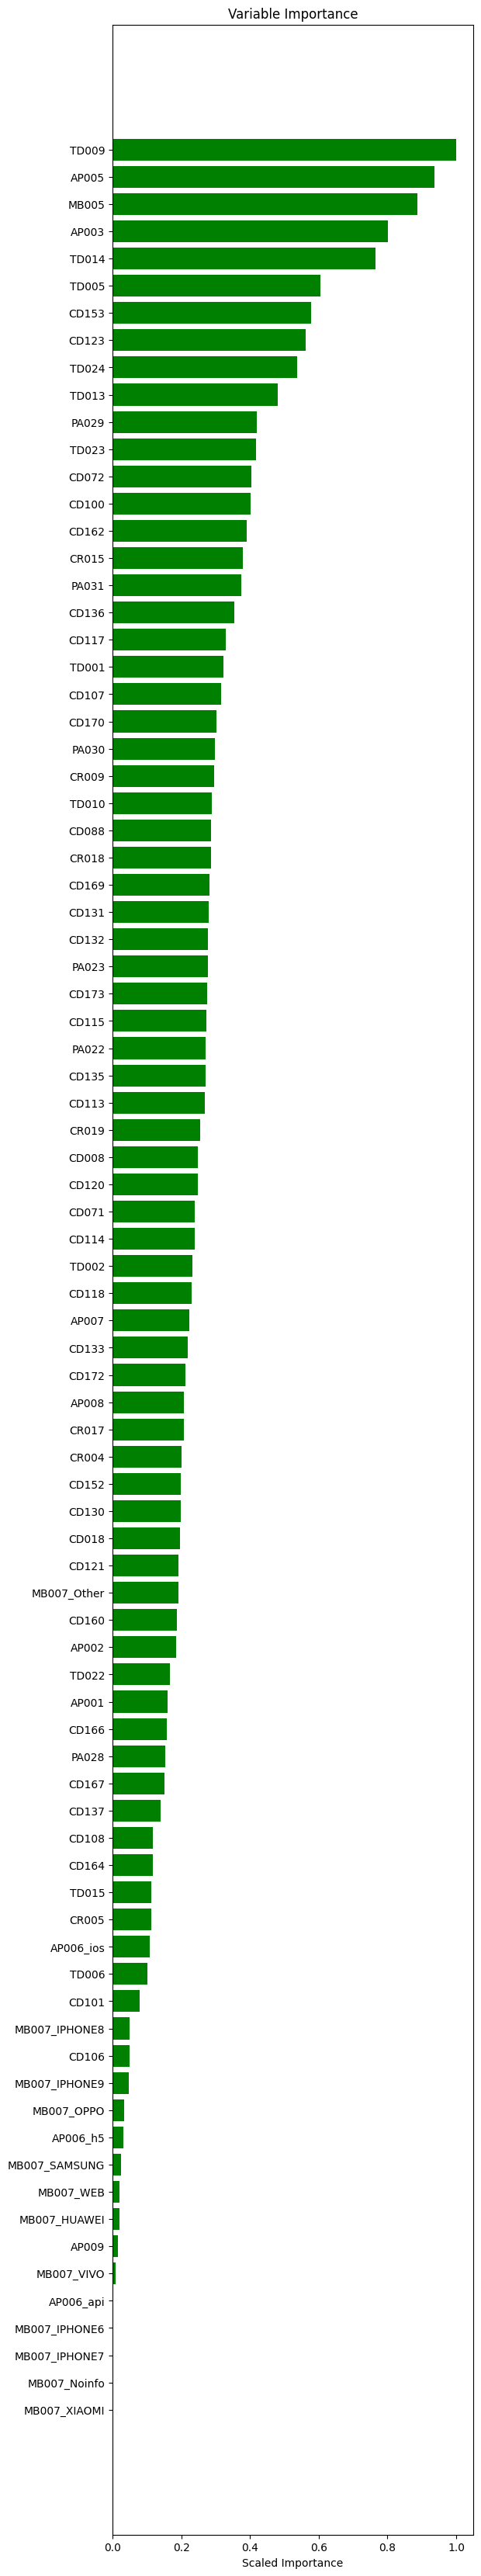

In [90]:
VarImp(gbm_v1)

In [91]:
# Make predictions on test_hex
predictions = gbm_v1.predict(test_hex)
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.142190
1             0  0.059150
2             0  0.055381
3             0  0.410451
4             0  0.371697

In [94]:
# create gains table
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)

    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']


    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)


In [95]:
createGains(gbm_v1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


count  actual  non_actual  cum_count  cum_actual  cum_non_actual  \
decile                                                                     
0         320     106         214        320         106             214   
1         320      73         247        640         179             461   
2         320      68         252        960         247             713   
3         320      64         256       1280         311             969   
4         320      48         272       1600         359            1241   
5         320      50         270       1920         409            1511   
6         320      42         278       2240         451            1789   
7         320      44         276       2560         495            2065   
8         320      36         284       2880         531            2349   
9         320      19         301       3200         550            2650   

        percent_cum_actual  percent_cum_non_actual  if_random  lift   K_S  \
decile                                                                      
0                     0.19                    0.08       55.0  1.93  11.0   
1                     0.33                    0.17      110.0  1.63  16.0   
2                     0.45                    0.27      165.0  1.50  18.0   
3                     0.57                    0.37      220.0  1.41  20.0   
4                     0.65                    0.47      275.0  1.31  18.0   
5                     0.74                    0.57      330.0  1.24  17.0   
6                     0.82                    0.68      385.0  1.17  14.0   
7                     0.90                    0.78      440.0  1.12  12.0   
8                     0.97                    0.89      495.0  1.07   8.0   
9                     1.00                    1.00      550.0  1.00   0.0   

         gain  
decile         
0       33.12  
1       27.97  
2       25.73  
3       24.30  
4       22.44  
5       21.30  
6       20.13  
7       19.34  
8       18.44  
9       17.19

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



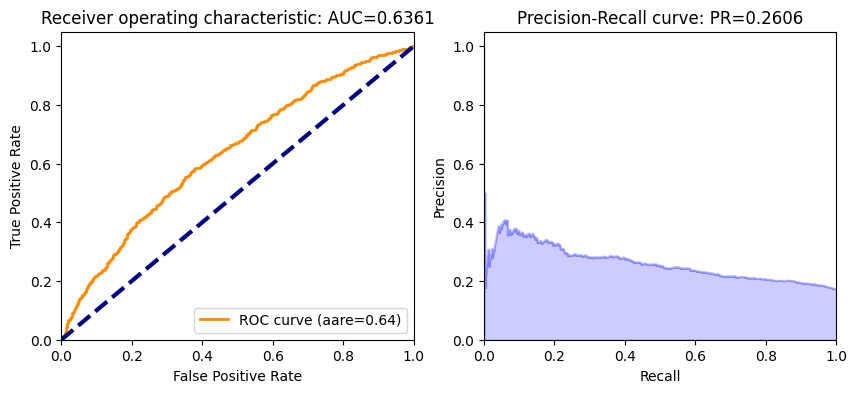

In [96]:
ROC_AUC(gbm_v1,test_hex,'loan_default')

performs fine within the small dataset, we can model with the entire dataset

### Model with entire dataset <a class="anchor" id="712"></a>

In [97]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

gbm_v2 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v2',
        seed=1234)

gbm_v2.train(predictors,target,training_frame=train_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21466                  5            5            5             18            32            29.48

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.13876487557318182
RMSE: 0.37251157777065375
MAE: 0.2863097814841878
RMSLE: 0.26032300048157775
Mean Residual Deviance: 0.13876487557318182

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-15 00:07:29  0.031 sec   0.0                0.39534825046952826  0.31260047829860177  0.15630023914931687
     2023-12-15 00:07:29  0.058 sec   1.0                0.3935800806189707   0.31113210002239794  0.15490527986003547
     2023-12-15 00:07:29  0.079 sec   2.0                0.39208420401905164  0.3097851953723778   0.15373002304125333
     2023-12-15 00:07:29  0.097 sec   3.0                0.39075885594160237  0.3085278236089895   0.15269248349678996
     2023-12-15 00:07:29  0.116 sec   4.0                0.3896330825104524   0.3073779027344038   0.151813938986597
     2023-12-15 00:07:29  0.139 sec   5.0                0.38863603548426395  0.30631522482602547  0.15103796807692607
     2023-12-15 00:07:29  0.157 sec   6.0                0.3877480853452986   0.30531346617235494  0.15034857768894497
     2023-12-15 00:07:29  0.178 sec   7.0                0.38691012965797034  0.3043701222199015   0.1496994484319474
     2023-12-15 00:07:29  0.199 sec   8.0                0.3861627804757629   0.30348611237310497  0.14912169302477227
     2023-12-15 00:07:29  0.219 sec   9.0                0.385477669158123    0.30265075537360586  0.1485930334195793
---  ---                  ---         ---                ---                  ---                  ---
     2023-12-15 00:07:30  0.916 sec   41.0               0.3741735231944205   0.2883895350581515   0.14000582545972554
     2023-12-15 00:07:30  0.938 sec   42.0               0.3739219122956798   0.28809723250438884  0.13981759649485806
     2023-12-15 00:07:30  0.963 sec   43.0               0.37376234085712573  0.2878589200082315   0.13969828744299823
     2023-12-15 00:07:30  0.984 sec   44.0               0.37357256005604506  0.28762730416458     0.1395564576268274
     2023-12-15 00:07:30  1.002 sec   45.0               0.3733855631980971   0.2873573805850101   0.1394167788047602
     2023-12-15 00:07:30  1.021 sec   46.0               0.37326591894350725  0.28720480811021604  0.13932744624474092
     2023-12-15 00:07:30  1.041 sec   47.0               0.3730888179608315   0.2869761872322282   0.13919526608741045
     2023-12-15 00:07:30  1.060 sec   48.0               0.37288131064033936  0.2867790700620444   0.13904047182485726
     2023-12-15 00:07:30  1.079 sec   49.0               0.3727098957410148   0.28656184230203324  0.13891266638327815
     2023-12-15 00:07:30  1.104 sec   50.0               0.37251157777065375  0.2863097814841878   0.13876487557318182
[51 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance      percentage
-------------  ---------------------  ---------------------  ----------------------
TD013          669.1065063476562      1.0                    0.15100713008234556
AP003          501.0087585449219      0.7487728093987571     0.11307003303100145
MB005          192.71957397460938     0.28802525778231725    0.043493867568935494
CR015          173.68362426757812   

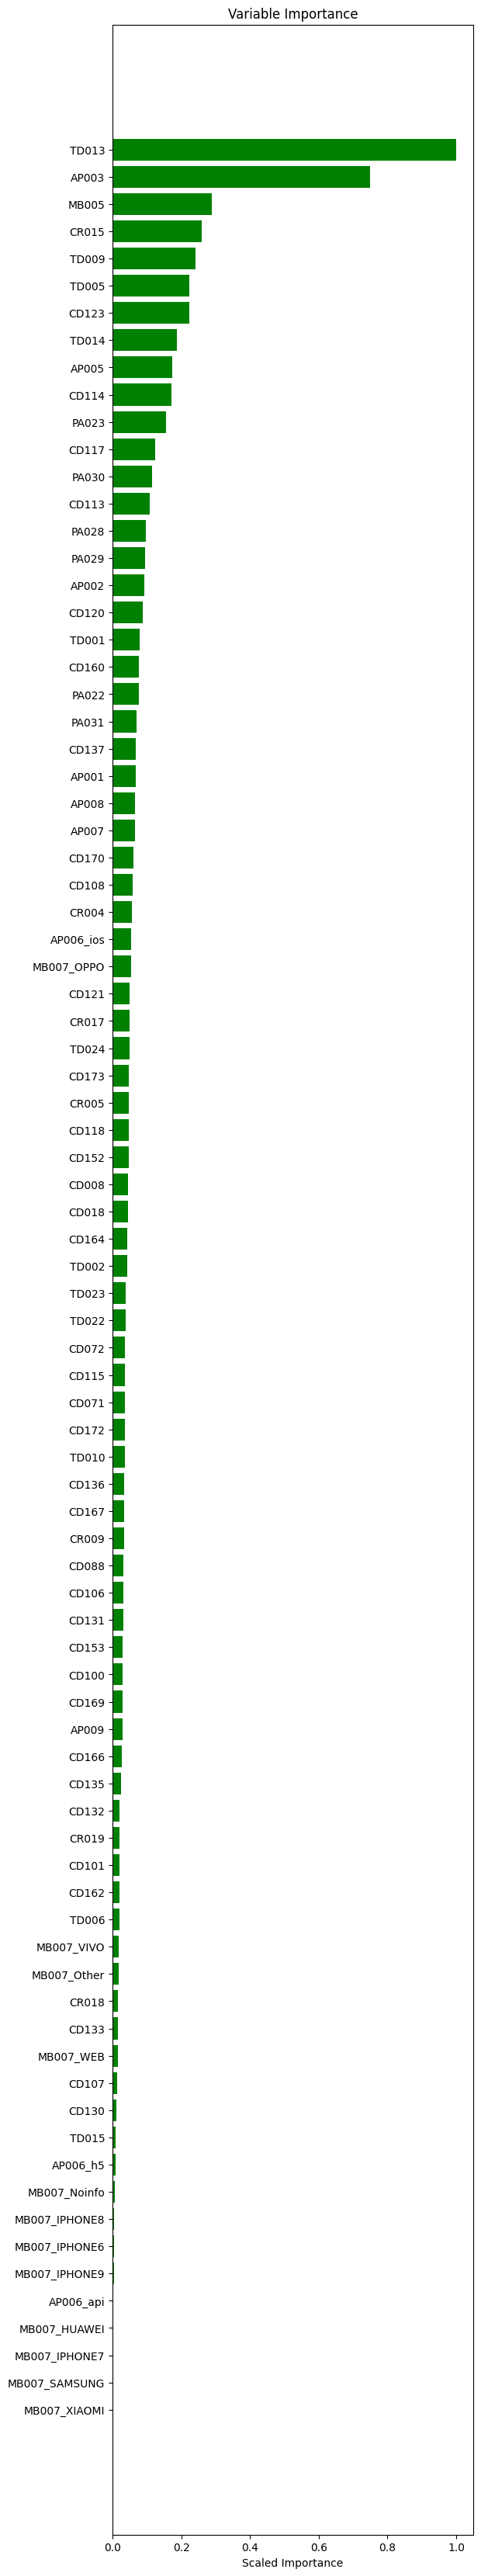

In [98]:
VarImp(gbm_v2)

In [99]:
# Make predictions on test_h2o
predictions2 = gbm_v2.predict(test_h2o)
test_scores2 = test_h2o['loan_default'].cbind(predictions2).as_data_frame()
test_scores2.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.239871
1             0  0.177200
2             0  0.200216
3             0  0.203328
4             0  0.288872

In [100]:
createGains(gbm_v2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


count  actual  non_actual  cum_count  cum_actual  cum_non_actual  \
decile                                                                     
0         320     106         214        320         106             214   
1         320      90         230        640         196             444   
2         320      75         245        960         271             689   
3         320      56         264       1280         327             953   
4         320      52         268       1600         379            1221   
5         320      49         271       1920         428            1492   
6         320      44         276       2240         472            1768   
7         320      41         279       2560         513            2047   
8         320      24         296       2880         537            2343   
9         320      13         307       3200         550            2650   

        percent_cum_actual  percent_cum_non_actual  if_random  lift   K_S  \
decile                                                                      
0                     0.19                    0.08       55.0  1.93  11.0   
1                     0.36                    0.17      110.0  1.78  19.0   
2                     0.49                    0.26      165.0  1.64  23.0   
3                     0.59                    0.36      220.0  1.49  23.0   
4                     0.69                    0.46      275.0  1.38  23.0   
5                     0.78                    0.56      330.0  1.30  22.0   
6                     0.86                    0.67      385.0  1.23  19.0   
7                     0.93                    0.77      440.0  1.17  16.0   
8                     0.98                    0.88      495.0  1.08  10.0   
9                     1.00                    1.00      550.0  1.00   0.0   

         gain  
decile         
0       33.12  
1       30.63  
2       28.23  
3       25.55  
4       23.69  
5       22.29  
6       21.07  
7       20.04  
8       18.65  
9       17.19

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



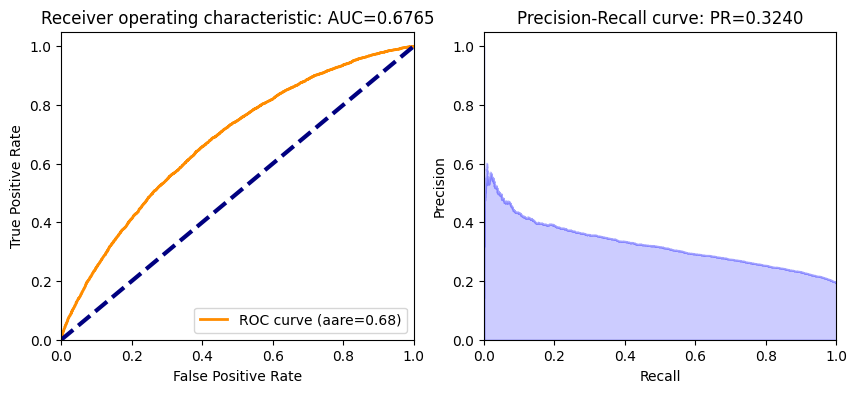

In [101]:
ROC_AUC(gbm_v2,test_h2o,'loan_default')

## Tune hyper-parameters in GBM model <a class="anchor" id="72"></a>

In the base model, the number of trees is 50, we can tune it to 300.  
Specify the minimum number of observations for a leaf.  
Specify the number of folds for cross-validation.  


### Model with small sample <a class="anchor" id="721"></a>

In [102]:
gbm_v3 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v3',
        ntrees = 300,
        min_rows=100,
        nfolds = 10,
        seed=1234)
gbm_v3.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         65032                  5            5            5             6             23            12.5033

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.07648347828990781
RMSE: 0.27655646492155594
MAE: 0.20864211335320307
RMSLE: 0.19097465396817045
Mean Residual Deviance: 0.07648347828990781

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1608589080322941
RMSE: 0.4010721980295993
MAE: 0.30487298286753467
RMSLE: 0.2853959217795793
Mean Residual Deviance: 0.1608589080322941

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.304719   0.0115978   0.310778      0.305648      0.311373      0.32444       0.29332       0.291698      0.294565      0.290373      0.314779      0.310217
mean_residual_deviance  0.160672   0.0116061   0.168059      0.163537      0.161445      0.179858      0.15024       0.151789      0.14932       0.143392      0.171583      0.167497
mse                     0.160672   0.0116061   0.168059      0.163537      0.161445      0.179858      0.15024       0.151789      0.14932       0.143392      0.171583      0.167497
r2                      -0.017682  0.0429143   0.0170512     0.0563666     -0.0586666    -0.0528654    -0.0246099    0.0173795     -0.034995     0.00324992    -0.0878181    -0.0119126
residual_deviance       0.160672   0.0116061   0.168059      0.163537      0.161445      0.179858      0.15024       0.151789      0.14932       0.143392      0.171583      0.167497
rmse                    0.400603   0.014483    0.409949      0.404397      0.401802      0.424097      0.387608      0.389601      0.386419      0.378672      0.414226      0.409264
rmsle                   0.285167   0.00900808  0.288365      0.283152      0.288884      0.300575      0.278808      0.277305      0.277462      0.271866      0.295365      0.289886

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-15 00:07:46  13.747 sec  0.0                0.3982709483051578   0.31723949652777744  0.1586197482638897
     2023-12-15 00:07:46  13.754 sec  1.0                0.39576387807586966  0.3151440228614956   0.15662904718965182
     2023-12-15 00:07:46  13.760 sec  2.0                0.39367089673999967  0.3132708797324449   0.15497677494007547
     2023-12-15 00:07:46  13.766 sec  3.0                0.3915249918427329   0.3112761069679012   0.15329181923745205
     2023-12-15 00:07:46  13.772 sec  4.0                0.3895585155432455   0.3094374465414633   0.15175583703225703
     2023-12-15 00:07:46  13.779 sec  5.0                0.38770999757909164  0.30770042101542155  0.15031904222277923
     2023-12-15 00:07:46  13.786 sec  6.0                0.3861694077754017   0.3061556307661037   0.14912681150160448
     2023-12-15 00:07:46  13.796 sec  7.0                0.3844827613726047   0.3044639350970586   0.14782699379270325
     2023-12-15 00:07:46  13.802 sec  8.0                0.3832375015360802   0.3031387423444539   0.1468709

In [103]:
# Make predictions on test_h2o
predictions3 = gbm_v3.predict(test_hex)
test_scores3 = test_hex['loan_default'].cbind(predictions3).as_data_frame()
test_scores3.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.151418
1             0  0.071032
2             0  0.112575
3             0  0.450676
4             0  0.314942

### Model with entire dataset <a class="anchor" id="722"></a>

In [104]:
gbm_v4 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v4',
        ntrees = 300,
        min_rows=100,
        nfolds = 10,
        seed=1234)
gbm_v4.train(predictors,target,training_frame=train_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         90594                  5            5            5             6             32            19.27

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.12561536481652297
RMSE: 0.3544225794394637
MAE: 0.26910352567169266
RMSLE: 0.24704298212481568
Mean Residual Deviance: 0.12561536481652297

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.14754062896153478
RMSE: 0.38411017815404835
MAE: 0.291817653705417
RMSLE: 0.27015077593671416
Mean Residual Deviance: 0.14754062896153478

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.291824   0.00239793  0.288686      0.297008      0.291318      0.290786      0.292549      0.291271      0.294463      0.289654      0.290733      0.291768
mean_residual_deviance  0.147545   0.00202447  0.144769      0.151465      0.147345      0.146057      0.147637      0.147121      0.150385      0.14592       0.146822      0.147929
mse                     0.147545   0.00202447  0.144769      0.151465      0.147345      0.146057      0.147637      0.147121      0.150385      0.14592       0.146822      0.147929
r2                      0.0559581  0.0055007   0.0579102     0.0537954     0.0635356     0.0535639     0.0484733     0.0549829     0.056868      0.0472166     0.0627151     0.0605198
residual_deviance       0.147545   0.00202447  0.144769      0.151465      0.147345      0.146057      0.147637      0.147121      0.150385      0.14592       0.146822      0.147929
rmse                    0.384108   0.0026289   0.380485      0.389185      0.383856      0.382174      0.384235      0.383563      0.387795      0.381995      0.383174      0.384616
rmsle                   0.270149   0.00158959  0.267999      0.273446      0.269498      0.269274      0.27065       0.269659      0.272144      0.26964       0.268997      0.270177

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-12-15 00:08:38  50.340 sec  0.0                0.39534825046952826  0.31260047829860177  0.15630023914931687
     2023-12-15 00:08:38  50.371 sec  1.0                0.3935814008785922   0.3111331940504412   0.15490631911755512
     2023-12-15 00:08:38  50.397 sec  2.0                0.39208833778181845  0.3097900715349242   0.15373326462450934
     2023-12-15 00:08:38  50.415 sec  3.0                0.39077503312069795  0.3085399865899235   0.15270512651048257
     2023-12-15 00:08:38  50.433 sec  4.0                0.3896584965773958   0.30739714988569417  0.15183374395495638
     2023-12-15 00:08:38  50.450 sec  5.0                0.38867100731381915  0.30634085593496757  0.15106515192633888
     2023-12-15 00:08:38  50.468 sec  6.0                0.3877787970562905   0.3053452829727903   0.15037239544642372
     2023-12-15 00:08:38  50.491 sec  7.0                0.38694065160734925  0.3044032856929116   0.14972306786632003
     2023-12-15 00:08:38  50.513 sec  8.0                0.38619820696936286  0.30350565527736517  0.14914905

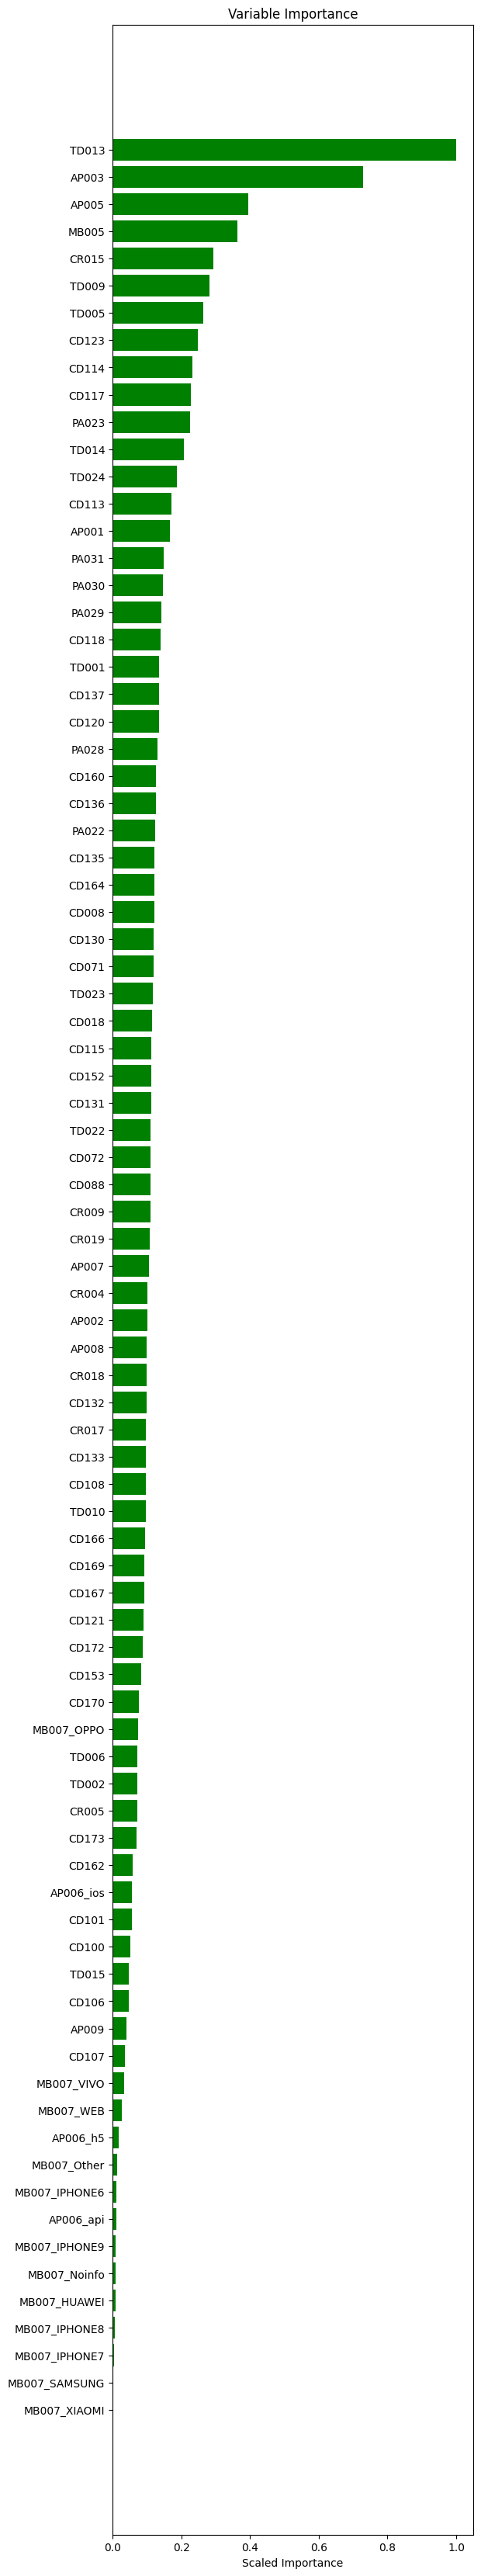

In [105]:
VarImp(gbm_v4)

In [106]:
# Make predictions on test_h2o
predictions4 = gbm_v4.predict(test_h2o)
test_scores4 = test_h2o['loan_default'].cbind(predictions4).as_data_frame()
test_scores4.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.291096
1             0  0.172666
2             0  0.270815
3             0  0.262002
4             0  0.278544

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



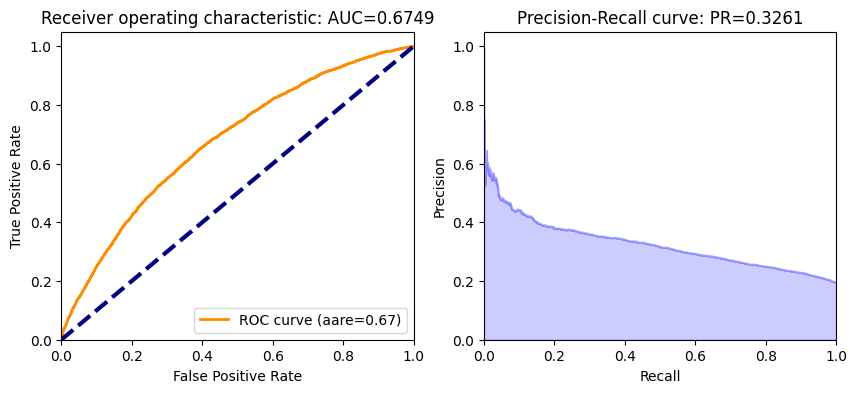

In [107]:
ROC_AUC(gbm_v4,test_h2o,'loan_default')

The variable importance plot of gbm_v4's top 10 variables closely resembles that of the base model (gbm_v2). Moreover, gbm_v4 exhibits slightly improved performance with higher AUC and PR scores compared to gbm_v2.






## Use Grid-search to find the optimal hyper-parameters <a class="anchor" id="73"></a>

we will only use the small sample to do the grid search

In [108]:
from h2o.grid.grid_search import H2OGridSearch
# Define the hyperparameter grid for grid search
hyper_params = {
    'ntrees': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_rows': [10, 50, 100]
    }


# Initialize the GBM model
gbm_v5 = H2OGradientBoostingEstimator(model_id='gbm_v5', seed=1234)

# Create the grid search object with the GBM model and the hyperparameter grid
grid = H2OGridSearch(model=gbm_v5, hyper_params=hyper_params)

# Train the grid search on the training data
grid.train(x=predictors, y=target, training_frame=train_hex)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     max_depth    min_rows    ntrees    model_ids                                                                                              residual_deviance
---  -----------  ----------  --------  -----------------------------------------------------------------------------------------------------  ---------------------
     7.0          10.0        500.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_21  0.0017912588343582387
     7.0          10.0        300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_12  0.008717498919885488
     5.0          10.0        500.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_20  0.019081873105392146
     7.0          50.0        500.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_24  0.019764347940067435
     7.0          50.0        300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_15  0.038061318453944525
     5.0          10.0        300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_11  0.039449631354181565
     7.0          100.0       500.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_27  0.039747405558805855
     5.0          50.0        500.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_23  0.04108039315783654
     7.0          10.0        100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_3   0.04997735470645488
     7.0          100.0       300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_18  0.05846955840295984
---  ---          ---         ---       ---                                                                                                    ---
     3.0          100.0       500.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_25  0.09406041445064633
     7.0          100.0       100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_9   0.0973010217755623
     3.0          10.0        300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_10  0.09808494126865012
     5.0          50.0        100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_5   0.10250471007626494
     3.0          50.0        300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_13  0.10311247745870779
     3.0          100.0       300.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_16  0.10866292047875954
     5.0          100.0       100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_8   0.11055354486537221
     3.0          10.0        100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_1   0.12591264475195213
     3.0          50.0        100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_4   0.12874238332106164
     3.0          100.0       100.0     Grid_GBM_Key_Frame__upload_8c34b2b79a533956717a102ce6274ecc.hex_model_python_1702616085898_2_model_7   0.13057209340954923
[27 rows x 6 columns]

In [109]:
# Get the best model from grid search
best_model = grid.get_grid()[0]
print(best_model.summary())


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    500                500                         329693                 7            7            7             9             90            47.68


In [110]:
predictions5 = best_model.predict(test_hex)
test_scores5 = test_hex['loan_default'].cbind(predictions5).as_data_frame()
test_scores5.head()


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.130748
1             0  0.084195
2             0  0.079959
3             0  0.476056
4             0  0.206920

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



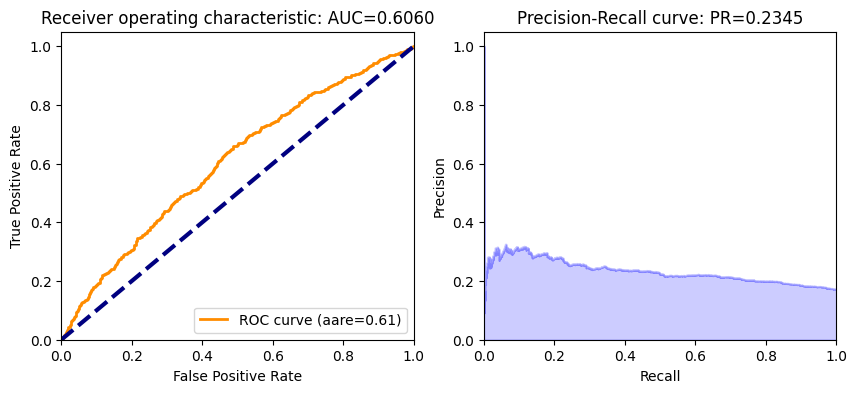

In [111]:
ROC_AUC(best_model, test_hex, 'loan_default')

# Section 8 Deep learning <a class="anchor" id="8"></a>

## Base Deep learning model <a class="anchor" id="81"></a>
use all the default values for the hyperpamaters

### Model with small sample <a class="anchor" id="811"></a>

In [112]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dl_modl = H2ODeepLearningEstimator(model_id='dl_modl', seed=1234)
dl_modl.train(predictors,target,training_frame=train_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_modl


Status of Neuron Layers: predicting loan_default, regression, gaussian distribution, Quadratic loss, 63,401 weights/biases, 760.8 KB, 48,000 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight             weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  --------------------  ----------  ----------------------  -------------------  -------------------  -----------------------
    1        114      Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.13561808056249375    0.3463892936706543    0.0         -0.008010689176645436   0.09423428773880005  0.45658838543018915  0.024499058723449707
    3        200      Rectifier  0.0        0.0   0.0   0.032056365963969435   0.0376686155796051    0.0         -0.021553992678413944   0.08213788270950317  0.8806196776227384   0.0921914279460907
    4        1        Linear                0.0   0.0   0.0006130828395544086  0.000207612756639719  0.0         -0.0011107296795671573  0.10055777430534363  0.22615787593247136  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.08994788634102271
RMSE: 0.29991313132475994
MAE: 0.20609028353477424
RMSLE: 0.20675946344656315
Mean Residual Deviance: 0.08994788634102271

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-12-15 00:09:42  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-12-15 00:09:43  1.656 sec   3537 obs/sec      1         1             4800       0.434877         0.189118             0.404313        -0.192274
    2023-12-15 00:09:44  2.635 sec   21267 obs/sec     10        10            48000      0.299913         0.0899479            0.20609         0.432934

Variable Importances: 
variable                   relative_importance    scaled_importance    percentage
-------------------------  ---------------------  -------------------  --------------------
AP003                      1.0                    1.0                  0.013606517754875229
AP005                      0.9947595596313477     0.9947595596313477   0.013535213609955795
AP002                      0.9184533357620239     0.9184533357620239   0.012496951620070359
CR004                      0.9094038605690002     0.9094038605690002   0.012373819775184178
MB005                      0.8774973154067993     0.8774973154067993   0.011939682801937964
CR015                      0.8313748836517334     0.8313748836517334   0.011312117115364638
PA028                      0.8244664669036865     0.8244664669036865   0.01121811762022426
MB007_IPHONE9.False        0.8200421929359436     0.8200421929359436   0.011157918657929734
CR005                      0.8195672035217285     0.8195672035217285   0.011151455706031838
MB007_OPPO.False           0.817848801612854      0.817848801612854    0.011128074239948726
---                        ---                    ---                  ---
MB007_IPHONE7.missing(NA)  0.0                    0.0                  0.0
MB007_IPHONE8.missing(NA)  0.0                    0.0                  0.0
MB007_IPHONE9.missing(NA)  0.0                    0.0                  0.0
MB007_Noinfo.missing(NA)   0.0                    0.0                  0.0
MB007_OPPO.missing(NA)     0.0                    0.0                  0.0
MB007_Other.missing(NA)    0.0                    0.0                  0.0
MB007_SAMSUNG.missing(NA)  0.0                    0.0     

In [113]:
predictions6 = dl_modl.predict(test_hex)
test_scores6 = test_hex['loan_default'].cbind(predictions6).as_data_frame()
test_scores6.head()


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.071025
1             0  0.126067
2             0  0.073864
3             0  0.424961
4             0  0.100624

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



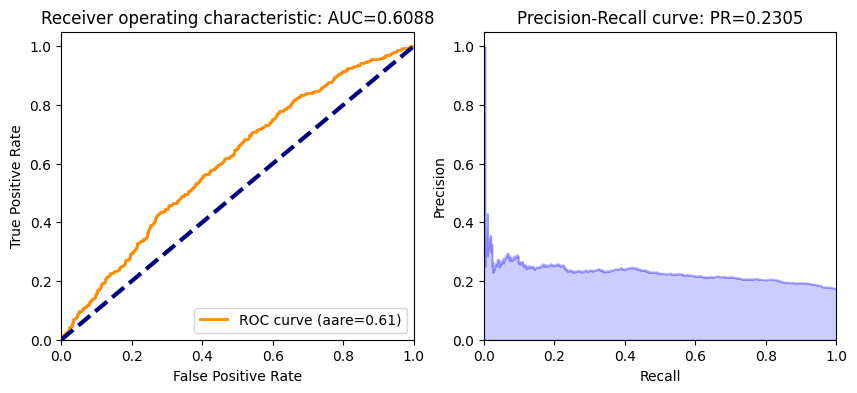

In [114]:
ROC_AUC(dl_modl, test_hex, 'loan_default')

### Model with entire dataset <a class="anchor" id="812"></a>

In [115]:
dl_mod2 = H2ODeepLearningEstimator(model_id='dl_mod2', seed=1234)
dl_mod2.train(predictors,target,training_frame=train_h2o)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_mod2


Status of Neuron Layers: predicting loan_default, regression, gaussian distribution, Quadratic loss, 63,401 weights/biases, 760.8 KB, 480,000 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        114      Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.13845354329295795    0.3449220657348633      0.0         -0.02239020255758726   0.1370851993560791   0.3971318532297281   0.055391937494277954
    3        200      Rectifier  0.0        0.0   0.0   0.029441417521601763   0.02807534486055374     0.0         -0.03321375944206984   0.09472766518592834  0.7558434473664626   0.14462703466415405
    4        1        Linear                0.0   0.0   0.0005706491002274561  0.00023135158699005842  0.0         0.0026460291651528678  0.07359910011291504  0.44905901163859263  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.13323776857779202
RMSE: 0.36501749078337603
MAE: 0.2639735053546381
RMSLE: 0.2547950609036758
Mean Residual Deviance: 0.13323776857779202

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-12-15 00:09:45  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-12-15 00:09:46  1.256 sec   51668 obs/sec     1         1             48000      0.378948         0.143602             0.289666        0.0574554
    2023-12-15 00:09:51  6.033 sec   84790 obs/sec     10        10            480000     0.365017         0.133238             0.263974        0.125481

Variable Importances: 
variable                   relative_importance    scaled_importance    percentage
-------------------------  ---------------------  -------------------  --------------------
AP003                      1.0                    1.0                  0.020630879613932927
AP002                      0.7688338756561279     0.7688338756561279   0.015861719131775052
CR015                      0.6856764554977417     0.6856764554977417   0.014146108407482146
MB007_OPPO.False           0.6420245170593262     0.6420245170593262   0.013245530520644385
CD106                      0.641127347946167      0.641127347946167    0.01322702113267746
CD113                      0.6301227807998657     0.6301227807998657   0.012999987232678676
AP009                      0.6301039457321167     0.6301039457321167   0.012999598648663426
AP005                      0.6131944060325623     0.6131944060325623   0.012650739970794899
CD114                      0.6121969819068909     0.6121969819068909   0.01263016223373414
CR004                      0.5993550419807434     0.5993550419807434   0.012365221717108433
---                        ---                    ---                  ---
MB007_IPHONE7.missing(NA)  0.0                    0.0                  0.0
MB007_IPHONE8.missing(NA)  0.0                    0.0                  0.0
MB007_IPHONE9.missing(NA)  0.0                    0.0                  0.0
MB007_Noinfo.missing(NA)   0.0                    0.0                  0.0
MB007_OPPO.missing(NA)     0.0                    0.0                  0.0
MB007_Other.missing(NA)    0.0                    0.0                  0.0
MB007_SAMSUNG.missing(NA)  0.0                    0.0 

In [116]:
predictions7 = dl_mod2.predict(test_h2o)
test_scores7 = test_h2o['loan_default'].cbind(predictions7).as_data_frame()
test_scores7.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.252758
1             0  0.131090
2             0  0.179376
3             0  0.271767
4             0  0.192337

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



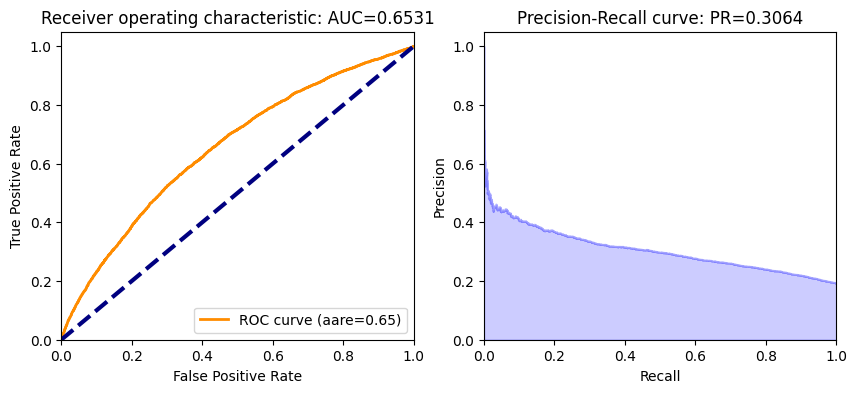

In [117]:
ROC_AUC(dl_mod2, test_h2o, 'loan_default')

## Use Grid-search to find the optimal hyper-parameters<a class="anchor" id="82"></a>

we will only use the small sample to do the grid search

In [118]:
hyper_params_dl = {
    'hidden': [[200,200], [300,300], [400,400]],
    'epochs': [30, 50, 100]
}

dl_mod3 = H2ODeepLearningEstimator(
    model_id='dl_mod3',
    distribution="tweedie",
    activation="RectifierWithDropout",
    seed=1234)

grid_dl = H2OGridSearch(model=dl_mod3, hyper_params=hyper_params_dl)
grid_dl.train(predictors, target, training_frame=train_hex)

# Get the best model from grid search
best_dl_model = grid_dl.get_grid()[0]


deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


In [119]:
print(best_dl_model.summary())


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 125,101 weights/biases, 1.5 MB, 480,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        114      Input             0.0
    2        300      RectifierDropout  50.0       0.0   0.0   0.1325583815603254     0.34799623489379883    0.0         -0.017541406208911165  0.10486134886741638  0.39513757567194224  0.03181679546833038
    3        300      RectifierDropout  50.0       0.0   0.0   0.0035869088608291673  0.009265042841434479   0.0         -0.03641095586452608   0.08631575107574463  0.26

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



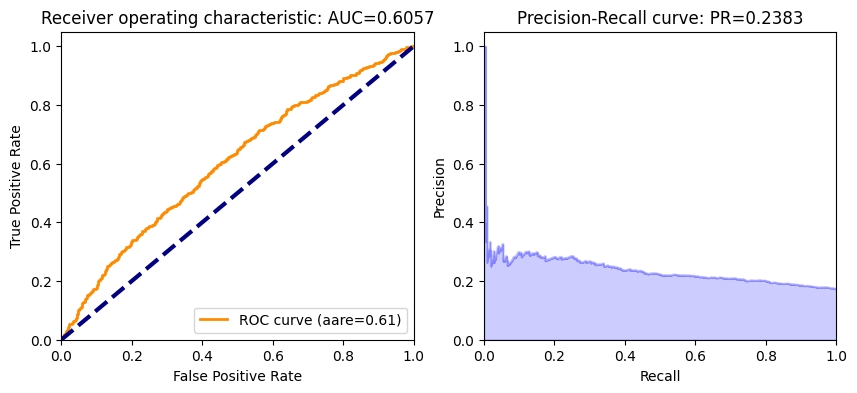

In [120]:
ROC_AUC(best_dl_model, test_hex, 'loan_default')

the best_dl_model with 2 hiiden layers exhibits slightly improved performance with higher AUC and PR scores compared to dl_mod1.

# Section 9 GLM <a class="anchor" id="9"></a>
GLM stands for Generalized Linear Model. It is a versatile statistical model used for various types of data analysis, including regression and classification tasks. The GLM framework extends the ordinary linear regression model to handle a broader range of data distributions and response variables.

## Base GLM model <a class="anchor" id="91"></a>
use all the default values for the hyperpamaters

### Model with small sample <a class="anchor" id="911"></a>

In [122]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [123]:
from h2o.estimators import H2OGeneralizedLinearEstimator
glm_1 = H2OGeneralizedLinearEstimator(
        model_id = 'glm_1',
        seed=1234)
glm_1.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_1


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.212E-4 )  99                            79                             2                       Key_Frame__upload_b8809b25bee85ca95b521c25cf041bd.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14664250716588728
RMSE: 0.38293929958400363
MAE: 0.29580062114029537
RMSLE: 0.2690298810095664
Mean Residual Deviance: 0.14664250716588728
R^2: 0.07550914201474845
Null degrees of freedom: 4799
Residual degrees of freedom: 4720
Null deviance: 761.3747916666488
Residual deviance: 703.8840343962589
AIC: 4568.973543523146

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  -------------------  -------------------  -------------------
    2023-12-15 00:17:57  0.000 sec   0             761.3747916666705          0.1586197482638897
    2023-12-15 00:17:57  0.152 sec   2                                                            0.38293929958400363  0.14664250716588728  0.29580062114029537  0.07550914201474845

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  --------------------
CD100                0.180695578455925      1.0                  0.0936755065263915
MB007_Other.True     0.10722078382968903    0.5933780159199754   0.055584986202928906
CD101                0.10324659198522568    0.5713841637271132   0.05352470095829595
CD114                0.09551845490932465    0.5286153414795558   0.049518309870718806
MB007_HUAWEI.True    0.06966456025838852    0.3855355003906806   0.03611523328300281
MB007_SAMSUNG.True   0.06800270825624466    0.3763385293505219   0.0352537023623074
CD106                0.06364241987466812    0.35220795339046823  0.032993258436475804
CD108                0.05544686317443848    0.3068523516083876   0.02874454946573009
MB007_OPPO.True      0.05328661948442459    0.2948971963772882   0.027624644243855218
AP003                0.050279099494218826   0.27825307029570084  0.026065497302473404
---                  ---                    ---                  ---
MB007_OPPO.False     0.0                    0.0                  0.0
MB007_Other.False    0.0                    0.0                  0.0
MB007_SAMSUNG.False  0.0                    0.0                  0.0
MB007_VIVO.False     0.0                    0.0                  0.0
MB007_XIAOMI.False   0.0                    0.0                  0.0
CR005                0.0                    0.0                  0.0
CD133                0.0                    0.0                  0.0
CD164                0.0                    0.0                  0.0
CD167                0.0                    0.0                  0.0
CD172                0.0                    0.0                  0.0
[99 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [124]:
# Make predictions on test_hex
predictions = glm_1.predict(test_hex)
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.112153
1             0  0.109989
2             0  0.053878
3             0  0.237892
4             0  0.099090

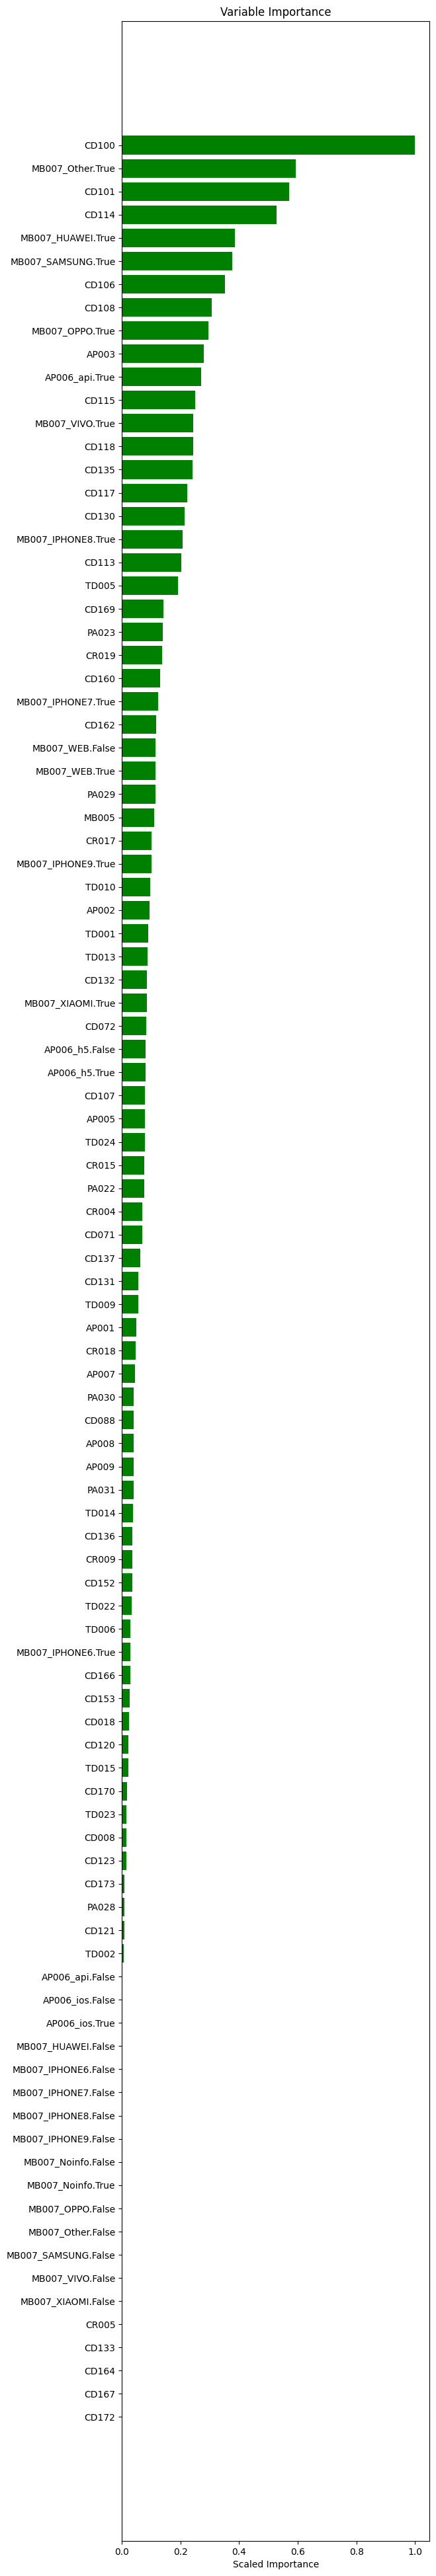

In [125]:
VarImp(glm_1)

In [126]:
createGains(glm_1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


count  actual  non_actual  cum_count  cum_actual  cum_non_actual  \
decile                                                                     
0         320      99         221        320          99             221   
1         320      79         241        640         178             462   
2         320      78         242        960         256             704   
3         320      76         244       1280         332             948   
4         320      51         269       1600         383            1217   
5         320      48         272       1920         431            1489   
6         320      38         282       2240         469            1771   
7         320      33         287       2560         502            2058   
8         320      29         291       2880         531            2349   
9         320      19         301       3200         550            2650   

        percent_cum_actual  percent_cum_non_actual  if_random  lift   K_S  \
decile                                                                      
0                     0.18                    0.08       55.0  1.80  10.0   
1                     0.32                    0.17      110.0  1.62  15.0   
2                     0.47                    0.27      165.0  1.55  20.0   
3                     0.60                    0.36      220.0  1.51  24.0   
4                     0.70                    0.46      275.0  1.39  24.0   
5                     0.78                    0.56      330.0  1.31  22.0   
6                     0.85                    0.67      385.0  1.22  18.0   
7                     0.91                    0.78      440.0  1.14  13.0   
8                     0.97                    0.89      495.0  1.07   8.0   
9                     1.00                    1.00      550.0  1.00   0.0   

         gain  
decile         
0       30.94  
1       27.81  
2       26.67  
3       25.94  
4       23.94  
5       22.45  
6       20.94  
7       19.61  
8       18.44  
9       17.19

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



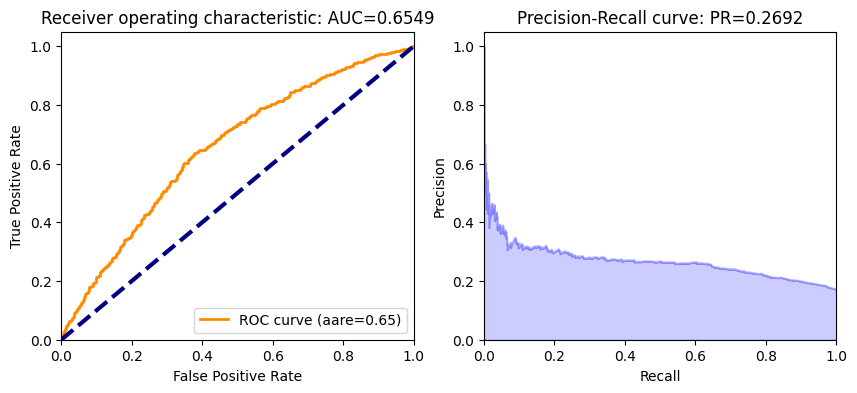

In [127]:
ROC_AUC(glm_1,test_hex,'loan_default')

performs fine within the small dataset, we can model with the entire dataset

### Model with entire dataset <a class="anchor" id="912"></a>

In [129]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

glm_2 = H2OGeneralizedLinearEstimator(
        model_id = 'glm_2',
        seed=1234)

glm_2.train(predictors,target,training_frame=train_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_2


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.15E-4 )  99                            80                             2                       Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14678784576831602
RMSE: 0.3831290197418045
MAE: 0.2951394330116612
RMSLE: 0.26904982530231547
Mean Residual Deviance: 0.14678784576831602
R^2: 0.06085974936930716
Null degrees of freedom: 47999
Residual degrees of freedom: 47919
Null deviance: 7502.4114791669235
Residual deviance: 7045.816596879169
AIC: 44281.28507293809

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  ------------------  -------------------
    2023-12-15 00:18:31  0.000 sec   0             7502.41147916721           0.15630023914931687
    2023-12-15 00:18:31  0.144 sec   2                                                             0.3831290197418045  0.14678784576831602  0.2951394330116612  0.06085974936930716

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  --------------------
CD107                0.05883520469069481    1.0                  0.06249655190567239
AP003                0.0492706261575222     0.8374344309082465   0.05233676437885444
CD114                0.04475925862789154    0.7607564019399176   0.04754465196141062
CD106                0.04238097742199898    0.7203336445381964   0.045018369005283554
MB007_OPPO.True      0.034384507685899734   0.5844206350035506   0.036524274550245414
CD117                0.033630650490522385   0.5716076058088619   0.03572350440611066
TD013                0.03055228665471077    0.5192858054174974   0.03245357229215351
CD108                0.02872973494231701    0.48830857465956623  0.03051760218219648
CD131                0.027472594752907753   0.46694143238449093  0.02918222946592635
CD136                0.026993166655302048   0.45879277206918945  0.028672966293569416
---                  ---                    ---                  ---
MB007_OPPO.False     0.0                    0.0                  0.0
MB007_Other.False    0.0                    0.0                  0.0
MB007_SAMSUNG.False  0.0                    0.0                  0.0
MB007_VIVO.False     0.0                    0.0                  0.0
MB007_WEB.False      0.0                    0.0                  0.0
MB007_WEB.True       0.0                    0.0                  0.0
MB007_XIAOMI.False   0.0                    0.0                  0.0
CD101                0.0                    0.0                  0.0
CD123                0.0                    0.0                  0.0
CD173                0.0                    0.0                  0.0
[99 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [130]:
# Make predictions on test_h2o
predictions2 = glm_2.predict(test_h2o)
test_scores2 = test_h2o['loan_default'].cbind(predictions2).as_data_frame()
test_scores2.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.279623
1             0  0.173637
2             0  0.294199
3             0  0.263762
4             0  0.193544

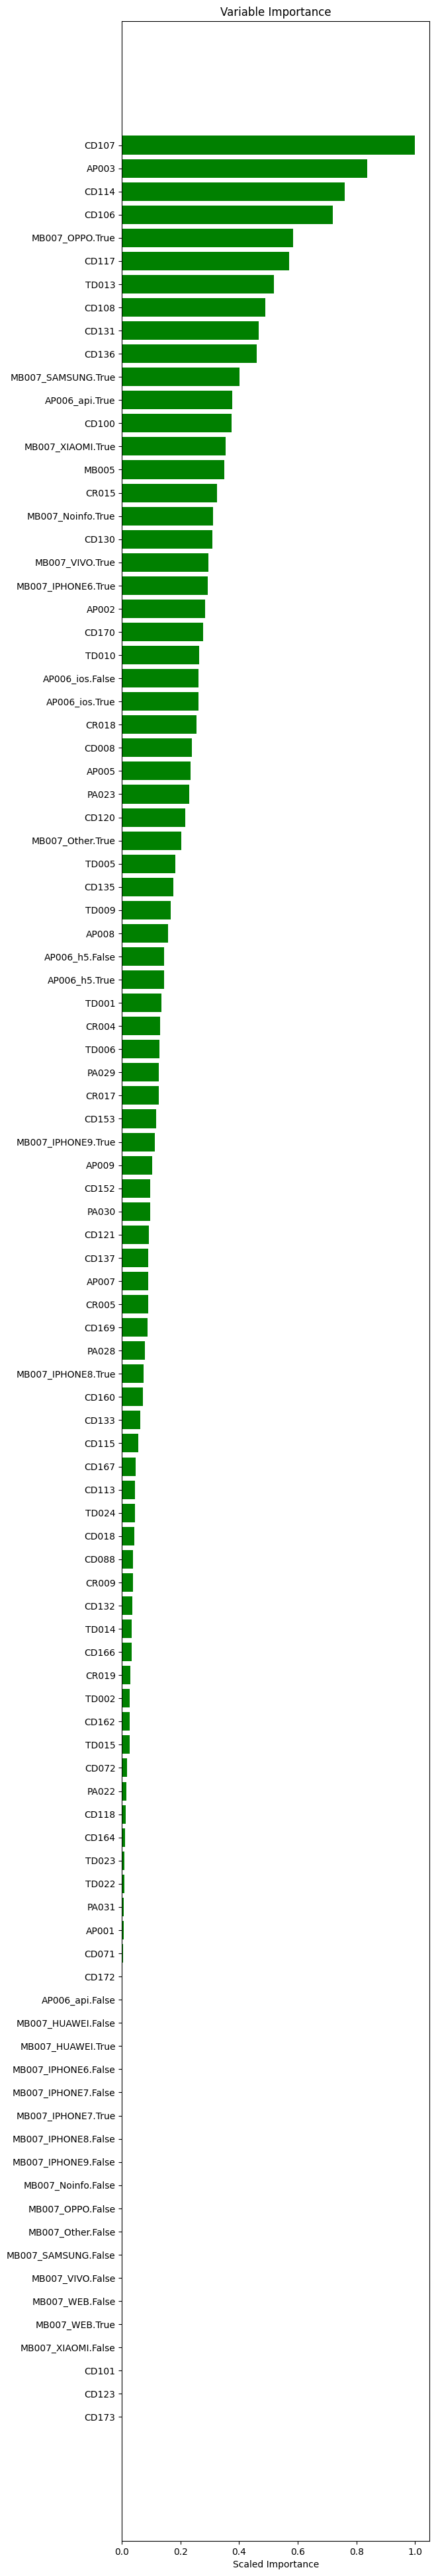

In [131]:
VarImp(glm_2)

In [132]:
createGains(glm_2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


count  actual  non_actual  cum_count  cum_actual  cum_non_actual  \
decile                                                                     
0         320     106         214        320         106             214   
1         320      93         227        640         199             441   
2         320      76         244        960         275             685   
3         320      70         250       1280         345             935   
4         320      50         270       1600         395            1205   
5         320      40         280       1920         435            1485   
6         320      40         280       2240         475            1765   
7         320      35         285       2560         510            2050   
8         320      24         296       2880         534            2346   
9         320      16         304       3200         550            2650   

        percent_cum_actual  percent_cum_non_actual  if_random  lift   K_S  \
decile                                                                      
0                     0.19                    0.08       55.0  1.93  11.0   
1                     0.36                    0.17      110.0  1.81  19.0   
2                     0.50                    0.26      165.0  1.67  24.0   
3                     0.63                    0.35      220.0  1.57  28.0   
4                     0.72                    0.45      275.0  1.44  27.0   
5                     0.79                    0.56      330.0  1.32  23.0   
6                     0.86                    0.67      385.0  1.23  19.0   
7                     0.93                    0.77      440.0  1.16  16.0   
8                     0.97                    0.89      495.0  1.08   8.0   
9                     1.00                    1.00      550.0  1.00   0.0   

         gain  
decile         
0       33.12  
1       31.09  
2       28.65  
3       26.95  
4       24.69  
5       22.66  
6       21.21  
7       19.92  
8       18.54  
9       17.19

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



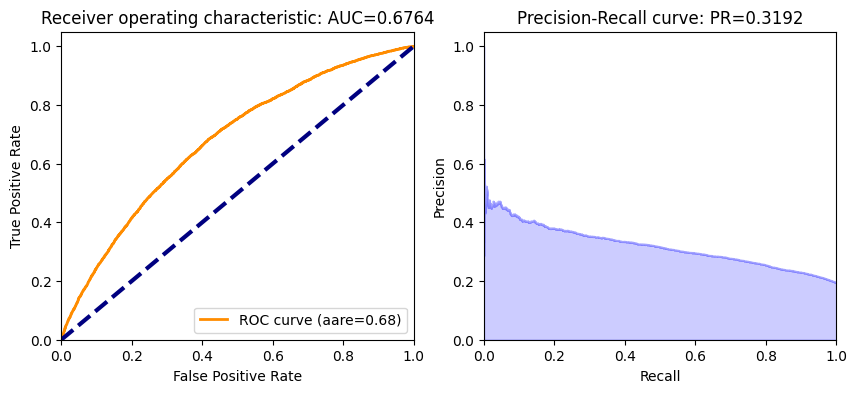

In [133]:
ROC_AUC(glm_2,test_h2o,'loan_default')

## GLM model with regularization <a class="anchor" id="92"></a>

In the base model, the number of trees is 50, we can tune it to 300.  
Specify the minimum number of observations for a leaf.  
Specify the number of folds for cross-validation.  


### Model with small sample <a class="anchor" id="921"></a>

In [134]:
glm_3 = H2OGeneralizedLinearEstimator(
    model_id = 'glm_3',
    lambda_search = True,
    seed = 1234)
glm_3.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_3


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2.378E-4 )  nlambda = 100, lambda.max = 0.1212, lambda.min = 2.378E-4, lambda.1se = -1.0  99                            82                             68                      Key_Frame__upload_b8809b25bee85ca95b521c25cf041bd.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14669815854318702
RMSE: 0.3830119561360807
MAE: 0.2959682592961392
RMSLE: 0.2690294762888914
Mean Residual Deviance: 0.14669815854318702
R^2: 0.07515829429301868
Null degrees of freedom: 4799
Residual degrees of freedom: 4717
Null deviance: 761.3747916666488
Residual deviance: 704.1511610072977
AIC: 4576.794815821671

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  ------------------  -------------------
     2023-12-15 00:18:48  0.000 sec   1            .12E0     1             0.1586197482638889   0.5
     2023-12-15 00:18:48  0.010 sec   2            .11E0     2             0.15802771440437097  0.5
     2023-12-15 00:18:48  0.011 sec   3            .1E0      3             0.15750528937929423  0.5
     2023-12-15 00:18:48  0.013 sec   4            .92E-1    4             0.15703256166162788  0.5
     2023-12-15 00:18:48  0.014 sec   5            .84E-1    4             0.15662588251462997  0.5
     2023-12-15 00:18:48  0.017 sec   6            .76E-1    4             0.1562861034468381   0.5
     2023-12-15 00:18:48  0.018 sec   7            .69E-1    5             0.1557980631317495   0.5
     2023-12-15 00:18:48  0.019 sec   8            .63E-1    6             0.15526776564864983  0.5
     2023-12-15 00:18:48  0.020 sec   9            .58E-1    6             0.1548097847384578   0.5
     2023-12-15 00:18:48  0.022 sec   10           .52E-1    7             0.15441686792615755  0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                 ---
     2023-12-15 00:18:48  0.129 sec   59           .55E-3    78            0.14681935802817947  0.5
     2023-12-15 00:18:48  0.129 sec   60           .5E-3     79            0.14679889262010679  0.5
     2023-12-15 00:18:48  0.130 sec   61           .46E-3    80            0.1467793556248667   0.5
     2023-12-15 00:18:48  0.131 sec   62           .42E-3    79            0.1467613875901065   0.5
     2023-12-15 00:18:48  0.132 sec   63           .38E-3    80            0.14674603795835262  0.5
     2023-12-15 00:18:48  0.133 sec   64           .35E-3    80            0.14673316505999498  0.5
     2023-12-15 00:18:48  0.135 sec   65           .31E-3    79            0.14672406656543707  0.5
     2023-12-15 00:18:48  0.136 sec   66           .29E-3    79            0.1467148825386622   0.5
     2023-12-15 00:18:48  0.139 sec   67           .26E-3    81            0.14670613145614425  0.5
     2023-12-15 00:18:48  0.141 sec   68           .24E-3    83            0.14669815854318655  0.5      68            0.3830119561360807  0.14669815854318702  0.295

In [135]:
# Make predictions on test_h2o
predictions3 = glm_3.predict(test_hex)
test_scores3 = test_hex['loan_default'].cbind(predictions3).as_data_frame()
test_scores3.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.112179
1             0  0.108328
2             0  0.055991
3             0  0.238391
4             0  0.095201

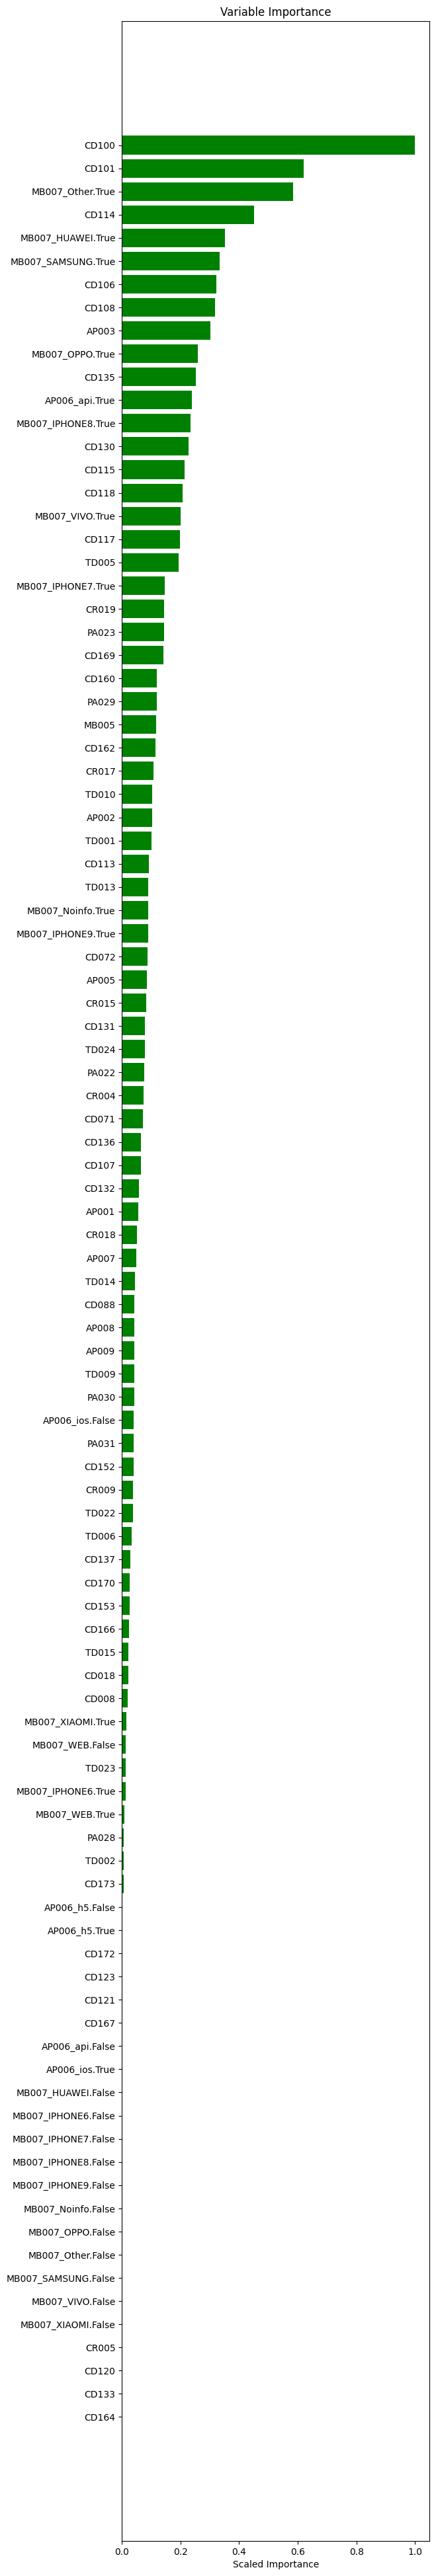

In [136]:
VarImp(glm_3)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



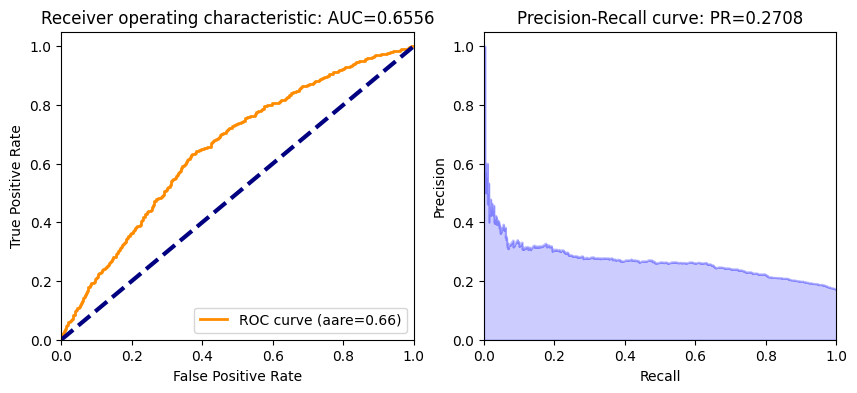

In [137]:
ROC_AUC(glm_3,test_hex,'loan_default')

### Model with entire dataset <a class="anchor" id="922"></a>

In [138]:
glm_4 = H2OGeneralizedLinearEstimator(
    model_id = 'glm_4',
    lambda_search = True,
    seed=1234)
glm_4.train(predictors,target,training_frame=train_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_4


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 3.275E-4 )  nlambda = 100, lambda.max = 0.115, lambda.min = 3.275E-4, lambda.1se = -1.0  99                            74                             64                      Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14682280971320769
RMSE: 0.3831746464906149
MAE: 0.29525746677789366
RMSLE: 0.26904587578339706
Mean Residual Deviance: 0.14682280971320769
R^2: 0.06063605204752465
Null degrees of freedom: 47999
Residual degrees of freedom: 47925
Null deviance: 7502.4114791669235
Residual deviance: 7047.494866233969
AIC: 44280.717010651526

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  -------------------  -------------------
     2023-12-15 00:18:58  0.000 sec   1            .11E0     1             0.15630023914930558  0.5
     2023-12-15 00:18:58  0.004 sec   2            .1E0      2             0.15576573139924388  0.5
     2023-12-15 00:18:58  0.007 sec   3            .95E-1    3             0.15530950829966716  0.5
     2023-12-15 00:18:58  0.010 sec   4            .87E-1    3             0.15490708428888197  0.5
     2023-12-15 00:18:58  0.013 sec   5            .79E-1    3             0.1545713262834979   0.5
     2023-12-15 00:18:58  0.016 sec   6            .72E-1    4             0.154191026571601    0.5
     2023-12-15 00:18:58  0.019 sec   7            .66E-1    4             0.15365422176610885  0.5
     2023-12-15 00:18:58  0.022 sec   8            .6E-1     4             0.15320400533175565  0.5
     2023-12-15 00:18:58  0.025 sec   9            .55E-1    5             0.15281013877412006  0.5
     2023-12-15 00:18:58  0.029 sec   10           .5E-1     6             0.15246066012330994  0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                  ---
     2023-12-15 00:18:58  0.293 sec   55           .76E-3    60            0.14692004968365155  0.5
     2023-12-15 00:18:58  0.306 sec   56           .69E-3    62            0.1469096280056034   0.5
     2023-12-15 00:18:58  0.319 sec   57           .63E-3    64            0.14690035436830504  0.5
     2023-12-15 00:18:58  0.333 sec   58           .57E-3    66            0.14688820032054414  0.5
     2023-12-15 00:18:58  0.346 sec   59           .52E-3    70            0.14687193583313335  0.5
     2023-12-15 00:18:58  0.360 sec   60           .48E-3    72            0.14685858838429655  0.5
     2023-12-15 00:18:58  0.375 sec   61           .43E-3    73            0.14684896672179776  0.5
     2023-12-15 00:18:58  0.378 sec   62           .39E-3    73            0.1468384387128425   0.5
     2023-12-15 00:18:58  0.392 sec   63           .36E-3    75            0.14683429947212584  0.5
     2023-12-15 00:18:58  0.394 sec   64           .33E-3    75            0.14682280971320769  0.5      64            0.3831746464906149  0.1468228097132076

In [139]:
# Make predictions on test_h2o
predictions4 = glm_4.predict(test_h2o)
test_scores4 = test_h2o['loan_default'].cbind(predictions4).as_data_frame()
test_scores4.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.283867
1             0  0.176418
2             0  0.291516
3             0  0.262172
4             0  0.193977

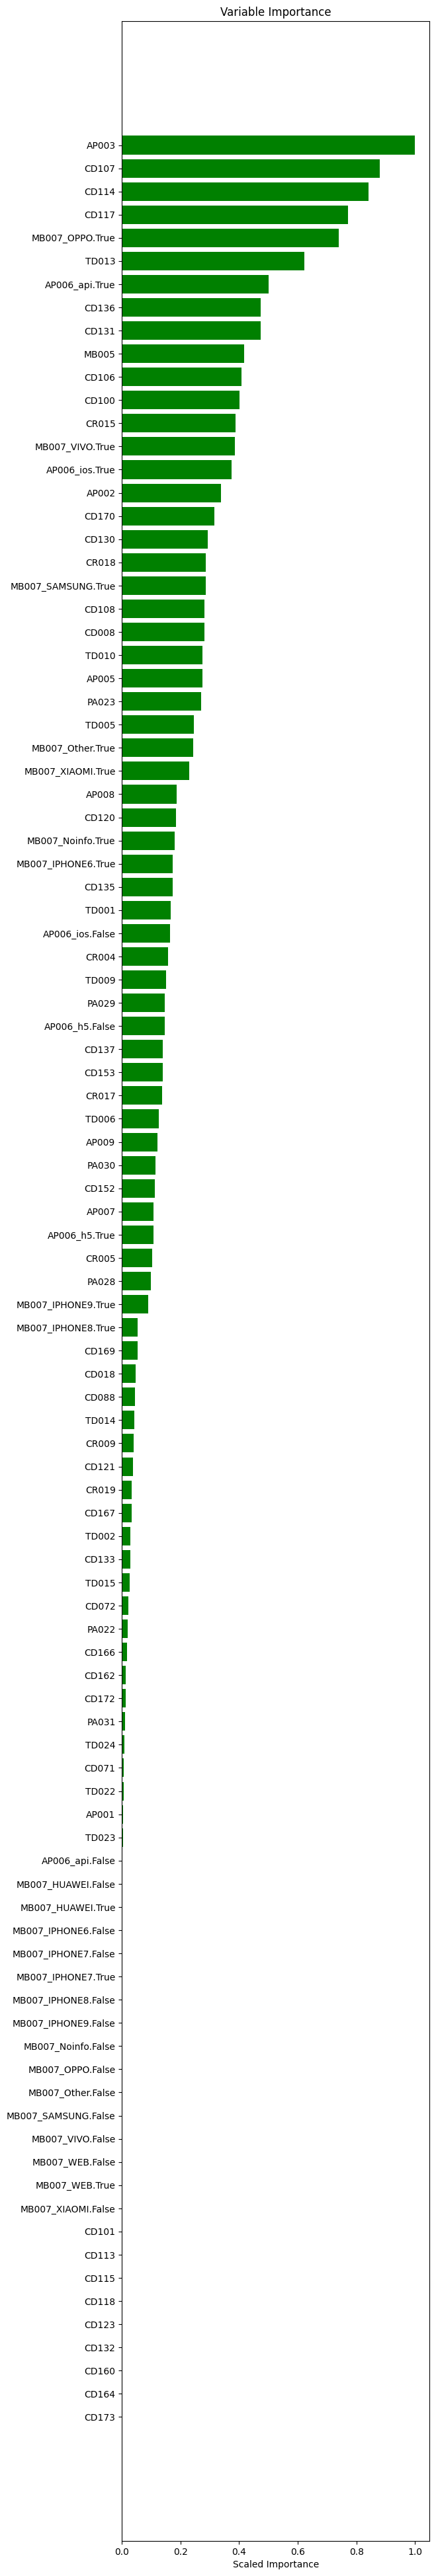

In [140]:
VarImp(glm_4)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



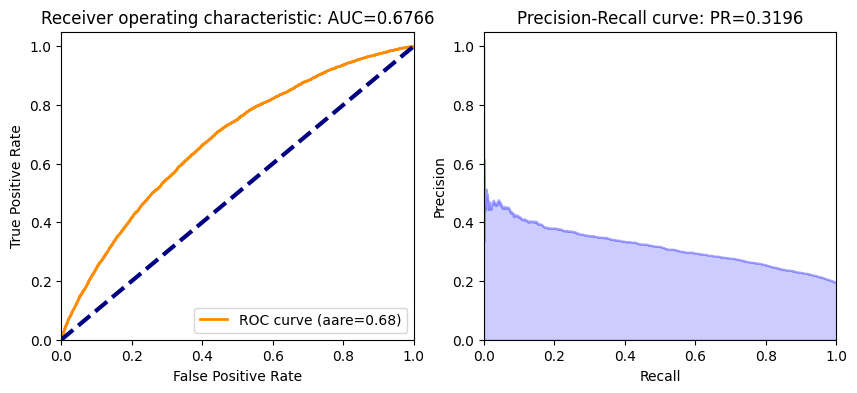

In [141]:
ROC_AUC(glm_4,test_h2o,'loan_default')

The variable importance plot of glm_4's top 10 variables closely resembles that of the base model (glm_2). Morever, glm_4 exhibits slightly imporved performance with lower AUC and PR scores compared to glm_2.






## Use Grid-search to find the optimal hyper-parameters <a class="anchor" id="93"></a>

### Model with entire dataset <a class="anchor" id="931"></a>

In [142]:
from h2o.grid.grid_search import H2OGridSearch
# Define the hyperparameter grid for grid search
glm_hyper_params = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9],
                     'lambda': [1e-1,1e-3,1e-5,1e-7,1e-9] }
grid_search_criteria = { 'strategy': "RandomDiscrete",
                    'seed': 1234,
                    'stopping_metric': "AUTO",
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }


# Create the grid search object with the GBM model and the hyperparameter grid
grid = H2OGridSearch(model=glm_4, hyper_params=glm_hyper_params, search_criteria=grid_search_criteria)

# Train the grid search on the training data
grid.train(x=predictors, y=target, training_frame=train_h2o)



glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    alpha    lambda    model_ids                                                                                              residual_deviance
--  -------  --------  -----------------------------------------------------------------------------------------------------  -------------------
    0.1      1e-09     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_3   7045.4
    0.3      1e-09     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_10  7045.4
    0.9      1e-09     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_7   7045.4
    0.7      1e-07     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_5   7045.4
    0.3      1e-07     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_1   7045.4
    0.1      1e-05     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_9   7045.5
    0.5      1e-05     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_4   7045.51
    0.7      1e-05     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_8   7045.51
    0.1      0.001     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_11  7046.54
    0.9      0.001     Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_6   7062.09
    0.9      0.1       Grid_GLM_Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex_model_python_1702616085898_4_model_2   7502.41

In [143]:
# Get the best model from grid search
best_model = grid.get_grid()[0]
print(best_model.summary())


GLM Model: summary
    family    link      regularization                               lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.1, lambda = 1.0E-9 )  nlambda = 100, lambda.max = 0.5749, lambda.min = 1.0E-9, lambda.1se = -1.0  99                            87                             1                       Key_Frame__upload_a7ccec9c7d62c447f66c225899c945d6.hex


In [144]:
predictions5 = best_model.predict(test_h2o)
test_scores5 = test_h2o['loan_default'].cbind(predictions5).as_data_frame()
test_scores5.head()


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.277175
1             0  0.173083
2             0  0.293950
3             0  0.262993
4             0  0.194572

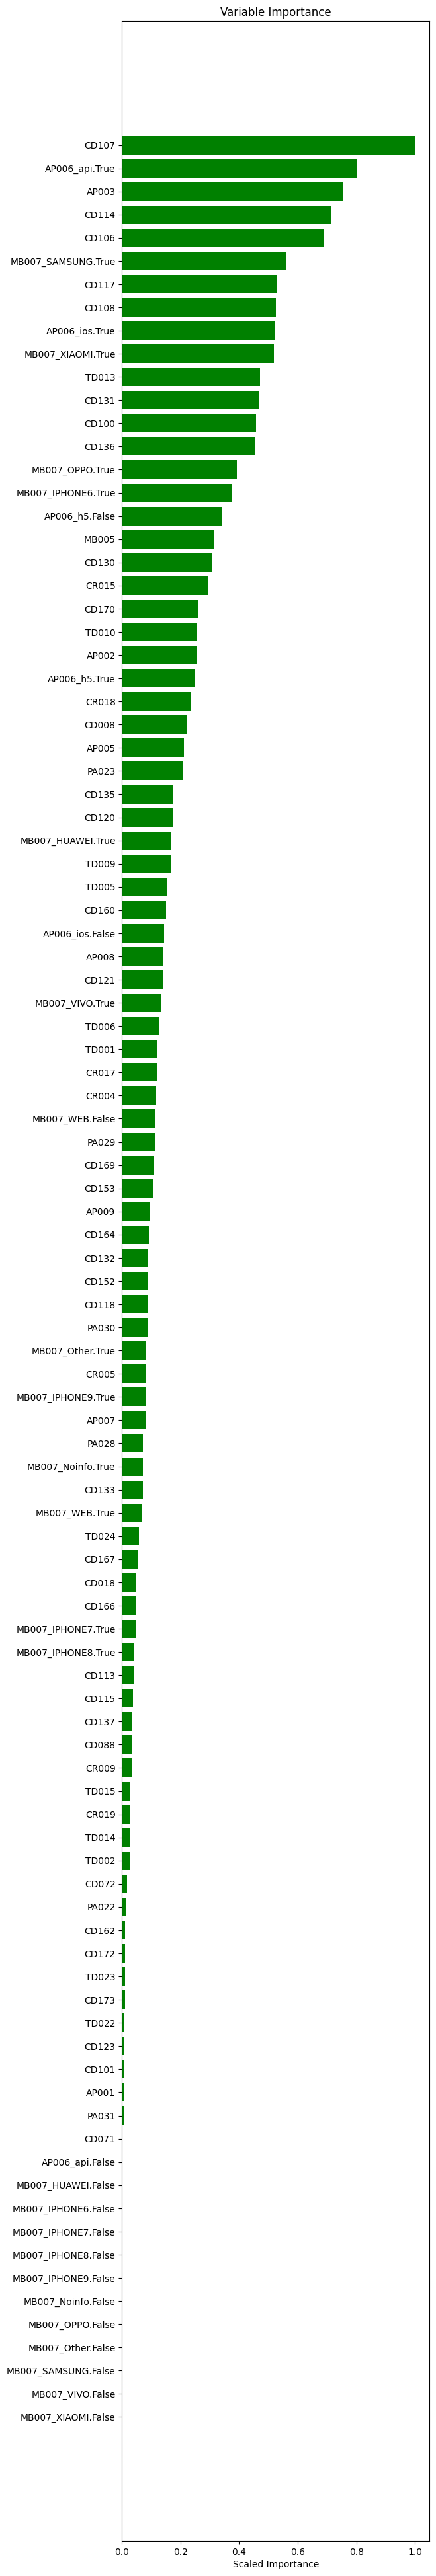

In [145]:
VarImp(best_model)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



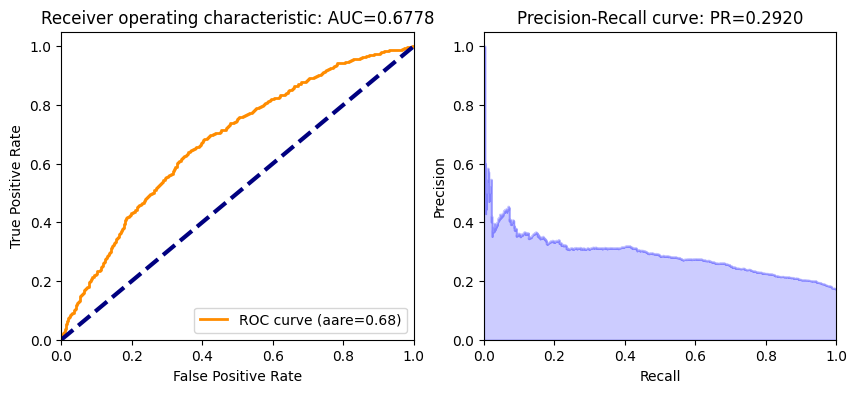

In [146]:
ROC_AUC(best_model, test_hex, 'loan_default')

The variable importance plot of glm_best_model's top 10 variables closely resembles that of the base model (glm_2) and the regularization model(glm_4). Moreover, glm_best_model exhibits the best performance with the highest AUC and PR scores compared to glm_2 and glm_4.


# Section 10 Automatic Machine Learning (AutoML) <a class="anchor" id="10"></a>

## Model with entire dataset <a class="anchor" id="101"></a>

In [147]:
from h2o.automl import H2OAutoML
aml_1 = H2OAutoML(max_models=25, seed=1234)
aml_1.train(predictors,target,training_frame=train_h2o)

AutoML progress: |
00:19:13.811: AutoML: XGBoost is not available; skipping it.
00:19:13.825: _train param, Dropping bad and constant columns: [TD029, TD028, TD027, TD026, TD025, CR012]
00:19:13.825: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
00:19:16.198: _train param, Dropping bad and constant columns: [TD029, TD028, TD027, TD026, TD025, CR012]
00:19:16.198: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
00:19:27.803: _train param, Dropping bad and constant columns: [TD029, TD028, TD027, TD026, TD025, CR012]
00:19:27.803: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a 

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231215_01913


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       15/25
# GBM base models (used / total)           11/12
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  2/10
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.1292367695478349
RMSE: 0.35949515928289616
MAE: 0.27655284790951445
RMSLE: 0.24999916473356074
Mean Residual Deviance: 0.1292367695478349
R^2: 0.1857518043961114
Null degrees of freedom: 9965
Residual degrees of freedom: 9950
Null deviance: 1581.9525249714106
Residual deviance: 1287.9736453137225
AIC: 7924.759213401484

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.14588392888681373
RMSE: 0.3819475472978112
MAE: 0.2928548012414267
RMSLE: 0.2678502854930217
Mean Residual Deviance: 0.14588392888681373
R^2: 0.06664295793265951
Null degrees of freedom: 47999
Residual degrees of freedom: 47983
Null deviance: 7502.451088011146
Residual deviance: 7002.428586567059
AIC: 43856.788095591764

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.29294    0.00108102  0.292508      0.294023      0.291763      0.292257      0.29415
mean_residual_deviance  0.145886   0.00122562  0.14572       0.145843      0.144694      0.145248      0.147924
mse                     0.145886   0.00122562  0.14572       0.145843      0.144694      0.145248      0.147924
null_deviance           1500.49    8.04709     1502.33       1493.53       1508.75       1490.74       1507.11
r2                      0.0666483  0.00301939  0.0666055     0.0656822     0.0701101     0.0686267     0.0622173
residual_deviance       1400.47    9.26619     1402.26       1395.43       1402.95       1388.43       1413.26
rmse                    0.381947   0.00160147  0.381733      0.381894      0.380387      0.381115      0.384608
rmsle                   0.267844   0.0010095   0.26762       0.26815       0.266778      0.26726       0.269411

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [148]:
# View the AutoML Leaderboard
lb = aml_1.leaderboard
lb.head(rows=lb.nrows)

model_id                                                    rmse       mse       mae       rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20231215_01913     0.381948  0.145884  0.292855    0.26785                   0.145884
StackedEnsemble_BestOfFamily_1_AutoML_1_20231215_01913  0.382202  0.146078  0.293499    0.268032                  0.146078
GBM_grid_1_AutoML_1_20231215_01913_model_3              0.383159  0.14681   0.295378    0.26858                   0.14681
GBM_grid_1_AutoML_1_20231215_01913_model_2              0.383388  0.146987  0.294007    0.269029                  0.146987
GBM_grid_1_AutoML_1_20231215_01913_model_5              0.383391  0.146989  0.294816    0.26889                   0.146989
GBM_5_AutoML_1_20231215_01913                           0.383552  0.147112  0.294715    0.269094                  0.147112
GBM_grid_1_AutoML_1_20231215_01913_model_6              0.383684  0.147213  0.294854    0.269153                  0.147213
GLM_1_AutoML_1_20231215_01913                           0.383801  0.147304  0.295745    0.269525                  0.147304
GBM_1_AutoML_1_20231215_01913                           0.383909  0.147386  0.293876    0.269504                  0.147386
GBM_2_AutoML_1_20231215_01913                           0.38397   0.147433  0.294319    0.269416                  0.147433
DeepLearning_1_AutoML_1_20231215_01913                  0.384012  0.147465  0.290067    0.269097                  0.147465
GBM_3_AutoML_1_20231215_01913                           0.384726  0.148014  0.295032    0.270054                  0.148014
GBM_grid_1_AutoML_1_20231215_01913_model_1              0.386192  0.149145  0.294878    0.271508                  0.149145
GBM_4_AutoML_1_20231215_01913                           0.38634   0.149259  0.295293    0.271467                  0.149259
GBM_grid_1_AutoML_1_20231215_01913_model_7              0.386403  0.149307  0.295923    0.271537                  0.149307
DeepLearning_grid_1_AutoML_1_20231215_01913_model_1     0.387114  0.149857  0.288958    0.270562                  0.149857
DeepLearning_grid_1_AutoML_1_20231215_01913_model_3     0.387278  0.149984  0.299559  nan                         0.149984
DeepLearning_grid_2_AutoML_1_20231215_01913_model_1     0.387384  0.150067  0.294589    0.270189                  0.150067
DeepLearning_grid_3_AutoML_1_20231215_01913_model_2     0.387972  0.150522  0.294197    0.270586                  0.150522
XRT_1_AutoML_1_20231215_01913                           0.388102  0.150623  0.30333     0.274822                  0.150623
DeepLearning_grid_2_AutoML_1_20231215_01913_model_2     0.388104  0.150625  0.301609    0.272274                  0.150625
DeepLearning_grid_3_AutoML_1_20231215_01913_model_1     0.388737  0.151117  0.302593    0.271809                  0.151117
DeepLearning_grid_1_AutoML_1_20231215_01913_model_2     0.388808  0.151171  0.288022    0.27201                   0.151171
DRF_1_AutoML_1_20231215_01913                           0.388954  0.151285  0.302314    0.275415                  0.151285
DeepLearning_grid_3_AutoML_1_20231215_01913_model_3     0.389118  0.151413  0.303267    0.272308                  0.151413
DeepLearning_grid_2_AutoML_1_20231215_01913_model_3     0.389281  0.151539  0.313331    0.274948                  0.151539
GBM_grid_1_AutoML_1_20231215_01913_model_4              0.391539  0.153303  0.298137    0.276298                  0.153303
[27 rows x 6 columns]

In [149]:
aml_best_model = aml_1.leader
print(aml_best_model)


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231215_01913


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       15/25
# GBM base models (used / total)           11/12
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  2/10
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.1292367695478349
RMSE: 0.35949515928289616
MAE: 0.27655284790951445
RMSLE: 0.24999916473356074
Mean Residual Deviance: 0.12923676954

we can see that the best model is the Stacked Ensemble with all models, meaning that this model was built using models of each trained algorithm. Let's explore the coefficients of the metalearner to see the models in the Stacked Ensemble with their relative importance.

In [150]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(aml_best_model.metalearner()['name'])
metalearner.varimp()


The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id


[('DeepLearning_1_AutoML_1_20231215_01913',
  0.02291741408407688,
  1.0,
  0.21379132787332616),
 ('GLM_1_AutoML_1_20231215_01913',
  0.015370877459645271,
  0.670707323402819,
  0.14339140928465308),
 ('GBM_grid_1_AutoML_1_20231215_01913_model_2',
  0.0150075638666749,
  0.6548541563902806,
  0.14000213965804487),
 ('GBM_1_AutoML_1_20231215_01913',
  0.013177427463233471,
  0.5749962633170382,
  0.1229292146567503),
 ('GBM_5_AutoML_1_20231215_01913',
  0.008359240368008614,
  0.364754956093264,
  0.0779814464115557),
 ('GBM_grid_1_AutoML_1_20231215_01913_model_5',
  0.007326001767069101,
  0.3196696512177279,
  0.06834259921464109),
 ('XRT_1_AutoML_1_20231215_01913',
  0.0055351038463413715,
  0.2415239270030551,
  0.05163572106716345),
 ('GBM_grid_1_AutoML_1_20231215_01913_model_1',
  0.0043018232099711895,
  0.18770979981376323,
  0.040130727357020675),
 ('GBM_2_AutoML_1_20231215_01913',
  0.003905641147866845,
  0.17042241910619843,
  0.03643483528009868),
 ('GBM_grid_1_AutoML_1_2

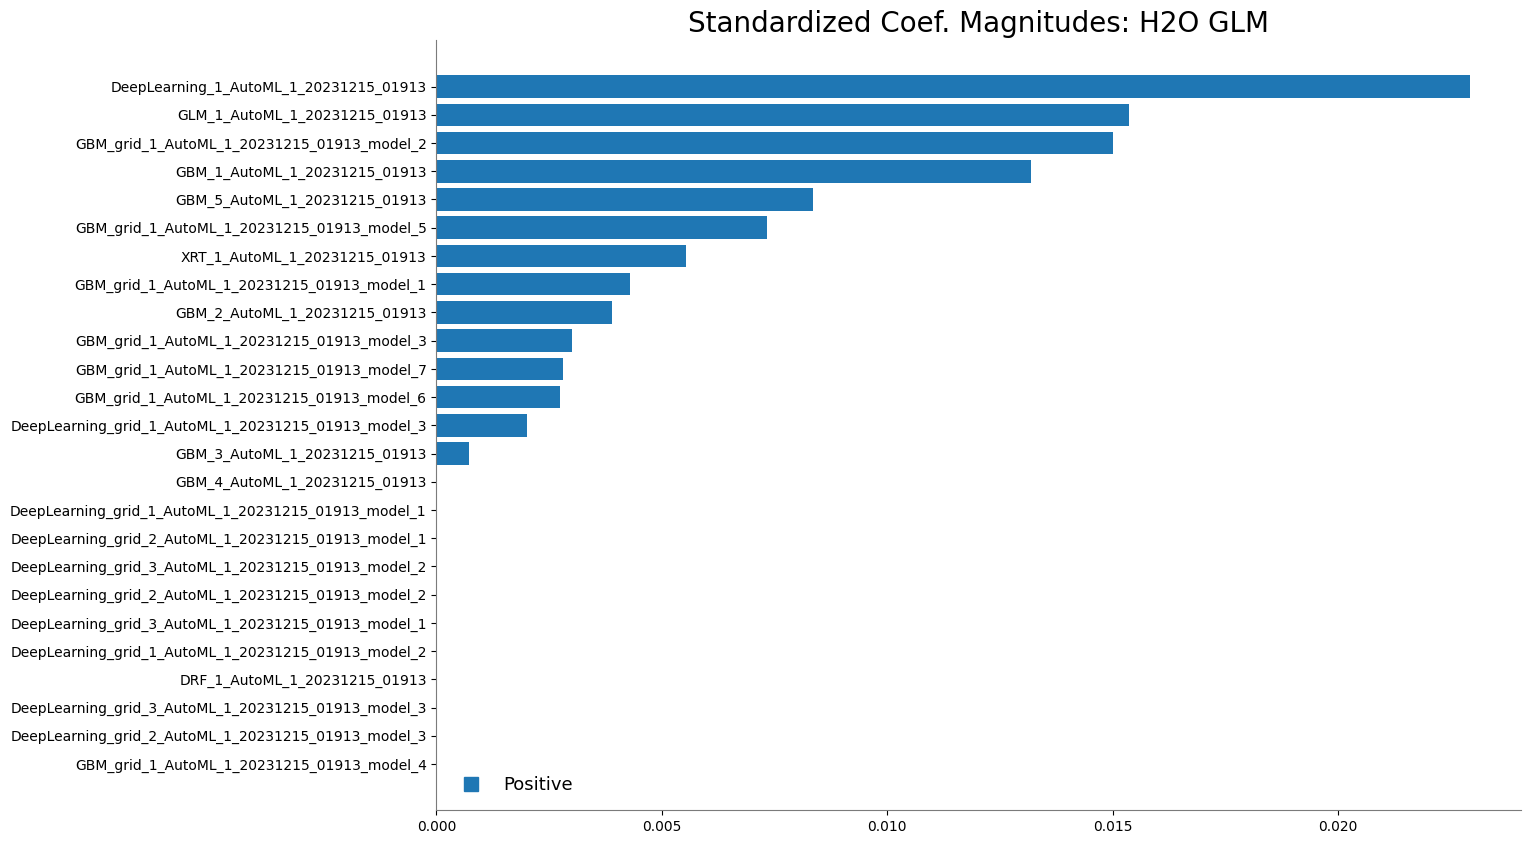

In [151]:
metalearner.std_coef_plot()


In [152]:
aml_best_model.model_performance(test_h2o)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1454430760833453
RMSE: 0.38136999892931445
MAE: 0.2944160383839269
RMSLE: 0.26810687806793354
Mean Residual Deviance: 0.1454430760833453
R^2: 0.06675677301901595
Null degrees of freedom: 31999
Residual degrees of freedom: 31984
Null deviance: 4987.118722222411
Residual deviance: 4654.17843466705
AIC: 29151.010170263453

In [153]:
predictions6 = aml_best_model.predict(test_h2o)
test_scores6 = test_h2o['loan_default'].cbind(predictions6).as_data_frame()
test_scores6.head()


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


loan_default   predict
0             0  0.284475
1             0  0.160090
2             0  0.261869
3             0  0.238778
4             0  0.249322

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



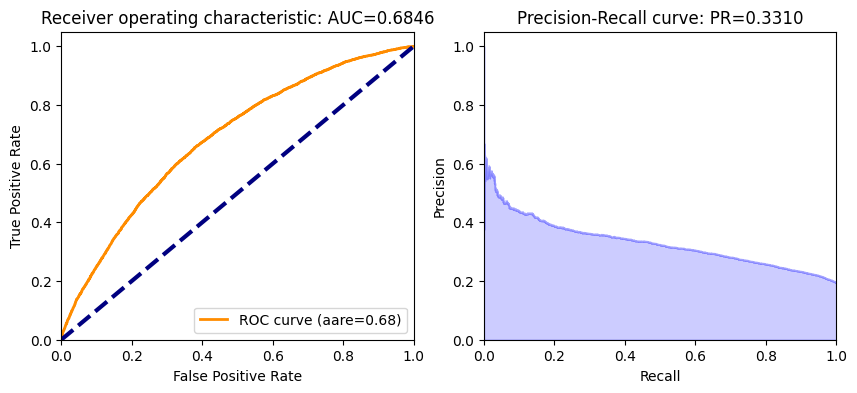

In [154]:
ROC_AUC(aml_best_model, test_h2o, 'loan_default')

Overall, aml_best_model perform best with the highest AUC score and PR score.